In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split

/home/lucas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def Loss(X,Y,W,b,m_lambda):
    loss=0.5 * m_lambda * W.transpose().dot(W)
    for i in range(X.shape[0]):
        Tensor = Y[i][0] * (W.transpose().dot(X[i]) + b)
        if Tensor < 1:
            loss=loss+1-Tensor
        else:
            loss=loss+0
    return loss

In [4]:
def compare(X,Y,W,b,i):
    if Y[i][0]*(W.transpose().dot(X[i])+b)<1:
        return 1
    else:
        return 0

In [5]:
def Grad(X,Y,W,b,m_lambda):
    grad=m_lambda*W
    for i in range(X.shape[0]):
        grad=grad-(compare(X,Y,W,b,i)*Y[i]*X[i]).reshape(X.shape[1],1)
    return grad

In [6]:
def corrate_rate(X,Y,W,b,threshold):
    count=0
    temp=Y*(X.dot(W)+b)
    for j in temp:
        if j>=threshold:
            count+=1
        else:
            continue
    rate=count/temp.shape[0]
    return rate

In [7]:
def Draw(loops,train_loss,validation_loss,train_accuracy,val_accuracy):
    print('Drawing...')
    #the loss
    plt.plot(np.arange(0,loops-1,1), train_loss[0:loops-1], label='Train Loss')
    plt.plot(np.arange(0,loops-1,1), validation_loss[0:loops-1], label='Validation Loss')
    plt.xlabel('loops')
    plt.ylabel('loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    #the accuracy
    plt.plot(np.arange(0,loops-1,1), train_accuracy[0:loops-1], label='Train Accuracy')
    plt.plot(np.arange(0,loops-1,1), val_accuracy[0:loops-1], label='Validation Accuracy')
    plt.xlabel('loops')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    print('Draw Completed')


In [8]:
def BGD(parameters):
    tic1=time.time()
    epsilon = parameters['epsilon']
    max_loop=parameters['max_loops']
    m_lambda=parameters['lambda']
    N=parameters['learning_rate']
    train_X=parameters['train_X']
    train_Y=parameters['train_Y']
    val_X=parameters['val_X']
    val_Y=parameters['val_Y']
    W=parameters['Weights']
    b=parameters['b']
    threshold=parameters['threshold']
    count = 0
    error = np.zeros((col, 1))
    finish = 0
    TL = []
    VL = []
    train_accuracy=[]
    val_accuracy=[]
    while count <= max_loop:
        count += 1
        W = W - N * Grad(train_X, train_Y, W, b, m_lambda)
        if (np.linalg.norm(W - error) < epsilon):
            finish = 1
            break
        else:
            error = W
            Loss_Train = Loss(train_X,train_Y,W,b,m_lambda)
            Loss_Validation = Loss(val_X,val_Y,W,b,m_lambda)
            TL.append(Loss_Train[0] / t_row)
            VL.append(Loss_Validation[0] / v_row)
            train_accuracy.append(corrate_rate(train_X,train_Y,W,b))
            val_accuracy.append(corrate_rate(val_X,val_Y,W,b))
            print('Loop {}'.format(count), 'Loss_Train: ', Loss_Train / t_row, 'Loss_Validation: ',
                  Loss_Validation / v_row)
            print('Accuracy: Train: {}, Validation: {}'.format(train_accuracy[count-1],val_accuracy[count-1]))
            # print(W)
    return count,TL,VL,train_accuracy,val_accuracy

In [9]:
if __name__ == '__main__':
    tic=time.time()
    # Read Data
    Data_Path = '/home/lucas/Codes/GitHub/ML_Assignment1/ML_Assignment1/DataSet/australian_scale.txt'
    Data_Parameter, Data_Value = load_svmlight_file(Data_Path)
    Data_Parameter = Data_Parameter.toarray()
    train_X, val_X, train_Y, val_Y = train_test_split(Data_Parameter, Data_Value, test_size=0.25, random_state=1)
    t_row = train_X.shape[0]  # Row Size
    col = train_X.shape[1]  # Column Size
    v_row = val_X.shape[0]
    train_Y = train_Y.reshape(t_row, 1)
    val_Y = val_Y.reshape(v_row, 1)

    # initial W, C, b and our learning rate N
    W = np.random.random(size=(col, 1))
    Paramaters = {
        'Weights': W,
        'train_X': train_X,
        'train_Y': train_Y,
        'val_X': val_X,
        'val_Y': val_Y,
        'max_loops': 50000,  # in case it won't converge
        'epsilon': 0.00001,  # if Wt+1-Wt<epsilon then stop BGD
        'lambda': 0.001,  # regularize, C=1/lambda
        'learning_rate': 0.00000065,  # learning rate
        'b':0.01,
        'threshold':1
    }
    loops,train_loss,val_loss,trian_accuracy,val_accuracy=BGD(Paramaters)

Loop 1 Loss_Train:  [[ 1.00342345]] Loss_Validation:  [[ 0.86135888]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 2 Loss_Train:  [[ 1.00320006]] Loss_Validation:  [[ 0.86113921]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 3 Loss_Train:  [[ 1.00297667]] Loss_Validation:  [[ 0.86091954]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 4 Loss_Train:  [[ 1.00275328]] Loss_Validation:  [[ 0.86069987]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 5 Loss_Train:  [[ 1.00252989]] Loss_Validation:  [[ 0.8604802]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 6 Loss_Train:  [[ 1.0023065]] Loss_Validation:  [[ 0.86026054]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 7 Loss_Train:  [[ 1.00208311]] Loss_Validation:  [[ 0.86004087]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 8 Loss_Train:  [[ 1.00185972]] Loss_Va

Loop 63 Loss_Train:  [[ 0.98977357]] Loss_Validation:  [[ 0.84783875]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 64 Loss_Train:  [[ 0.98955606]] Loss_Validation:  [[ 0.84762203]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 65 Loss_Train:  [[ 0.98933855]] Loss_Validation:  [[ 0.8474053]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 66 Loss_Train:  [[ 0.98912104]] Loss_Validation:  [[ 0.84718858]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 67 Loss_Train:  [[ 0.98890353]] Loss_Validation:  [[ 0.84697186]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 68 Loss_Train:  [[ 0.98868602]] Loss_Validation:  [[ 0.84675514]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 69 Loss_Train:  [[ 0.98846851]] Loss_Validation:  [[ 0.84653842]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 70 Loss_Train:  [[ 0.98

Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 167 Loss_Train:  [[ 0.96742515]] Loss_Validation:  [[ 0.82588541]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 168 Loss_Train:  [[ 0.96721188]] Loss_Validation:  [[ 0.82567711]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 169 Loss_Train:  [[ 0.96699902]] Loss_Validation:  [[ 0.82546881]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 170 Loss_Train:  [[ 0.96678812]] Loss_Validation:  [[ 0.82526168]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 171 Loss_Train:  [[ 0.96657723]] Loss_Validation:  [[ 0.82505456]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 172 Loss_Train:  [[ 0.96636634]] Loss_Validation:  [[ 0.82484744]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 173 Loss_Train:  [[ 0.96615545]] Loss_Validation:  [[ 0.82464032]]
Accuracy: Train: 0.52804

Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 266 Loss_Train:  [[ 0.94654243]] Loss_Validation:  [[ 0.80562072]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 267 Loss_Train:  [[ 0.94633154]] Loss_Validation:  [[ 0.80541653]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 268 Loss_Train:  [[ 0.94612065]] Loss_Validation:  [[ 0.80521234]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 269 Loss_Train:  [[ 0.94590975]] Loss_Validation:  [[ 0.80500815]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 270 Loss_Train:  [[ 0.94569886]] Loss_Validation:  [[ 0.80480397]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 271 Loss_Train:  [[ 0.94548797]] Loss_Validation:  [[ 0.80459978]]
Accuracy: Train: 0.528046421663443, Validation: 0.5838150289017341
Loop 272 Loss_Train:  [[ 0.94527708]] Loss_Validation:  [[ 0.80439559]]
Accuracy: Train: 0.52804642

Loop 413 Loss_Train:  [[ 0.9162798]] Loss_Validation:  [[ 0.7760877]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 414 Loss_Train:  [[ 0.91608081]] Loss_Validation:  [[ 0.7758973]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 415 Loss_Train:  [[ 0.91588182]] Loss_Validation:  [[ 0.7757069]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 416 Loss_Train:  [[ 0.91568283]] Loss_Validation:  [[ 0.7755165]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 417 Loss_Train:  [[ 0.91548384]] Loss_Validation:  [[ 0.7753261]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 418 Loss_Train:  [[ 0.91528485]] Loss_Validation:  [[ 0.7751357]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 419 Loss_Train:  [[ 0.91508586]] Loss_Validation:  [[ 0.7749453]]
Accuracy: Train: 0.528046421663443, Validation: 0.5895953757225434
Loop 420 Loss_Train:  [[ 0.91488687

Loop 515 Loss_Train:  [[ 0.8960849]] Loss_Validation:  [[ 0.75671977]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 516 Loss_Train:  [[ 0.89588791]] Loss_Validation:  [[ 0.75653041]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 517 Loss_Train:  [[ 0.89569092]] Loss_Validation:  [[ 0.75634105]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 518 Loss_Train:  [[ 0.89549393]] Loss_Validation:  [[ 0.75615168]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 519 Loss_Train:  [[ 0.89529694]] Loss_Validation:  [[ 0.75596232]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5895953757225434
Loop 520 Loss_Train:  [[ 0.89509995]] Loss_Validation:  [[ 0.75577301]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5953757225433526
Loop 521 Loss_Train:  [[ 0.89490296]] Loss_Validation:  [[ 0.75558586]]
Accuracy: Train: 0.5261121856866537, Validation: 0.5953757225433526
Loop 522 Loss_Train: 

Loop 665 Loss_Train:  [[ 0.86677185]] Loss_Validation:  [[ 0.72905119]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5953757225433526
Loop 666 Loss_Train:  [[ 0.86657837]] Loss_Validation:  [[ 0.72887242]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 667 Loss_Train:  [[ 0.86638489]] Loss_Validation:  [[ 0.72869613]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 668 Loss_Train:  [[ 0.86619141]] Loss_Validation:  [[ 0.72851985]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 669 Loss_Train:  [[ 0.86599793]] Loss_Validation:  [[ 0.72834356]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 670 Loss_Train:  [[ 0.86580445]] Loss_Validation:  [[ 0.72816728]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 671 Loss_Train:  [[ 0.86561096]] Loss_Validation:  [[ 0.72799099]]
Accuracy: Train: 0.5299806576402321, Validation: 0.6011560693641619
Loop 672 Loss_Train:

Loop 765 Loss_Train:  [[ 0.84742374]] Loss_Validation:  [[ 0.71155098]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 766 Loss_Train:  [[ 0.84723026]] Loss_Validation:  [[ 0.71138011]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 767 Loss_Train:  [[ 0.84703678]] Loss_Validation:  [[ 0.71120923]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 768 Loss_Train:  [[ 0.8468433]] Loss_Validation:  [[ 0.71103835]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 769 Loss_Train:  [[ 0.84664982]] Loss_Validation:  [[ 0.71086747]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 770 Loss_Train:  [[ 0.84645633]] Loss_Validation:  [[ 0.7106966]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 771 Loss_Train:  [[ 0.84626285]] Loss_Validation:  [[ 0.71052572]]
Accuracy: Train: 0.5299806576402321, Validation: 0.5895953757225434
Loop 772 Loss_Train:  

Loop 915 Loss_Train:  [[ 0.81897123]] Loss_Validation:  [[ 0.68615797]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 916 Loss_Train:  [[ 0.81878722]] Loss_Validation:  [[ 0.68599113]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 917 Loss_Train:  [[ 0.81860322]] Loss_Validation:  [[ 0.68582429]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 918 Loss_Train:  [[ 0.81841921]] Loss_Validation:  [[ 0.68565745]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 919 Loss_Train:  [[ 0.81823521]] Loss_Validation:  [[ 0.68549061]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 920 Loss_Train:  [[ 0.81805121]] Loss_Validation:  [[ 0.68532377]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 921 Loss_Train:  [[ 0.81786725]] Loss_Validation:  [[ 0.68515693]]
Accuracy: Train: 0.5338491295938105, Validation: 0.5895953757225434
Loop 922 Loss_Train:

Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1017 Loss_Train:  [[ 0.80048657]] Loss_Validation:  [[ 0.66946231]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1018 Loss_Train:  [[ 0.80031003]] Loss_Validation:  [[ 0.66930167]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1019 Loss_Train:  [[ 0.8001335]] Loss_Validation:  [[ 0.66914104]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1020 Loss_Train:  [[ 0.79995798]] Loss_Validation:  [[ 0.66898041]]
Accuracy: Train: 0.5377176015473888, Validation: 0.5953757225433526
Loop 1021 Loss_Train:  [[ 0.79978356]] Loss_Validation:  [[ 0.66882074]]
Accuracy: Train: 0.5377176015473888, Validation: 0.5953757225433526
Loop 1022 Loss_Train:  [[ 0.79960914]] Loss_Validation:  [[ 0.66866106]]
Accuracy: Train: 0.5377176015473888, Validation: 0.5953757225433526
Loop 1023 Loss_Train:  [[ 0.79943472]] Loss_Validation:  [[ 0.66850139]]
Accuracy: Trai

Loop 1164 Loss_Train:  [[ 0.77516495]] Loss_Validation:  [[ 0.64656843]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1165 Loss_Train:  [[ 0.77499541]] Loss_Validation:  [[ 0.64641803]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1166 Loss_Train:  [[ 0.77482587]] Loss_Validation:  [[ 0.64626763]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1167 Loss_Train:  [[ 0.77465633]] Loss_Validation:  [[ 0.64611723]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1168 Loss_Train:  [[ 0.77448679]] Loss_Validation:  [[ 0.64596683]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1169 Loss_Train:  [[ 0.77431725]] Loss_Validation:  [[ 0.64581644]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1170 Loss_Train:  [[ 0.77414771]] Loss_Validation:  [[ 0.64566604]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1171 Los

Loop 1266 Loss_Train:  [[ 0.75788344]] Loss_Validation:  [[ 0.63123216]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1267 Loss_Train:  [[ 0.75771791]] Loss_Validation:  [[ 0.63108354]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1268 Loss_Train:  [[ 0.75755239]] Loss_Validation:  [[ 0.63093493]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1269 Loss_Train:  [[ 0.75738687]] Loss_Validation:  [[ 0.63078631]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1270 Loss_Train:  [[ 0.75722135]] Loss_Validation:  [[ 0.6306377]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1271 Loss_Train:  [[ 0.75705583]] Loss_Validation:  [[ 0.63048908]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1272 Loss_Train:  [[ 0.7568903]] Loss_Validation:  [[ 0.63034047]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5895953757225434
Loop 1273 Loss_

Loop 1412 Loss_Train:  [[ 0.7341888]] Loss_Validation:  [[ 0.60998283]]
Accuracy: Train: 0.5377176015473888, Validation: 0.5953757225433526
Loop 1413 Loss_Train:  [[ 0.73403387]] Loss_Validation:  [[ 0.60984179]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1414 Loss_Train:  [[ 0.73388044]] Loss_Validation:  [[ 0.60970156]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1415 Loss_Train:  [[ 0.73372701]] Loss_Validation:  [[ 0.60956132]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1416 Loss_Train:  [[ 0.73357359]] Loss_Validation:  [[ 0.60942109]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1417 Loss_Train:  [[ 0.73342016]] Loss_Validation:  [[ 0.60928085]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1418 Loss_Train:  [[ 0.73326673]] Loss_Validation:  [[ 0.60914062]]
Accuracy: Train: 0.5357833655705996, Validation: 0.5953757225433526
Loop 1419 Loss

Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1515 Loss_Train:  [[ 0.71850658]] Loss_Validation:  [[ 0.59613382]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1516 Loss_Train:  [[ 0.71835714]] Loss_Validation:  [[ 0.59600402]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1517 Loss_Train:  [[ 0.71820769]] Loss_Validation:  [[ 0.59587422]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1518 Loss_Train:  [[ 0.71805824]] Loss_Validation:  [[ 0.59574442]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1519 Loss_Train:  [[ 0.71790879]] Loss_Validation:  [[ 0.59561461]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1520 Loss_Train:  [[ 0.71775934]] Loss_Validation:  [[ 0.59548481]]
Accuracy: Train: 0.5357833655705996, Validation: 0.6127167630057804
Loop 1521 Loss_Train:  [[ 0.7176099]] Loss_Validation:  [[ 0.59535501]]
Accuracy: Trai

Loop 1663 Loss_Train:  [[ 0.69722625]] Loss_Validation:  [[ 0.57759005]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1664 Loss_Train:  [[ 0.69708871]] Loss_Validation:  [[ 0.57746989]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1665 Loss_Train:  [[ 0.69695116]] Loss_Validation:  [[ 0.57734974]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1666 Loss_Train:  [[ 0.69681361]] Loss_Validation:  [[ 0.57722959]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1667 Loss_Train:  [[ 0.69667606]] Loss_Validation:  [[ 0.57710943]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1668 Loss_Train:  [[ 0.69653851]] Loss_Validation:  [[ 0.57698928]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1669 Loss_Train:  [[ 0.69640096]] Loss_Validation:  [[ 0.57686913]]
Accuracy: Train: 0.5493230174081238, Validation: 0.6127167630057804
Loop 1670 Los

Loop 1765 Loss_Train:  [[ 0.68329215]] Loss_Validation:  [[ 0.56572418]]
Accuracy: Train: 0.5531914893617021, Validation: 0.6069364161849711
Loop 1766 Loss_Train:  [[ 0.68315789]] Loss_Validation:  [[ 0.56561335]]
Accuracy: Train: 0.5531914893617021, Validation: 0.6069364161849711
Loop 1767 Loss_Train:  [[ 0.68302362]] Loss_Validation:  [[ 0.56550253]]
Accuracy: Train: 0.5531914893617021, Validation: 0.6069364161849711
Loop 1768 Loss_Train:  [[ 0.68288936]] Loss_Validation:  [[ 0.5653917]]
Accuracy: Train: 0.5531914893617021, Validation: 0.6069364161849711
Loop 1769 Loss_Train:  [[ 0.68275559]] Loss_Validation:  [[ 0.56528087]]
Accuracy: Train: 0.5551257253384912, Validation: 0.6069364161849711
Loop 1770 Loss_Train:  [[ 0.68262292]] Loss_Validation:  [[ 0.56517065]]
Accuracy: Train: 0.5551257253384912, Validation: 0.6069364161849711
Loop 1771 Loss_Train:  [[ 0.68249025]] Loss_Validation:  [[ 0.56506044]]
Accuracy: Train: 0.5551257253384912, Validation: 0.6069364161849711
Loop 1772 Loss

Loop 1915 Loss_Train:  [[ 0.66436485]] Loss_Validation:  [[ 0.5496397]]
Accuracy: Train: 0.562862669245648, Validation: 0.6127167630057804
Loop 1916 Loss_Train:  [[ 0.66424512]] Loss_Validation:  [[ 0.54953619]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1917 Loss_Train:  [[ 0.66412636]] Loss_Validation:  [[ 0.54943355]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1918 Loss_Train:  [[ 0.66400759]] Loss_Validation:  [[ 0.54933091]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1919 Loss_Train:  [[ 0.66388883]] Loss_Validation:  [[ 0.54922827]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1920 Loss_Train:  [[ 0.66377006]] Loss_Validation:  [[ 0.54912563]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1921 Loss_Train:  [[ 0.66365129]] Loss_Validation:  [[ 0.54902299]]
Accuracy: Train: 0.5647969052224371, Validation: 0.6127167630057804
Loop 1922 Loss_

Loop 2017 Loss_Train:  [[ 0.65247077]] Loss_Validation:  [[ 0.53940762]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2018 Loss_Train:  [[ 0.65235531]] Loss_Validation:  [[ 0.53930827]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2019 Loss_Train:  [[ 0.65223985]] Loss_Validation:  [[ 0.53920893]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2020 Loss_Train:  [[ 0.65212439]] Loss_Validation:  [[ 0.53910958]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2021 Loss_Train:  [[ 0.65200894]] Loss_Validation:  [[ 0.53901024]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2022 Loss_Train:  [[ 0.65189348]] Loss_Validation:  [[ 0.5389109]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2023 Loss_Train:  [[ 0.65177802]] Loss_Validation:  [[ 0.53881155]]
Accuracy: Train: 0.5667311411992263, Validation: 0.6184971098265896
Loop 2024 Loss

Loop 2164 Loss_Train:  [[ 0.63595984]] Loss_Validation:  [[ 0.52500268]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2165 Loss_Train:  [[ 0.63585093]] Loss_Validation:  [[ 0.52490616]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2166 Loss_Train:  [[ 0.63574203]] Loss_Validation:  [[ 0.52480964]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2167 Loss_Train:  [[ 0.63563313]] Loss_Validation:  [[ 0.52471312]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2168 Loss_Train:  [[ 0.63552422]] Loss_Validation:  [[ 0.5246166]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2169 Loss_Train:  [[ 0.63541532]] Loss_Validation:  [[ 0.52452008]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2170 Loss_Train:  [[ 0.63530642]] Loss_Validation:  [[ 0.52442356]]
Accuracy: Train: 0.574468085106383, Validation: 0.6184971098265896
Loop 2171 Loss_Train:

Loop 2265 Loss_Train:  [[ 0.62541462]] Loss_Validation:  [[ 0.51566766]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2266 Loss_Train:  [[ 0.62531464]] Loss_Validation:  [[ 0.51557974]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2267 Loss_Train:  [[ 0.62521465]] Loss_Validation:  [[ 0.51549181]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2268 Loss_Train:  [[ 0.62511466]] Loss_Validation:  [[ 0.51540389]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2269 Loss_Train:  [[ 0.62501468]] Loss_Validation:  [[ 0.51531597]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2270 Loss_Train:  [[ 0.62491469]] Loss_Validation:  [[ 0.51522805]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2271 Loss_Train:  [[ 0.6248147]] Loss_Validation:  [[ 0.51514012]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2272 Loss_Train:

Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2413 Loss_Train:  [[ 0.61069938]] Loss_Validation:  [[ 0.50269404]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2414 Loss_Train:  [[ 0.61060188]] Loss_Validation:  [[ 0.50260726]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2415 Loss_Train:  [[ 0.61050438]] Loss_Validation:  [[ 0.50252049]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2416 Loss_Train:  [[ 0.61040688]] Loss_Validation:  [[ 0.50243371]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2417 Loss_Train:  [[ 0.61030937]] Loss_Validation:  [[ 0.50234693]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2418 Loss_Train:  [[ 0.61021187]] Loss_Validation:  [[ 0.50226016]]
Accuracy: Train: 0.5783365570599613, Validation: 0.630057803468208
Loop 2419 Loss_Train:  [[ 0.61011437]] Loss_Validation:  [[ 0.50217338]]
Accuracy: Train: 0.5

Loop 2514 Loss_Train:  [[ 0.6011506]] Loss_Validation:  [[ 0.49406182]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2515 Loss_Train:  [[ 0.60105893]] Loss_Validation:  [[ 0.49397759]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2516 Loss_Train:  [[ 0.60096726]] Loss_Validation:  [[ 0.49389337]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2517 Loss_Train:  [[ 0.60087559]] Loss_Validation:  [[ 0.49380914]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2518 Loss_Train:  [[ 0.60078391]] Loss_Validation:  [[ 0.49372491]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2519 Loss_Train:  [[ 0.60069224]] Loss_Validation:  [[ 0.49364068]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2520 Loss_Train:  [[ 0.60060057]] Loss_Validation:  [[ 0.49355645]]
Accuracy: Train: 0.5822050290135397, Validation: 0.630057803468208
Loop 2521 Loss_Train:

Loop 2662 Loss_Train:  [[ 0.58781685]] Loss_Validation:  [[ 0.48170821]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2663 Loss_Train:  [[ 0.58772833]] Loss_Validation:  [[ 0.48162547]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2664 Loss_Train:  [[ 0.58763982]] Loss_Validation:  [[ 0.48154272]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2665 Loss_Train:  [[ 0.5875513]] Loss_Validation:  [[ 0.48145998]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2666 Loss_Train:  [[ 0.58746279]] Loss_Validation:  [[ 0.48137724]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2667 Loss_Train:  [[ 0.58737427]] Loss_Validation:  [[ 0.4812945]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2668 Loss_Train:  [[ 0.58728576]] Loss_Validation:  [[ 0.48121176]]
Accuracy: Train: 0.586073500967118, Validation: 0.630057803468208
Loop 2669 Loss_Train:  [[ 0.5

Loop 2762 Loss_Train:  [[ 0.57931863]] Loss_Validation:  [[ 0.47376961]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2763 Loss_Train:  [[ 0.57923658]] Loss_Validation:  [[ 0.47369308]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2764 Loss_Train:  [[ 0.57915452]] Loss_Validation:  [[ 0.47361655]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2765 Loss_Train:  [[ 0.57907247]] Loss_Validation:  [[ 0.47354002]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2766 Loss_Train:  [[ 0.57899041]] Loss_Validation:  [[ 0.47346349]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2767 Loss_Train:  [[ 0.57890836]] Loss_Validation:  [[ 0.47338696]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2768 Loss_Train:  [[ 0.57882631]] Loss_Validation:  [[ 0.47331043]]
Accuracy: Train: 0.5918762088974855, Validation: 0.630057803468208
Loop 2769 Loss_Train

Loop 2914 Loss_Train:  [[ 0.56768577]] Loss_Validation:  [[ 0.46283059]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2915 Loss_Train:  [[ 0.56761234]] Loss_Validation:  [[ 0.462762]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2916 Loss_Train:  [[ 0.5675389]] Loss_Validation:  [[ 0.46269341]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2917 Loss_Train:  [[ 0.56746547]] Loss_Validation:  [[ 0.46262482]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2918 Loss_Train:  [[ 0.56739204]] Loss_Validation:  [[ 0.46255623]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2919 Loss_Train:  [[ 0.5673186]] Loss_Validation:  [[ 0.46248764]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2920 Loss_Train:  [[ 0.56724517]] Loss_Validation:  [[ 0.46241905]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 2921 Loss_Train:  [

Loop 3014 Loss_Train:  [[ 0.5603424]] Loss_Validation:  [[ 0.45597157]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3015 Loss_Train:  [[ 0.56026897]] Loss_Validation:  [[ 0.45590298]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3016 Loss_Train:  [[ 0.56019554]] Loss_Validation:  [[ 0.45583439]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3017 Loss_Train:  [[ 0.5601221]] Loss_Validation:  [[ 0.45576579]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3018 Loss_Train:  [[ 0.56004867]] Loss_Validation:  [[ 0.4556972]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3019 Loss_Train:  [[ 0.55997524]] Loss_Validation:  [[ 0.45562861]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3020 Loss_Train:  [[ 0.5599018]] Loss_Validation:  [[ 0.45556002]]
Accuracy: Train: 0.6015473887814313, Validation: 0.630057803468208
Loop 3021 Loss_Train:  [

Loop 3163 Loss_Train:  [[ 0.54967384]] Loss_Validation:  [[ 0.44601864]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3164 Loss_Train:  [[ 0.54960284]] Loss_Validation:  [[ 0.44595481]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3165 Loss_Train:  [[ 0.54953184]] Loss_Validation:  [[ 0.44589098]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3166 Loss_Train:  [[ 0.54946085]] Loss_Validation:  [[ 0.44582715]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3167 Loss_Train:  [[ 0.54938985]] Loss_Validation:  [[ 0.44576333]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3168 Loss_Train:  [[ 0.54931885]] Loss_Validation:  [[ 0.4456995]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3169 Loss_Train:  [[ 0.54924785]] Loss_Validation:  [[ 0.44563567]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3170 Loss

Loop 3266 Loss_Train:  [[ 0.54236098]] Loss_Validation:  [[ 0.43944423]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3267 Loss_Train:  [[ 0.54228998]] Loss_Validation:  [[ 0.4393804]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3268 Loss_Train:  [[ 0.54221898]] Loss_Validation:  [[ 0.43931657]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3269 Loss_Train:  [[ 0.54214798]] Loss_Validation:  [[ 0.43925274]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3270 Loss_Train:  [[ 0.54207698]] Loss_Validation:  [[ 0.43918891]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3271 Loss_Train:  [[ 0.54200598]] Loss_Validation:  [[ 0.43912508]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3272 Loss_Train:  [[ 0.54193498]] Loss_Validation:  [[ 0.43906125]]
Accuracy: Train: 0.6015473887814313, Validation: 0.6184971098265896
Loop 3273 Loss

Loop 3351 Loss_Train:  [[ 0.53646942]] Loss_Validation:  [[ 0.4340936]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3352 Loss_Train:  [[ 0.5364016]] Loss_Validation:  [[ 0.4340322]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3353 Loss_Train:  [[ 0.53633379]] Loss_Validation:  [[ 0.4339708]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3354 Loss_Train:  [[ 0.53626598]] Loss_Validation:  [[ 0.43390941]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3355 Loss_Train:  [[ 0.53619817]] Loss_Validation:  [[ 0.43384801]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3356 Loss_Train:  [[ 0.53613036]] Loss_Validation:  [[ 0.43378661]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3357 Loss_Train:  [[ 0.53606254]] Loss_Validation:  [[ 0.43372522]]
Accuracy: Train: 0.6073500967117988, Validation: 0.6127167630057804
Loop 3358 Loss_Tr

Loop 3496 Loss_Train:  [[ 0.52680011]] Loss_Validation:  [[ 0.42525557]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3497 Loss_Train:  [[ 0.5267348]] Loss_Validation:  [[ 0.42519527]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3498 Loss_Train:  [[ 0.52666948]] Loss_Validation:  [[ 0.42513496]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3499 Loss_Train:  [[ 0.52660417]] Loss_Validation:  [[ 0.42507465]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3500 Loss_Train:  [[ 0.52653885]] Loss_Validation:  [[ 0.42501435]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3501 Loss_Train:  [[ 0.52647353]] Loss_Validation:  [[ 0.42495404]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6127167630057804
Loop 3502 Loss_Train:  [[ 0.5264086]] Loss_Validation:  [[ 0.42489373]]
Accuracy: Train: 0.6131528046421664, Validation: 0.6127167630057804
Loop 3503 Loss_

Loop 3598 Loss_Train:  [[ 0.52028663]] Loss_Validation:  [[ 0.41924461]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3599 Loss_Train:  [[ 0.52022569]] Loss_Validation:  [[ 0.4191881]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3600 Loss_Train:  [[ 0.52016476]] Loss_Validation:  [[ 0.41913159]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3601 Loss_Train:  [[ 0.52010382]] Loss_Validation:  [[ 0.41907509]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3602 Loss_Train:  [[ 0.52004288]] Loss_Validation:  [[ 0.41901858]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3603 Loss_Train:  [[ 0.51998194]] Loss_Validation:  [[ 0.41896208]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3604 Loss_Train:  [[ 0.51992101]] Loss_Validation:  [[ 0.41890557]]
Accuracy: Train: 0.6112185686653772, Validation: 0.6184971098265896
Loop 3605 Loss

Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3746 Loss_Train:  [[ 0.51158149]] Loss_Validation:  [[ 0.41102769]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3747 Loss_Train:  [[ 0.51152399]] Loss_Validation:  [[ 0.4109728]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3748 Loss_Train:  [[ 0.51146648]] Loss_Validation:  [[ 0.41091791]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3749 Loss_Train:  [[ 0.51140897]] Loss_Validation:  [[ 0.41086302]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3750 Loss_Train:  [[ 0.51135146]] Loss_Validation:  [[ 0.41080813]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3751 Loss_Train:  [[ 0.51129395]] Loss_Validation:  [[ 0.41075324]]
Accuracy: Train: 0.6170212765957447, Validation: 0.6184971098265896
Loop 3752 Loss_Train:  [[ 0.51123644]] Loss_Validation:  [[ 0.41069835]]
Accuracy: Trai

Loop 3846 Loss_Train:  [[ 0.50601323]] Loss_Validation:  [[ 0.40563203]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3847 Loss_Train:  [[ 0.50595948]] Loss_Validation:  [[ 0.40557908]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3848 Loss_Train:  [[ 0.50590573]] Loss_Validation:  [[ 0.40552614]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3849 Loss_Train:  [[ 0.50585198]] Loss_Validation:  [[ 0.40547319]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3850 Loss_Train:  [[ 0.50579822]] Loss_Validation:  [[ 0.40542024]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3851 Loss_Train:  [[ 0.50574447]] Loss_Validation:  [[ 0.4053673]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3852 Loss_Train:  [[ 0.50569072]] Loss_Validation:  [[ 0.40531435]]
Accuracy: Train: 0.6189555125725339, Validation: 0.6184971098265896
Loop 3853 Loss

Loop 3996 Loss_Train:  [[ 0.49820616]] Loss_Validation:  [[ 0.3978602]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 3997 Loss_Train:  [[ 0.49815607]] Loss_Validation:  [[ 0.39781074]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 3998 Loss_Train:  [[ 0.49810598]] Loss_Validation:  [[ 0.39776128]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 3999 Loss_Train:  [[ 0.49805589]] Loss_Validation:  [[ 0.39771182]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 4000 Loss_Train:  [[ 0.49800581]] Loss_Validation:  [[ 0.39766236]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 4001 Loss_Train:  [[ 0.49795572]] Loss_Validation:  [[ 0.3976129]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 4002 Loss_Train:  [[ 0.49790563]] Loss_Validation:  [[ 0.39756344]]
Accuracy: Train: 0.6266924564796905, Validation: 0.6242774566473989
Loop 4003 Loss_

Loop 4096 Loss_Train:  [[ 0.4932071]] Loss_Validation:  [[ 0.39291931]]
Accuracy: Train: 0.6286266924564797, Validation: 0.6242774566473989
Loop 4097 Loss_Train:  [[ 0.49315807]] Loss_Validation:  [[ 0.39287042]]
Accuracy: Train: 0.6286266924564797, Validation: 0.6242774566473989
Loop 4098 Loss_Train:  [[ 0.49310904]] Loss_Validation:  [[ 0.39282153]]
Accuracy: Train: 0.6286266924564797, Validation: 0.6242774566473989
Loop 4099 Loss_Train:  [[ 0.49306001]] Loss_Validation:  [[ 0.39277341]]
Accuracy: Train: 0.6286266924564797, Validation: 0.630057803468208
Loop 4100 Loss_Train:  [[ 0.49301098]] Loss_Validation:  [[ 0.39272636]]
Accuracy: Train: 0.6286266924564797, Validation: 0.630057803468208
Loop 4101 Loss_Train:  [[ 0.49296195]] Loss_Validation:  [[ 0.39267932]]
Accuracy: Train: 0.6286266924564797, Validation: 0.630057803468208
Loop 4102 Loss_Train:  [[ 0.49291292]] Loss_Validation:  [[ 0.39263262]]
Accuracy: Train: 0.6286266924564797, Validation: 0.6358381502890174
Loop 4103 Loss_Tr

Loop 4244 Loss_Train:  [[ 0.48609637]] Loss_Validation:  [[ 0.38633547]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4245 Loss_Train:  [[ 0.4860486]] Loss_Validation:  [[ 0.3862918]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4246 Loss_Train:  [[ 0.48600083]] Loss_Validation:  [[ 0.38624813]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4247 Loss_Train:  [[ 0.48595307]] Loss_Validation:  [[ 0.38620446]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4248 Loss_Train:  [[ 0.4859053]] Loss_Validation:  [[ 0.38616079]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4249 Loss_Train:  [[ 0.48585753]] Loss_Validation:  [[ 0.38611712]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4250 Loss_Train:  [[ 0.48580977]] Loss_Validation:  [[ 0.38607345]]
Accuracy: Train: 0.6247582205029013, Validation: 0.6416184971098265
Loop 4251 Loss_T

Loop 4342 Loss_Train:  [[ 0.48151431]] Loss_Validation:  [[ 0.38227206]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4343 Loss_Train:  [[ 0.48146826]] Loss_Validation:  [[ 0.38223208]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4344 Loss_Train:  [[ 0.4814222]] Loss_Validation:  [[ 0.38219211]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4345 Loss_Train:  [[ 0.48137615]] Loss_Validation:  [[ 0.38215213]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4346 Loss_Train:  [[ 0.4813301]] Loss_Validation:  [[ 0.38211215]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4347 Loss_Train:  [[ 0.48128404]] Loss_Validation:  [[ 0.38207217]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4348 Loss_Train:  [[ 0.48123799]] Loss_Validation:  [[ 0.38203219]]
Accuracy: Train: 0.6286266924564797, Validation: 0.653179190751445
Loop 4349 Loss_Train: 

Loop 4506 Loss_Train:  [[ 0.47415366]] Loss_Validation:  [[ 0.37587089]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4507 Loss_Train:  [[ 0.47411038]] Loss_Validation:  [[ 0.37583428]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4508 Loss_Train:  [[ 0.47406709]] Loss_Validation:  [[ 0.37579766]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4509 Loss_Train:  [[ 0.4740238]] Loss_Validation:  [[ 0.37576105]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4510 Loss_Train:  [[ 0.47398052]] Loss_Validation:  [[ 0.37572443]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4511 Loss_Train:  [[ 0.47393723]] Loss_Validation:  [[ 0.37568781]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4512 Loss_Train:  [[ 0.47389394]] Loss_Validation:  [[ 0.3756512]]
Accuracy: Train: 0.6305609284332688, Validation: 0.653179190751445
Loop 4513 Loss_Train: 

Loop 4594 Loss_Train:  [[ 0.470399]] Loss_Validation:  [[ 0.37279674]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4595 Loss_Train:  [[ 0.47035682]] Loss_Validation:  [[ 0.37276222]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4596 Loss_Train:  [[ 0.47031464]] Loss_Validation:  [[ 0.3727277]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4597 Loss_Train:  [[ 0.47027245]] Loss_Validation:  [[ 0.37269317]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4598 Loss_Train:  [[ 0.47023027]] Loss_Validation:  [[ 0.37265865]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4599 Loss_Train:  [[ 0.47018809]] Loss_Validation:  [[ 0.37262412]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4600 Loss_Train:  [[ 0.47014591]] Loss_Validation:  [[ 0.3725896]]
Accuracy: Train: 0.632495164410058, Validation: 0.6589595375722543
Loop 4601 Loss_Train:  [

Loop 4744 Loss_Train:  [[ 0.46448836]] Loss_Validation:  [[ 0.36777527]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4745 Loss_Train:  [[ 0.46445194]] Loss_Validation:  [[ 0.367743]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4746 Loss_Train:  [[ 0.46441552]] Loss_Validation:  [[ 0.36771073]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4747 Loss_Train:  [[ 0.4643791]] Loss_Validation:  [[ 0.36767845]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4748 Loss_Train:  [[ 0.46434267]] Loss_Validation:  [[ 0.36764618]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4749 Loss_Train:  [[ 0.46430625]] Loss_Validation:  [[ 0.3676139]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4750 Loss_Train:  [[ 0.46426983]] Loss_Validation:  [[ 0.36758163]]
Accuracy: Train: 0.6460348162475822, Validation: 0.6589595375722543
Loop 4751 Loss_Tr

Loop 4844 Loss_Train:  [[ 0.46106068]] Loss_Validation:  [[ 0.36468948]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4845 Loss_Train:  [[ 0.46102784]] Loss_Validation:  [[ 0.36466037]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4846 Loss_Train:  [[ 0.46099501]] Loss_Validation:  [[ 0.36463126]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4847 Loss_Train:  [[ 0.46096217]] Loss_Validation:  [[ 0.36460214]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4848 Loss_Train:  [[ 0.46092934]] Loss_Validation:  [[ 0.36457303]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4849 Loss_Train:  [[ 0.4608965]] Loss_Validation:  [[ 0.36454391]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4850 Loss_Train:  [[ 0.46086367]] Loss_Validation:  [[ 0.3645148]]
Accuracy: Train: 0.6499032882011605, Validation: 0.6647398843930635
Loop 4851 Loss_

Loop 4993 Loss_Train:  [[ 0.45641952]] Loss_Validation:  [[ 0.36054827]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4994 Loss_Train:  [[ 0.45639]] Loss_Validation:  [[ 0.36052186]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4995 Loss_Train:  [[ 0.45636048]] Loss_Validation:  [[ 0.36049544]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4996 Loss_Train:  [[ 0.45633095]] Loss_Validation:  [[ 0.36046903]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4997 Loss_Train:  [[ 0.45630143]] Loss_Validation:  [[ 0.36044262]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4998 Loss_Train:  [[ 0.45627191]] Loss_Validation:  [[ 0.3604162]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 4999 Loss_Train:  [[ 0.45624239]] Loss_Validation:  [[ 0.36038979]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5000 Loss_Tr

Loop 5093 Loss_Train:  [[ 0.45346737]] Loss_Validation:  [[ 0.35790687]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5094 Loss_Train:  [[ 0.45343785]] Loss_Validation:  [[ 0.35788046]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5095 Loss_Train:  [[ 0.45340833]] Loss_Validation:  [[ 0.35785405]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5096 Loss_Train:  [[ 0.45337881]] Loss_Validation:  [[ 0.35782763]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5097 Loss_Train:  [[ 0.45334929]] Loss_Validation:  [[ 0.35780122]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5098 Loss_Train:  [[ 0.45331977]] Loss_Validation:  [[ 0.3577748]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5099 Loss_Train:  [[ 0.45329024]] Loss_Validation:  [[ 0.35774839]]
Accuracy: Train: 0.6576402321083172, Validation: 0.6705202312138728
Loop 5100 Loss

Loop 5243 Loss_Train:  [[ 0.44930041]] Loss_Validation:  [[ 0.35437206]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5244 Loss_Train:  [[ 0.44927295]] Loss_Validation:  [[ 0.35434974]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5245 Loss_Train:  [[ 0.4492455]] Loss_Validation:  [[ 0.35432741]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5246 Loss_Train:  [[ 0.44921804]] Loss_Validation:  [[ 0.35430509]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5247 Loss_Train:  [[ 0.44919058]] Loss_Validation:  [[ 0.35428277]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5248 Loss_Train:  [[ 0.44916313]] Loss_Validation:  [[ 0.35426045]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5249 Loss_Train:  [[ 0.44913567]] Loss_Validation:  [[ 0.35423813]]
Accuracy: Train: 0.6595744680851063, Validation: 0.6820809248554913
Loop 5250 Loss

Loop 5337 Loss_Train:  [[ 0.44676751]] Loss_Validation:  [[ 0.35229208]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5338 Loss_Train:  [[ 0.44674087]] Loss_Validation:  [[ 0.35227006]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5339 Loss_Train:  [[ 0.44671422]] Loss_Validation:  [[ 0.35224805]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5340 Loss_Train:  [[ 0.44668758]] Loss_Validation:  [[ 0.35222604]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5341 Loss_Train:  [[ 0.44666093]] Loss_Validation:  [[ 0.35220403]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5342 Loss_Train:  [[ 0.44663429]] Loss_Validation:  [[ 0.35218201]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5343 Loss_Train:  [[ 0.44660764]] Loss_Validation:  [[ 0.35216]]
Accuracy: Train: 0.6615087040618955, Validation: 0.6820809248554913
Loop 5344 Loss_T

Loop 5492 Loss_Train:  [[ 0.44282258]] Loss_Validation:  [[ 0.34895373]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5493 Loss_Train:  [[ 0.44279915]] Loss_Validation:  [[ 0.34893303]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5494 Loss_Train:  [[ 0.44277573]] Loss_Validation:  [[ 0.34891232]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5495 Loss_Train:  [[ 0.4427523]] Loss_Validation:  [[ 0.34889162]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5496 Loss_Train:  [[ 0.44272888]] Loss_Validation:  [[ 0.34887091]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5497 Loss_Train:  [[ 0.44270546]] Loss_Validation:  [[ 0.34885021]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5498 Loss_Train:  [[ 0.44268203]] Loss_Validation:  [[ 0.3488295]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5499 Loss_

Loop 5589 Loss_Train:  [[ 0.44055041]] Loss_Validation:  [[ 0.34694535]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5590 Loss_Train:  [[ 0.44052698]] Loss_Validation:  [[ 0.34692464]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5591 Loss_Train:  [[ 0.44050356]] Loss_Validation:  [[ 0.34690394]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5592 Loss_Train:  [[ 0.44048013]] Loss_Validation:  [[ 0.34688323]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5593 Loss_Train:  [[ 0.44045671]] Loss_Validation:  [[ 0.34686253]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5594 Loss_Train:  [[ 0.44043328]] Loss_Validation:  [[ 0.34684182]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5595 Loss_Train:  [[ 0.44040986]] Loss_Validation:  [[ 0.34682112]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6820809248554913
Loop 5596 Los

Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5745 Loss_Train:  [[ 0.43696917]] Loss_Validation:  [[ 0.34392009]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5746 Loss_Train:  [[ 0.43694705]] Loss_Validation:  [[ 0.34390259]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5747 Loss_Train:  [[ 0.43692493]] Loss_Validation:  [[ 0.34388509]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5748 Loss_Train:  [[ 0.43690281]] Loss_Validation:  [[ 0.34386758]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5749 Loss_Train:  [[ 0.43688069]] Loss_Validation:  [[ 0.34385008]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5750 Loss_Train:  [[ 0.43685857]] Loss_Validation:  [[ 0.34383258]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5751 Loss_Train:  [[ 0.43683645]] Loss_Validation:  [[ 0.34381508]]
Accuracy: Tra

Loop 5846 Loss_Train:  [[ 0.43476588]] Loss_Validation:  [[ 0.34216207]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5847 Loss_Train:  [[ 0.43474452]] Loss_Validation:  [[ 0.34214478]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5848 Loss_Train:  [[ 0.43472317]] Loss_Validation:  [[ 0.3421275]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5849 Loss_Train:  [[ 0.43470182]] Loss_Validation:  [[ 0.34211022]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5850 Loss_Train:  [[ 0.43468047]] Loss_Validation:  [[ 0.34209294]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5851 Loss_Train:  [[ 0.43465912]] Loss_Validation:  [[ 0.34207565]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5852 Loss_Train:  [[ 0.43463777]] Loss_Validation:  [[ 0.34205837]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6763005780346821
Loop 5853 Loss

Loop 5994 Loss_Train:  [[ 0.43165603]] Loss_Validation:  [[ 0.33971936]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6763005780346821
Loop 5995 Loss_Train:  [[ 0.43163587]] Loss_Validation:  [[ 0.33970435]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6763005780346821
Loop 5996 Loss_Train:  [[ 0.43161584]] Loss_Validation:  [[ 0.33968935]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5997 Loss_Train:  [[ 0.43159621]] Loss_Validation:  [[ 0.33967447]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5998 Loss_Train:  [[ 0.43157658]] Loss_Validation:  [[ 0.3396596]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 5999 Loss_Train:  [[ 0.43155695]] Loss_Validation:  [[ 0.33964473]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 6000 Loss_Train:  [[ 0.43153731]] Loss_Validation:  [[ 0.33962986]]
Accuracy: Train: 0.6692456479690522, Validation: 0.6763005780346821
Loop 6001 Loss

Loop 6094 Loss_Train:  [[ 0.42969856]] Loss_Validation:  [[ 0.33826779]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6095 Loss_Train:  [[ 0.42967967]] Loss_Validation:  [[ 0.33825424]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6096 Loss_Train:  [[ 0.42966078]] Loss_Validation:  [[ 0.33824068]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6097 Loss_Train:  [[ 0.4296419]] Loss_Validation:  [[ 0.33822713]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6098 Loss_Train:  [[ 0.42962301]] Loss_Validation:  [[ 0.33821358]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6099 Loss_Train:  [[ 0.42960412]] Loss_Validation:  [[ 0.33820003]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6100 Loss_Train:  [[ 0.42958523]] Loss_Validation:  [[ 0.33818647]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6820809248554913
Loop 6101 Loss

Loop 6244 Loss_Train:  [[ 0.42686532]] Loss_Validation:  [[ 0.33624924]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6245 Loss_Train:  [[ 0.42684643]] Loss_Validation:  [[ 0.33623676]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6246 Loss_Train:  [[ 0.42682754]] Loss_Validation:  [[ 0.33622427]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6247 Loss_Train:  [[ 0.42680866]] Loss_Validation:  [[ 0.33621179]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6248 Loss_Train:  [[ 0.42678977]] Loss_Validation:  [[ 0.33619931]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6249 Loss_Train:  [[ 0.42677088]] Loss_Validation:  [[ 0.33618683]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6250 Loss_Train:  [[ 0.42675199]] Loss_Validation:  [[ 0.33617434]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6878612716763006
Loop 6251 Los

Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6346 Loss_Train:  [[ 0.42493872]] Loss_Validation:  [[ 0.33501505]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6347 Loss_Train:  [[ 0.42491983]] Loss_Validation:  [[ 0.33500345]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6348 Loss_Train:  [[ 0.42490094]] Loss_Validation:  [[ 0.33499186]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6349 Loss_Train:  [[ 0.42488205]] Loss_Validation:  [[ 0.33498027]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6350 Loss_Train:  [[ 0.42486316]] Loss_Validation:  [[ 0.33496867]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6351 Loss_Train:  [[ 0.42484428]] Loss_Validation:  [[ 0.33495708]]
Accuracy: Train: 0.6711798839458414, Validation: 0.6936416184971098
Loop 6352 Loss_Train:  [[ 0.42482539]] Loss_Validation:  [[ 0.33494548]]
Accuracy: Tra

Loop 6493 Loss_Train:  [[ 0.42237251]] Loss_Validation:  [[ 0.33337988]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6494 Loss_Train:  [[ 0.42235558]] Loss_Validation:  [[ 0.33336985]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6495 Loss_Train:  [[ 0.42233864]] Loss_Validation:  [[ 0.33335981]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6496 Loss_Train:  [[ 0.42232171]] Loss_Validation:  [[ 0.33334977]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6497 Loss_Train:  [[ 0.42230478]] Loss_Validation:  [[ 0.33333973]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6498 Loss_Train:  [[ 0.42228784]] Loss_Validation:  [[ 0.3333297]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6499 Loss_Train:  [[ 0.42227091]] Loss_Validation:  [[ 0.33331966]]
Accuracy: Train: 0.6731141199226306, Validation: 0.6878612716763006
Loop 6500 Loss

Loop 6595 Loss_Train:  [[ 0.42070259]] Loss_Validation:  [[ 0.33235986]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6596 Loss_Train:  [[ 0.42068664]] Loss_Validation:  [[ 0.3323499]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6597 Loss_Train:  [[ 0.42067069]] Loss_Validation:  [[ 0.33233994]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6598 Loss_Train:  [[ 0.42065474]] Loss_Validation:  [[ 0.33232998]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6599 Loss_Train:  [[ 0.42063879]] Loss_Validation:  [[ 0.33232003]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6600 Loss_Train:  [[ 0.42062285]] Loss_Validation:  [[ 0.33231007]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6601 Loss_Train:  [[ 0.4206069]] Loss_Validation:  [[ 0.33230011]]
Accuracy: Train: 0.6769825918762089, Validation: 0.6878612716763006
Loop 6602 Loss_

Loop 6744 Loss_Train:  [[ 0.41839833]] Loss_Validation:  [[ 0.33104277]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6994219653179191
Loop 6745 Loss_Train:  [[ 0.41838351]] Loss_Validation:  [[ 0.33103484]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6994219653179191
Loop 6746 Loss_Train:  [[ 0.41836869]] Loss_Validation:  [[ 0.33102691]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6994219653179191
Loop 6747 Loss_Train:  [[ 0.41835387]] Loss_Validation:  [[ 0.33101897]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6994219653179191
Loop 6748 Loss_Train:  [[ 0.41833905]] Loss_Validation:  [[ 0.33101108]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6936416184971098
Loop 6749 Loss_Train:  [[ 0.41832423]] Loss_Validation:  [[ 0.33100335]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6936416184971098
Loop 6750 Loss_Train:  [[ 0.4183094]] Loss_Validation:  [[ 0.33099561]]
Accuracy: Train: 0.6808510638297872, Validation: 0.6936416184971098
Loop 6751 Loss

Loop 6846 Loss_Train:  [[ 0.4169142]] Loss_Validation:  [[ 0.33025807]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6847 Loss_Train:  [[ 0.41690052]] Loss_Validation:  [[ 0.33025052]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6848 Loss_Train:  [[ 0.41688684]] Loss_Validation:  [[ 0.33024298]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6849 Loss_Train:  [[ 0.41687317]] Loss_Validation:  [[ 0.33023543]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6850 Loss_Train:  [[ 0.41685949]] Loss_Validation:  [[ 0.33022789]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6851 Loss_Train:  [[ 0.41684581]] Loss_Validation:  [[ 0.33022034]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6852 Loss_Train:  [[ 0.41683214]] Loss_Validation:  [[ 0.3302128]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6853 Loss_

Loop 6993 Loss_Train:  [[ 0.4149038]] Loss_Validation:  [[ 0.32914896]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6994 Loss_Train:  [[ 0.41489012]] Loss_Validation:  [[ 0.32914142]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6995 Loss_Train:  [[ 0.41487645]] Loss_Validation:  [[ 0.32913387]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6996 Loss_Train:  [[ 0.41486277]] Loss_Validation:  [[ 0.32912633]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6997 Loss_Train:  [[ 0.4148491]] Loss_Validation:  [[ 0.32911878]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6998 Loss_Train:  [[ 0.41483542]] Loss_Validation:  [[ 0.32911124]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 6999 Loss_Train:  [[ 0.41482174]] Loss_Validation:  [[ 0.32910369]]
Accuracy: Train: 0.6847195357833655, Validation: 0.6936416184971098
Loop 7000 Loss_

Loop 7096 Loss_Train:  [[ 0.41349954]] Loss_Validation:  [[ 0.32842853]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7097 Loss_Train:  [[ 0.4134864]] Loss_Validation:  [[ 0.32842188]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7098 Loss_Train:  [[ 0.41347326]] Loss_Validation:  [[ 0.32841524]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7099 Loss_Train:  [[ 0.41346013]] Loss_Validation:  [[ 0.3284086]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7100 Loss_Train:  [[ 0.41344699]] Loss_Validation:  [[ 0.32840195]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7101 Loss_Train:  [[ 0.41343385]] Loss_Validation:  [[ 0.32839531]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7102 Loss_Train:  [[ 0.41342071]] Loss_Validation:  [[ 0.32838867]]
Accuracy: Train: 0.6866537717601547, Validation: 0.6994219653179191
Loop 7103 Loss_

Loop 7244 Loss_Train:  [[ 0.41159186]] Loss_Validation:  [[ 0.32747298]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7245 Loss_Train:  [[ 0.41158045]] Loss_Validation:  [[ 0.3274673]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7246 Loss_Train:  [[ 0.41156903]] Loss_Validation:  [[ 0.32746163]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7247 Loss_Train:  [[ 0.41155762]] Loss_Validation:  [[ 0.32745595]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7248 Loss_Train:  [[ 0.4115462]] Loss_Validation:  [[ 0.32745028]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7249 Loss_Train:  [[ 0.41153479]] Loss_Validation:  [[ 0.32744461]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7250 Loss_Train:  [[ 0.41152337]] Loss_Validation:  [[ 0.32743893]]
Accuracy: Train: 0.690522243713733, Validation: 0.6936416184971098
Loop 7251 Loss_Train: 

Loop 7344 Loss_Train:  [[ 0.41047145]] Loss_Validation:  [[ 0.32689946]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7345 Loss_Train:  [[ 0.41046066]] Loss_Validation:  [[ 0.32689365]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7346 Loss_Train:  [[ 0.41044986]] Loss_Validation:  [[ 0.32688784]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7347 Loss_Train:  [[ 0.41043907]] Loss_Validation:  [[ 0.32688203]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7348 Loss_Train:  [[ 0.41042828]] Loss_Validation:  [[ 0.32687622]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7349 Loss_Train:  [[ 0.41041749]] Loss_Validation:  [[ 0.32687041]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7350 Loss_Train:  [[ 0.41040669]] Loss_Validation:  [[ 0.3268646]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7351 Loss

Loop 7493 Loss_Train:  [[ 0.40886335]] Loss_Validation:  [[ 0.32603358]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7494 Loss_Train:  [[ 0.40885256]] Loss_Validation:  [[ 0.32602777]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7495 Loss_Train:  [[ 0.40884177]] Loss_Validation:  [[ 0.32602196]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7496 Loss_Train:  [[ 0.40883097]] Loss_Validation:  [[ 0.32601615]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7497 Loss_Train:  [[ 0.40882018]] Loss_Validation:  [[ 0.32601034]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7498 Loss_Train:  [[ 0.40880939]] Loss_Validation:  [[ 0.32600453]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7499 Loss_Train:  [[ 0.40879859]] Loss_Validation:  [[ 0.32599872]]
Accuracy: Train: 0.6943907156673114, Validation: 0.6936416184971098
Loop 7500 Los

Loop 7594 Loss_Train:  [[ 0.40780267]] Loss_Validation:  [[ 0.32545244]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7595 Loss_Train:  [[ 0.40779237]] Loss_Validation:  [[ 0.32544672]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7596 Loss_Train:  [[ 0.40778208]] Loss_Validation:  [[ 0.32544101]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7597 Loss_Train:  [[ 0.40777178]] Loss_Validation:  [[ 0.3254353]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7598 Loss_Train:  [[ 0.40776148]] Loss_Validation:  [[ 0.32542958]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7599 Loss_Train:  [[ 0.40775119]] Loss_Validation:  [[ 0.32542387]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7600 Loss_Train:  [[ 0.40774089]] Loss_Validation:  [[ 0.32541816]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7601 Loss

Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7723 Loss_Train:  [[ 0.40647438]] Loss_Validation:  [[ 0.32471545]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7724 Loss_Train:  [[ 0.40646409]] Loss_Validation:  [[ 0.32470973]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7725 Loss_Train:  [[ 0.40645379]] Loss_Validation:  [[ 0.32470402]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7726 Loss_Train:  [[ 0.40644349]] Loss_Validation:  [[ 0.32469831]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7727 Loss_Train:  [[ 0.4064332]] Loss_Validation:  [[ 0.32469259]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7728 Loss_Train:  [[ 0.4064229]] Loss_Validation:  [[ 0.32468688]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6936416184971098
Loop 7729 Loss_Train:  [[ 0.4064126]] Loss_Validation:  [[ 0.32468117]]
Accuracy: Train:

Loop 7828 Loss_Train:  [[ 0.40540573]] Loss_Validation:  [[ 0.32412113]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7829 Loss_Train:  [[ 0.4053956]] Loss_Validation:  [[ 0.32411595]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7830 Loss_Train:  [[ 0.40538548]] Loss_Validation:  [[ 0.32411078]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7831 Loss_Train:  [[ 0.40537535]] Loss_Validation:  [[ 0.32410561]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7832 Loss_Train:  [[ 0.40536523]] Loss_Validation:  [[ 0.32410044]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7833 Loss_Train:  [[ 0.4053551]] Loss_Validation:  [[ 0.32409527]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7834 Loss_Train:  [[ 0.40534498]] Loss_Validation:  [[ 0.3240901]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7835 Loss_T

Loop 7929 Loss_Train:  [[ 0.40441586]] Loss_Validation:  [[ 0.32359736]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 7930 Loss_Train:  [[ 0.40440613]] Loss_Validation:  [[ 0.32359218]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 7931 Loss_Train:  [[ 0.4043964]] Loss_Validation:  [[ 0.32358699]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 7932 Loss_Train:  [[ 0.40438668]] Loss_Validation:  [[ 0.3235818]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 7933 Loss_Train:  [[ 0.40437707]] Loss_Validation:  [[ 0.32357661]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7934 Loss_Train:  [[ 0.40436783]] Loss_Validation:  [[ 0.32357145]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7935 Loss_Train:  [[ 0.40435859]] Loss_Validation:  [[ 0.3235663]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 7936 Loss_T

Loop 8077 Loss_Train:  [[ 0.40308205]] Loss_Validation:  [[ 0.32283826]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8078 Loss_Train:  [[ 0.40307334]] Loss_Validation:  [[ 0.32283316]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8079 Loss_Train:  [[ 0.40306462]] Loss_Validation:  [[ 0.32282807]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8080 Loss_Train:  [[ 0.40305591]] Loss_Validation:  [[ 0.32282297]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8081 Loss_Train:  [[ 0.4030472]] Loss_Validation:  [[ 0.32281787]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8082 Loss_Train:  [[ 0.40303848]] Loss_Validation:  [[ 0.32281278]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8083 Loss_Train:  [[ 0.40302977]] Loss_Validation:  [[ 0.32280768]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8084 Loss

Loop 8179 Loss_Train:  [[ 0.40219328]] Loss_Validation:  [[ 0.32231842]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8180 Loss_Train:  [[ 0.40218457]] Loss_Validation:  [[ 0.32231332]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8181 Loss_Train:  [[ 0.40217586]] Loss_Validation:  [[ 0.32230823]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8182 Loss_Train:  [[ 0.40216714]] Loss_Validation:  [[ 0.32230313]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8183 Loss_Train:  [[ 0.40215843]] Loss_Validation:  [[ 0.32229803]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8184 Loss_Train:  [[ 0.40214972]] Loss_Validation:  [[ 0.32229294]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8185 Loss_Train:  [[ 0.402141]] Loss_Validation:  [[ 0.32228784]]
Accuracy: Train: 0.6963249516441006, Validation: 0.6994219653179191
Loop 8186 Loss_

Loop 8325 Loss_Train:  [[ 0.40094638]] Loss_Validation:  [[ 0.32157986]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8326 Loss_Train:  [[ 0.40093809]] Loss_Validation:  [[ 0.32157486]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8327 Loss_Train:  [[ 0.40092981]] Loss_Validation:  [[ 0.32156986]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8328 Loss_Train:  [[ 0.40092152]] Loss_Validation:  [[ 0.32156486]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8329 Loss_Train:  [[ 0.40091323]] Loss_Validation:  [[ 0.32155985]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8330 Loss_Train:  [[ 0.40090495]] Loss_Validation:  [[ 0.32155485]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8331 Loss_Train:  [[ 0.40089666]] Loss_Validation:  [[ 0.32154985]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8332 Los

Loop 8427 Loss_Train:  [[ 0.40010119]] Loss_Validation:  [[ 0.32106958]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8428 Loss_Train:  [[ 0.40009291]] Loss_Validation:  [[ 0.32106458]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8429 Loss_Train:  [[ 0.40008462]] Loss_Validation:  [[ 0.32105958]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8430 Loss_Train:  [[ 0.40007634]] Loss_Validation:  [[ 0.32105457]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8431 Loss_Train:  [[ 0.40006805]] Loss_Validation:  [[ 0.32104957]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8432 Loss_Train:  [[ 0.40005976]] Loss_Validation:  [[ 0.32104457]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8433 Loss_Train:  [[ 0.40005148]] Loss_Validation:  [[ 0.32103957]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8434 Los

Loop 8576 Loss_Train:  [[ 0.39886656]] Loss_Validation:  [[ 0.32032417]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8577 Loss_Train:  [[ 0.39885827]] Loss_Validation:  [[ 0.32031917]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8578 Loss_Train:  [[ 0.39884999]] Loss_Validation:  [[ 0.32031416]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8579 Loss_Train:  [[ 0.3988417]] Loss_Validation:  [[ 0.32030916]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8580 Loss_Train:  [[ 0.39883342]] Loss_Validation:  [[ 0.32030416]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8581 Loss_Train:  [[ 0.39882513]] Loss_Validation:  [[ 0.32029916]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8582 Loss_Train:  [[ 0.39881684]] Loss_Validation:  [[ 0.32029415]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8583 Loss

Loop 8678 Loss_Train:  [[ 0.39802138]] Loss_Validation:  [[ 0.31981389]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8679 Loss_Train:  [[ 0.39801309]] Loss_Validation:  [[ 0.31980889]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8680 Loss_Train:  [[ 0.3980048]] Loss_Validation:  [[ 0.31980388]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8681 Loss_Train:  [[ 0.39799652]] Loss_Validation:  [[ 0.31979888]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8682 Loss_Train:  [[ 0.39798823]] Loss_Validation:  [[ 0.31979388]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8683 Loss_Train:  [[ 0.39797995]] Loss_Validation:  [[ 0.31978887]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8684 Loss_Train:  [[ 0.39797166]] Loss_Validation:  [[ 0.31978387]]
Accuracy: Train: 0.6982591876208898, Validation: 0.6994219653179191
Loop 8685 Loss

Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8826 Loss_Train:  [[ 0.39685417]] Loss_Validation:  [[ 0.31908525]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8827 Loss_Train:  [[ 0.39684635]] Loss_Validation:  [[ 0.31908034]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8828 Loss_Train:  [[ 0.39683853]] Loss_Validation:  [[ 0.31907543]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8829 Loss_Train:  [[ 0.39683071]] Loss_Validation:  [[ 0.31907052]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8830 Loss_Train:  [[ 0.39682289]] Loss_Validation:  [[ 0.31906561]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8831 Loss_Train:  [[ 0.39681507]] Loss_Validation:  [[ 0.3190607]]
Accuracy: Train: 0.7001934235976789, Validation: 0.6994219653179191
Loop 8832 Loss_Train:  [[ 0.39680725]] Loss_Validation:  [[ 0.31905579]]
Accuracy: Trai

Loop 8927 Loss_Train:  [[ 0.39608561]] Loss_Validation:  [[ 0.31859435]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8928 Loss_Train:  [[ 0.39607819]] Loss_Validation:  [[ 0.31858954]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8929 Loss_Train:  [[ 0.39607076]] Loss_Validation:  [[ 0.31858472]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8930 Loss_Train:  [[ 0.39606333]] Loss_Validation:  [[ 0.3185799]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8931 Loss_Train:  [[ 0.39605591]] Loss_Validation:  [[ 0.31857508]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8932 Loss_Train:  [[ 0.39604848]] Loss_Validation:  [[ 0.31857027]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8933 Loss_Train:  [[ 0.39604105]] Loss_Validation:  [[ 0.31856545]]
Accuracy: Train: 0.7021276595744681, Validation: 0.6994219653179191
Loop 8934 Loss

Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9076 Loss_Train:  [[ 0.39507332]] Loss_Validation:  [[ 0.31789785]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9077 Loss_Train:  [[ 0.39506666]] Loss_Validation:  [[ 0.31789321]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9078 Loss_Train:  [[ 0.39506001]] Loss_Validation:  [[ 0.31788856]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9079 Loss_Train:  [[ 0.39505335]] Loss_Validation:  [[ 0.31788392]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9080 Loss_Train:  [[ 0.39504669]] Loss_Validation:  [[ 0.31787928]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9081 Loss_Train:  [[ 0.39504004]] Loss_Validation:  [[ 0.31787464]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9082 Loss_Train:  [[ 0.39503338]] Loss_Validation:  [[ 0.31786999]]
Accuracy: Tra

Loop 9176 Loss_Train:  [[ 0.39440773]] Loss_Validation:  [[ 0.31746856]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9177 Loss_Train:  [[ 0.39440108]] Loss_Validation:  [[ 0.31746441]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9178 Loss_Train:  [[ 0.39439442]] Loss_Validation:  [[ 0.31746025]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9179 Loss_Train:  [[ 0.39438777]] Loss_Validation:  [[ 0.3174561]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9180 Loss_Train:  [[ 0.39438111]] Loss_Validation:  [[ 0.31745194]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9181 Loss_Train:  [[ 0.39437445]] Loss_Validation:  [[ 0.31744779]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9182 Loss_Train:  [[ 0.3943678]] Loss_Validation:  [[ 0.31744364]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7052023121387283
Loop 9183 Loss_

Loop 9325 Loss_Train:  [[ 0.39348355]] Loss_Validation:  [[ 0.31691763]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9326 Loss_Train:  [[ 0.39347762]] Loss_Validation:  [[ 0.31691402]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9327 Loss_Train:  [[ 0.39347169]] Loss_Validation:  [[ 0.31691042]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9328 Loss_Train:  [[ 0.39346576]] Loss_Validation:  [[ 0.31690681]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9329 Loss_Train:  [[ 0.39345982]] Loss_Validation:  [[ 0.31690321]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9330 Loss_Train:  [[ 0.39345389]] Loss_Validation:  [[ 0.3168996]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9331 Loss_Train:  [[ 0.39344796]] Loss_Validation:  [[ 0.316896]]
Accuracy: Train: 0.7059961315280464, Validation: 0.6994219653179191
Loop 9332 Loss_T

Loop 9426 Loss_Train:  [[ 0.39288451]] Loss_Validation:  [[ 0.31661087]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9427 Loss_Train:  [[ 0.39287857]] Loss_Validation:  [[ 0.31660811]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9428 Loss_Train:  [[ 0.39287264]] Loss_Validation:  [[ 0.31660535]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9429 Loss_Train:  [[ 0.39286671]] Loss_Validation:  [[ 0.31660259]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9430 Loss_Train:  [[ 0.39286078]] Loss_Validation:  [[ 0.31659983]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9431 Loss_Train:  [[ 0.39285485]] Loss_Validation:  [[ 0.31659707]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9432 Loss_Train:  [[ 0.39284892]] Loss_Validation:  [[ 0.31659431]]
Accuracy: Train: 0.7059961315280464, Validation: 0.7109826589595376
Loop 9433 Los

Loop 9575 Loss_Train:  [[ 0.39202442]] Loss_Validation:  [[ 0.31619437]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9576 Loss_Train:  [[ 0.39201872]] Loss_Validation:  [[ 0.31619181]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9577 Loss_Train:  [[ 0.39201302]] Loss_Validation:  [[ 0.31618924]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9578 Loss_Train:  [[ 0.39200732]] Loss_Validation:  [[ 0.31618668]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9579 Loss_Train:  [[ 0.39200162]] Loss_Validation:  [[ 0.31618411]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9580 Loss_Train:  [[ 0.39199592]] Loss_Validation:  [[ 0.31618155]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9581 Loss_Train:  [[ 0.39199022]] Loss_Validation:  [[ 0.31617898]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9582 Los

Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9678 Loss_Train:  [[ 0.39143734]] Loss_Validation:  [[ 0.31593012]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9679 Loss_Train:  [[ 0.39143164]] Loss_Validation:  [[ 0.31592755]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9680 Loss_Train:  [[ 0.39142594]] Loss_Validation:  [[ 0.31592499]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9681 Loss_Train:  [[ 0.39142024]] Loss_Validation:  [[ 0.31592242]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9682 Loss_Train:  [[ 0.39141454]] Loss_Validation:  [[ 0.31591986]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9683 Loss_Train:  [[ 0.39140884]] Loss_Validation:  [[ 0.31591729]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7167630057803468
Loop 9684 Loss_Train:  [[ 0.39140314]] Loss_Validation:  [[ 0.31591473]]
Accuracy: Tra

Loop 9825 Loss_Train:  [[ 0.39061655]] Loss_Validation:  [[ 0.31556194]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9826 Loss_Train:  [[ 0.39061149]] Loss_Validation:  [[ 0.31555956]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9827 Loss_Train:  [[ 0.39060643]] Loss_Validation:  [[ 0.31555719]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9828 Loss_Train:  [[ 0.39060137]] Loss_Validation:  [[ 0.31555481]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9829 Loss_Train:  [[ 0.39059631]] Loss_Validation:  [[ 0.31555244]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9830 Loss_Train:  [[ 0.39059125]] Loss_Validation:  [[ 0.31555006]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9831 Loss_Train:  [[ 0.39058618]] Loss_Validation:  [[ 0.31554769]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9832 Los

Loop 9926 Loss_Train:  [[ 0.39010535]] Loss_Validation:  [[ 0.315322]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9927 Loss_Train:  [[ 0.39010029]] Loss_Validation:  [[ 0.31531963]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9928 Loss_Train:  [[ 0.39009523]] Loss_Validation:  [[ 0.31531725]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9929 Loss_Train:  [[ 0.39009016]] Loss_Validation:  [[ 0.31531488]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9930 Loss_Train:  [[ 0.3900851]] Loss_Validation:  [[ 0.3153125]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9931 Loss_Train:  [[ 0.39008004]] Loss_Validation:  [[ 0.31531013]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9932 Loss_Train:  [[ 0.39007498]] Loss_Validation:  [[ 0.31530775]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 9933 Loss_Tr

Loop 10076 Loss_Train:  [[ 0.38936384]] Loss_Validation:  [[ 0.31496567]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7225433526011561
Loop 10077 Loss_Train:  [[ 0.38935906]] Loss_Validation:  [[ 0.3149633]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7225433526011561
Loop 10078 Loss_Train:  [[ 0.38935429]] Loss_Validation:  [[ 0.31496092]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7225433526011561
Loop 10079 Loss_Train:  [[ 0.38934952]] Loss_Validation:  [[ 0.31495855]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7225433526011561
Loop 10080 Loss_Train:  [[ 0.38934478]] Loss_Validation:  [[ 0.31495617]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10081 Loss_Train:  [[ 0.38934006]] Loss_Validation:  [[ 0.31495367]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10082 Loss_Train:  [[ 0.38933534]] Loss_Validation:  [[ 0.31495116]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10

Loop 10177 Loss_Train:  [[ 0.38888704]] Loss_Validation:  [[ 0.31471318]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10178 Loss_Train:  [[ 0.38888232]] Loss_Validation:  [[ 0.31471067]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10179 Loss_Train:  [[ 0.3888776]] Loss_Validation:  [[ 0.31470817]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10180 Loss_Train:  [[ 0.38887288]] Loss_Validation:  [[ 0.31470566]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10181 Loss_Train:  [[ 0.38886817]] Loss_Validation:  [[ 0.31470316]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10182 Loss_Train:  [[ 0.38886345]] Loss_Validation:  [[ 0.31470065]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10183 Loss_Train:  [[ 0.38885873]] Loss_Validation:  [[ 0.31469815]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7225433526011561
Loop 10

Loop 10325 Loss_Train:  [[ 0.38822296]] Loss_Validation:  [[ 0.31433493]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10326 Loss_Train:  [[ 0.38821865]] Loss_Validation:  [[ 0.31433227]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10327 Loss_Train:  [[ 0.38821434]] Loss_Validation:  [[ 0.3143296]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10328 Loss_Train:  [[ 0.38821002]] Loss_Validation:  [[ 0.31432693]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10329 Loss_Train:  [[ 0.38820571]] Loss_Validation:  [[ 0.31432426]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10330 Loss_Train:  [[ 0.3882014]] Loss_Validation:  [[ 0.31432159]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 10331 Loss_Train:  [[ 0.38819708]] Loss_Validation:  [[ 0.31431893]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7225433526011561
Loop 103

Loop 10426 Loss_Train:  [[ 0.38779373]] Loss_Validation:  [[ 0.31409441]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10427 Loss_Train:  [[ 0.38778984]] Loss_Validation:  [[ 0.31409203]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10428 Loss_Train:  [[ 0.38778595]] Loss_Validation:  [[ 0.31408964]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10429 Loss_Train:  [[ 0.38778206]] Loss_Validation:  [[ 0.31408725]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10430 Loss_Train:  [[ 0.38777816]] Loss_Validation:  [[ 0.31408486]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10431 Loss_Train:  [[ 0.38777427]] Loss_Validation:  [[ 0.31408247]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10432 Loss_Train:  [[ 0.38777038]] Loss_Validation:  [[ 0.31408008]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 1

Loop 10574 Loss_Train:  [[ 0.38721779]] Loss_Validation:  [[ 0.31374055]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10575 Loss_Train:  [[ 0.38721402]] Loss_Validation:  [[ 0.31373796]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10576 Loss_Train:  [[ 0.38721025]] Loss_Validation:  [[ 0.31373538]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10577 Loss_Train:  [[ 0.38720648]] Loss_Validation:  [[ 0.3137328]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10578 Loss_Train:  [[ 0.38720271]] Loss_Validation:  [[ 0.31373021]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10579 Loss_Train:  [[ 0.38719894]] Loss_Validation:  [[ 0.31372763]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10580 Loss_Train:  [[ 0.38719517]] Loss_Validation:  [[ 0.31372504]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10

Loop 10679 Loss_Train:  [[ 0.38682184]] Loss_Validation:  [[ 0.31346914]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10680 Loss_Train:  [[ 0.38681807]] Loss_Validation:  [[ 0.31346655]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10681 Loss_Train:  [[ 0.3868143]] Loss_Validation:  [[ 0.31346397]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10682 Loss_Train:  [[ 0.38681052]] Loss_Validation:  [[ 0.31346138]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10683 Loss_Train:  [[ 0.38680675]] Loss_Validation:  [[ 0.3134588]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10684 Loss_Train:  [[ 0.38680298]] Loss_Validation:  [[ 0.31345621]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 10685 Loss_Train:  [[ 0.38679921]] Loss_Validation:  [[ 0.31345363]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 106

Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10825 Loss_Train:  [[ 0.38627261]] Loss_Validation:  [[ 0.31309126]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10826 Loss_Train:  [[ 0.38626898]] Loss_Validation:  [[ 0.31308862]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10827 Loss_Train:  [[ 0.38626535]] Loss_Validation:  [[ 0.31308599]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10828 Loss_Train:  [[ 0.38626172]] Loss_Validation:  [[ 0.31308335]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10829 Loss_Train:  [[ 0.38625809]] Loss_Validation:  [[ 0.31308071]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10830 Loss_Train:  [[ 0.38625446]] Loss_Validation:  [[ 0.31307807]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10831 Loss_Train:  [[ 0.38625083]] Loss_Validation:  [[ 0.31307543]]
Accura

Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10926 Loss_Train:  [[ 0.38590605]] Loss_Validation:  [[ 0.31282473]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10927 Loss_Train:  [[ 0.38590242]] Loss_Validation:  [[ 0.31282209]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10928 Loss_Train:  [[ 0.38589879]] Loss_Validation:  [[ 0.31281946]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10929 Loss_Train:  [[ 0.38589516]] Loss_Validation:  [[ 0.31281682]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10930 Loss_Train:  [[ 0.38589153]] Loss_Validation:  [[ 0.31281418]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10931 Loss_Train:  [[ 0.3858879]] Loss_Validation:  [[ 0.31281154]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 10932 Loss_Train:  [[ 0.38588427]] Loss_Validation:  [[ 0.3128089]]
Accuracy

Loop 11075 Loss_Train:  [[ 0.3853673]] Loss_Validation:  [[ 0.31243182]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11076 Loss_Train:  [[ 0.38536391]] Loss_Validation:  [[ 0.31242922]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11077 Loss_Train:  [[ 0.38536052]] Loss_Validation:  [[ 0.31242661]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11078 Loss_Train:  [[ 0.38535713]] Loss_Validation:  [[ 0.31242401]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11079 Loss_Train:  [[ 0.38535374]] Loss_Validation:  [[ 0.31242141]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11080 Loss_Train:  [[ 0.38535035]] Loss_Validation:  [[ 0.3124188]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11081 Loss_Train:  [[ 0.38534696]] Loss_Validation:  [[ 0.3124162]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 1108

Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11176 Loss_Train:  [[ 0.38502505]] Loss_Validation:  [[ 0.31216886]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11177 Loss_Train:  [[ 0.38502166]] Loss_Validation:  [[ 0.31216626]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11178 Loss_Train:  [[ 0.38501827]] Loss_Validation:  [[ 0.31216366]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11179 Loss_Train:  [[ 0.38501488]] Loss_Validation:  [[ 0.31216105]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11180 Loss_Train:  [[ 0.38501149]] Loss_Validation:  [[ 0.31215845]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11181 Loss_Train:  [[ 0.38500811]] Loss_Validation:  [[ 0.31215585]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11182 Loss_Train:  [[ 0.38500472]] Loss_Validation:  [[ 0.31215324]]
Accura

Loop 11324 Loss_Train:  [[ 0.38452561]] Loss_Validation:  [[ 0.31180192]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11325 Loss_Train:  [[ 0.38452224]] Loss_Validation:  [[ 0.31179947]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11326 Loss_Train:  [[ 0.38451887]] Loss_Validation:  [[ 0.31179701]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11327 Loss_Train:  [[ 0.3845155]] Loss_Validation:  [[ 0.31179455]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11328 Loss_Train:  [[ 0.38451213]] Loss_Validation:  [[ 0.3117921]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11329 Loss_Train:  [[ 0.38450875]] Loss_Validation:  [[ 0.31178964]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11330 Loss_Train:  [[ 0.38450538]] Loss_Validation:  [[ 0.31178718]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11331 Loss

Loop 11424 Loss_Train:  [[ 0.38418841]] Loss_Validation:  [[ 0.31155627]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11425 Loss_Train:  [[ 0.38418504]] Loss_Validation:  [[ 0.31155382]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11426 Loss_Train:  [[ 0.38418167]] Loss_Validation:  [[ 0.31155136]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11427 Loss_Train:  [[ 0.3841783]] Loss_Validation:  [[ 0.3115489]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11428 Loss_Train:  [[ 0.38417492]] Loss_Validation:  [[ 0.31154645]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11429 Loss_Train:  [[ 0.38417155]] Loss_Validation:  [[ 0.31154399]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11430 Loss_Train:  [[ 0.38416818]] Loss_Validation:  [[ 0.31154153]]
Accuracy: Train: 0.723404255319149, Validation: 0.7283236994219653
Loop 11431 Loss

Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11574 Loss_Train:  [[ 0.38369292]] Loss_Validation:  [[ 0.31116814]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11575 Loss_Train:  [[ 0.38368965]] Loss_Validation:  [[ 0.31116549]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11576 Loss_Train:  [[ 0.38368637]] Loss_Validation:  [[ 0.31116285]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11577 Loss_Train:  [[ 0.3836831]] Loss_Validation:  [[ 0.3111602]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11578 Loss_Train:  [[ 0.38367983]] Loss_Validation:  [[ 0.31115755]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11579 Loss_Train:  [[ 0.38367656]] Loss_Validation:  [[ 0.3111549]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11580 Loss_Train:  [[ 0.38367328]] Loss_Validation:  [[ 0.31115226]]
Accuracy:

Loop 11676 Loss_Train:  [[ 0.38335916]] Loss_Validation:  [[ 0.31089811]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11677 Loss_Train:  [[ 0.38335589]] Loss_Validation:  [[ 0.31089546]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11678 Loss_Train:  [[ 0.38335262]] Loss_Validation:  [[ 0.31089282]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11679 Loss_Train:  [[ 0.38334934]] Loss_Validation:  [[ 0.31089017]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11680 Loss_Train:  [[ 0.38334607]] Loss_Validation:  [[ 0.31088752]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11681 Loss_Train:  [[ 0.3833428]] Loss_Validation:  [[ 0.31088487]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11682 Loss_Train:  [[ 0.38333953]] Loss_Validation:  [[ 0.31088223]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11

Loop 11825 Loss_Train:  [[ 0.38287161]] Loss_Validation:  [[ 0.31050365]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11826 Loss_Train:  [[ 0.38286834]] Loss_Validation:  [[ 0.31050101]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11827 Loss_Train:  [[ 0.38286507]] Loss_Validation:  [[ 0.31049836]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11828 Loss_Train:  [[ 0.38286179]] Loss_Validation:  [[ 0.31049571]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11829 Loss_Train:  [[ 0.38285852]] Loss_Validation:  [[ 0.31049306]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11830 Loss_Train:  [[ 0.38285525]] Loss_Validation:  [[ 0.31049042]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11831 Loss_Train:  [[ 0.38285198]] Loss_Validation:  [[ 0.31048777]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 1

Loop 11925 Loss_Train:  [[ 0.3825444]] Loss_Validation:  [[ 0.31023892]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11926 Loss_Train:  [[ 0.38254113]] Loss_Validation:  [[ 0.31023627]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11927 Loss_Train:  [[ 0.38253785]] Loss_Validation:  [[ 0.31023362]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11928 Loss_Train:  [[ 0.38253458]] Loss_Validation:  [[ 0.31023098]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11929 Loss_Train:  [[ 0.38253131]] Loss_Validation:  [[ 0.31022833]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11930 Loss_Train:  [[ 0.38252804]] Loss_Validation:  [[ 0.31022568]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11931 Loss_Train:  [[ 0.38252477]] Loss_Validation:  [[ 0.31022303]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7283236994219653
Loop 11

Loop 12074 Loss_Train:  [[ 0.38209128]] Loss_Validation:  [[ 0.30984645]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12075 Loss_Train:  [[ 0.38208827]] Loss_Validation:  [[ 0.30984382]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12076 Loss_Train:  [[ 0.38208525]] Loss_Validation:  [[ 0.30984119]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12077 Loss_Train:  [[ 0.38208223]] Loss_Validation:  [[ 0.30983855]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12078 Loss_Train:  [[ 0.38207921]] Loss_Validation:  [[ 0.30983592]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12079 Loss_Train:  [[ 0.3820762]] Loss_Validation:  [[ 0.30983329]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12080 Loss_Train:  [[ 0.38207318]] Loss_Validation:  [[ 0.30983066]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12

Loop 12174 Loss_Train:  [[ 0.38179317]] Loss_Validation:  [[ 0.30958315]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12175 Loss_Train:  [[ 0.38179039]] Loss_Validation:  [[ 0.30958051]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12176 Loss_Train:  [[ 0.3817876]] Loss_Validation:  [[ 0.30957787]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12177 Loss_Train:  [[ 0.38178482]] Loss_Validation:  [[ 0.30957524]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12178 Loss_Train:  [[ 0.38178204]] Loss_Validation:  [[ 0.3095726]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12179 Loss_Train:  [[ 0.38177926]] Loss_Validation:  [[ 0.30956997]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12180 Loss_Train:  [[ 0.38177648]] Loss_Validation:  [[ 0.30956733]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 121

Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12324 Loss_Train:  [[ 0.38137596]] Loss_Validation:  [[ 0.30918782]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12325 Loss_Train:  [[ 0.38137318]] Loss_Validation:  [[ 0.30918518]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12326 Loss_Train:  [[ 0.3813704]] Loss_Validation:  [[ 0.30918254]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12327 Loss_Train:  [[ 0.38136762]] Loss_Validation:  [[ 0.30917991]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12328 Loss_Train:  [[ 0.38136484]] Loss_Validation:  [[ 0.30917727]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12329 Loss_Train:  [[ 0.38136206]] Loss_Validation:  [[ 0.30917464]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12330 Loss_Train:  [[ 0.38135927]] Loss_Validation:  [[ 0.309172]]
Accuracy:

Loop 12424 Loss_Train:  [[ 0.38109783]] Loss_Validation:  [[ 0.30892426]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12425 Loss_Train:  [[ 0.38109504]] Loss_Validation:  [[ 0.30892163]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12426 Loss_Train:  [[ 0.38109226]] Loss_Validation:  [[ 0.30891899]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12427 Loss_Train:  [[ 0.38108948]] Loss_Validation:  [[ 0.30891636]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12428 Loss_Train:  [[ 0.3810867]] Loss_Validation:  [[ 0.30891372]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12429 Loss_Train:  [[ 0.38108392]] Loss_Validation:  [[ 0.30891108]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12430 Loss_Train:  [[ 0.38108114]] Loss_Validation:  [[ 0.30890845]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12

Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12574 Loss_Train:  [[ 0.38068062]] Loss_Validation:  [[ 0.30852893]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12575 Loss_Train:  [[ 0.38067784]] Loss_Validation:  [[ 0.3085263]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12576 Loss_Train:  [[ 0.38067506]] Loss_Validation:  [[ 0.30852366]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12577 Loss_Train:  [[ 0.38067228]] Loss_Validation:  [[ 0.30852103]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12578 Loss_Train:  [[ 0.38066949]] Loss_Validation:  [[ 0.30851839]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12579 Loss_Train:  [[ 0.38066671]] Loss_Validation:  [[ 0.30851575]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7283236994219653
Loop 12580 Loss_Train:  [[ 0.38066393]] Loss_Validation:  [[ 0.30851312]]
Accurac

Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12676 Loss_Train:  [[ 0.3804057]] Loss_Validation:  [[ 0.30825786]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12677 Loss_Train:  [[ 0.38040303]] Loss_Validation:  [[ 0.3082552]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12678 Loss_Train:  [[ 0.38040035]] Loss_Validation:  [[ 0.30825254]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12679 Loss_Train:  [[ 0.38039768]] Loss_Validation:  [[ 0.30824987]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12680 Loss_Train:  [[ 0.380395]] Loss_Validation:  [[ 0.30824721]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12681 Loss_Train:  [[ 0.38039232]] Loss_Validation:  [[ 0.30824455]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12682 Loss_Train:  [[ 0.38038965]] Loss_Validation:  [[ 0.30824188]]
Accuracy: 

Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12825 Loss_Train:  [[ 0.38000699]] Loss_Validation:  [[ 0.30786113]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12826 Loss_Train:  [[ 0.38000431]] Loss_Validation:  [[ 0.30785847]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12827 Loss_Train:  [[ 0.38000164]] Loss_Validation:  [[ 0.30785581]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12828 Loss_Train:  [[ 0.37999896]] Loss_Validation:  [[ 0.30785314]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12829 Loss_Train:  [[ 0.37999629]] Loss_Validation:  [[ 0.30785048]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12830 Loss_Train:  [[ 0.37999361]] Loss_Validation:  [[ 0.30784782]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12831 Loss_Train:  [[ 0.37999093]] Loss_Validation:  [[ 0.30784516]]
Accura

Loop 12927 Loss_Train:  [[ 0.37973405]] Loss_Validation:  [[ 0.30758954]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12928 Loss_Train:  [[ 0.37973137]] Loss_Validation:  [[ 0.30758688]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12929 Loss_Train:  [[ 0.37972869]] Loss_Validation:  [[ 0.30758422]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12930 Loss_Train:  [[ 0.37972602]] Loss_Validation:  [[ 0.30758156]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12931 Loss_Train:  [[ 0.37972334]] Loss_Validation:  [[ 0.30757889]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12932 Loss_Train:  [[ 0.37972067]] Loss_Validation:  [[ 0.30757623]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 12933 Loss_Train:  [[ 0.37971799]] Loss_Validation:  [[ 0.30757357]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 1

Loop 13076 Loss_Train:  [[ 0.37933533]] Loss_Validation:  [[ 0.30719282]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13077 Loss_Train:  [[ 0.37933266]] Loss_Validation:  [[ 0.30719015]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13078 Loss_Train:  [[ 0.37932998]] Loss_Validation:  [[ 0.30718749]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13079 Loss_Train:  [[ 0.3793273]] Loss_Validation:  [[ 0.30718483]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13080 Loss_Train:  [[ 0.37932463]] Loss_Validation:  [[ 0.30718217]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13081 Loss_Train:  [[ 0.37932195]] Loss_Validation:  [[ 0.3071795]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 13082 Loss_Train:  [[ 0.37931928]] Loss_Validation:  [[ 0.30717684]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7283236994219653
Loop 130

Loop 13175 Loss_Train:  [[ 0.37907042]] Loss_Validation:  [[ 0.30693634]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13176 Loss_Train:  [[ 0.37906774]] Loss_Validation:  [[ 0.3069339]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13177 Loss_Train:  [[ 0.37906506]] Loss_Validation:  [[ 0.30693147]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13178 Loss_Train:  [[ 0.37906239]] Loss_Validation:  [[ 0.30692903]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13179 Loss_Train:  [[ 0.37905971]] Loss_Validation:  [[ 0.30692659]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13180 Loss_Train:  [[ 0.37905704]] Loss_Validation:  [[ 0.30692416]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13181 Loss_Train:  [[ 0.37905436]] Loss_Validation:  [[ 0.30692172]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13

Loop 13323 Loss_Train:  [[ 0.37867438]] Loss_Validation:  [[ 0.3065758]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13324 Loss_Train:  [[ 0.3786717]] Loss_Validation:  [[ 0.30657337]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13325 Loss_Train:  [[ 0.37866903]] Loss_Validation:  [[ 0.30657093]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13326 Loss_Train:  [[ 0.37866635]] Loss_Validation:  [[ 0.30656849]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13327 Loss_Train:  [[ 0.37866368]] Loss_Validation:  [[ 0.30656606]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13328 Loss_Train:  [[ 0.378661]] Loss_Validation:  [[ 0.30656362]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13329 Loss_Train:  [[ 0.37865832]] Loss_Validation:  [[ 0.30656119]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13330

Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13423 Loss_Train:  [[ 0.37840679]] Loss_Validation:  [[ 0.3063322]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13424 Loss_Train:  [[ 0.37840411]] Loss_Validation:  [[ 0.30632976]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13425 Loss_Train:  [[ 0.37840143]] Loss_Validation:  [[ 0.30632733]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13426 Loss_Train:  [[ 0.37839876]] Loss_Validation:  [[ 0.30632489]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13427 Loss_Train:  [[ 0.37839608]] Loss_Validation:  [[ 0.30632245]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13428 Loss_Train:  [[ 0.37839341]] Loss_Validation:  [[ 0.30632002]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13429 Loss_Train:  [[ 0.37839073]] Loss_Validation:  [[ 0.30631758]]
Accurac

Loop 13573 Loss_Train:  [[ 0.37802026]] Loss_Validation:  [[ 0.30597537]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13574 Loss_Train:  [[ 0.37801777]] Loss_Validation:  [[ 0.30597323]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13575 Loss_Train:  [[ 0.37801529]] Loss_Validation:  [[ 0.30597109]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13576 Loss_Train:  [[ 0.3780128]] Loss_Validation:  [[ 0.30596895]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7341040462427746
Loop 13577 Loss_Train:  [[ 0.37801033]] Loss_Validation:  [[ 0.30596681]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13578 Loss_Train:  [[ 0.37800789]] Loss_Validation:  [[ 0.30596461]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13579 Loss_Train:  [[ 0.37800545]] Loss_Validation:  [[ 0.3059624]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 135

Loop 13676 Loss_Train:  [[ 0.37776847]] Loss_Validation:  [[ 0.30574836]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13677 Loss_Train:  [[ 0.37776603]] Loss_Validation:  [[ 0.30574616]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13678 Loss_Train:  [[ 0.37776358]] Loss_Validation:  [[ 0.30574395]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13679 Loss_Train:  [[ 0.37776114]] Loss_Validation:  [[ 0.30574174]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13680 Loss_Train:  [[ 0.3777587]] Loss_Validation:  [[ 0.30573954]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13681 Loss_Train:  [[ 0.37775625]] Loss_Validation:  [[ 0.30573733]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13682 Loss_Train:  [[ 0.37775381]] Loss_Validation:  [[ 0.30573513]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7341040462427746
Loop 13

Loop 13821 Loss_Train:  [[ 0.37741638]] Loss_Validation:  [[ 0.30542838]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13822 Loss_Train:  [[ 0.37741408]] Loss_Validation:  [[ 0.30542617]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13823 Loss_Train:  [[ 0.37741177]] Loss_Validation:  [[ 0.30542396]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13824 Loss_Train:  [[ 0.37740947]] Loss_Validation:  [[ 0.30542175]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13825 Loss_Train:  [[ 0.37740717]] Loss_Validation:  [[ 0.30541954]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13826 Loss_Train:  [[ 0.37740486]] Loss_Validation:  [[ 0.30541733]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13827 Loss_Train:  [[ 0.37740256]] Loss_Validation:  [[ 0.30541512]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13828 Lo

Loop 13923 Loss_Train:  [[ 0.37718142]] Loss_Validation:  [[ 0.30520305]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13924 Loss_Train:  [[ 0.37717912]] Loss_Validation:  [[ 0.30520084]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13925 Loss_Train:  [[ 0.37717681]] Loss_Validation:  [[ 0.30519863]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13926 Loss_Train:  [[ 0.37717451]] Loss_Validation:  [[ 0.30519642]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13927 Loss_Train:  [[ 0.37717221]] Loss_Validation:  [[ 0.30519421]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13928 Loss_Train:  [[ 0.3771699]] Loss_Validation:  [[ 0.305192]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13929 Loss_Train:  [[ 0.3771676]] Loss_Validation:  [[ 0.30518979]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 13930 Loss_T

Loop 14075 Loss_Train:  [[ 0.37683129]] Loss_Validation:  [[ 0.30486727]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14076 Loss_Train:  [[ 0.37682898]] Loss_Validation:  [[ 0.30486506]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14077 Loss_Train:  [[ 0.37682668]] Loss_Validation:  [[ 0.30486285]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14078 Loss_Train:  [[ 0.37682437]] Loss_Validation:  [[ 0.30486064]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14079 Loss_Train:  [[ 0.37682207]] Loss_Validation:  [[ 0.30485843]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14080 Loss_Train:  [[ 0.37681977]] Loss_Validation:  [[ 0.30485622]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14081 Loss_Train:  [[ 0.37681746]] Loss_Validation:  [[ 0.30485401]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14082 Lo

Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14177 Loss_Train:  [[ 0.37659633]] Loss_Validation:  [[ 0.30464194]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14178 Loss_Train:  [[ 0.37659402]] Loss_Validation:  [[ 0.30463973]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14179 Loss_Train:  [[ 0.37659172]] Loss_Validation:  [[ 0.30463752]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14180 Loss_Train:  [[ 0.37658942]] Loss_Validation:  [[ 0.30463531]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14181 Loss_Train:  [[ 0.37658711]] Loss_Validation:  [[ 0.3046331]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14182 Loss_Train:  [[ 0.37658481]] Loss_Validation:  [[ 0.30463089]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14183 Loss_Train:  [[ 0.3765825]] Loss_Validation:  [[ 0.30462869]]
Accuracy: Train

Loop 14324 Loss_Train:  [[ 0.37625771]] Loss_Validation:  [[ 0.3043172]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14325 Loss_Train:  [[ 0.3762554]] Loss_Validation:  [[ 0.30431499]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14326 Loss_Train:  [[ 0.3762531]] Loss_Validation:  [[ 0.30431279]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14327 Loss_Train:  [[ 0.3762508]] Loss_Validation:  [[ 0.30431058]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14328 Loss_Train:  [[ 0.37624849]] Loss_Validation:  [[ 0.30430837]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14329 Loss_Train:  [[ 0.37624619]] Loss_Validation:  [[ 0.30430616]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14330 Loss_Train:  [[ 0.37624389]] Loss_Validation:  [[ 0.30430395]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14331 Loss_T

Loop 14423 Loss_Train:  [[ 0.37602966]] Loss_Validation:  [[ 0.3040985]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14424 Loss_Train:  [[ 0.37602736]] Loss_Validation:  [[ 0.30409629]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14425 Loss_Train:  [[ 0.37602505]] Loss_Validation:  [[ 0.30409409]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14426 Loss_Train:  [[ 0.37602275]] Loss_Validation:  [[ 0.30409188]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14427 Loss_Train:  [[ 0.37602045]] Loss_Validation:  [[ 0.30408967]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14428 Loss_Train:  [[ 0.37601814]] Loss_Validation:  [[ 0.30408746]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14429 Loss_Train:  [[ 0.37601584]] Loss_Validation:  [[ 0.30408525]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14430 Los

Loop 14539 Loss_Train:  [[ 0.37576245]] Loss_Validation:  [[ 0.30384225]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14540 Loss_Train:  [[ 0.37576015]] Loss_Validation:  [[ 0.30384004]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14541 Loss_Train:  [[ 0.37575784]] Loss_Validation:  [[ 0.30383783]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14542 Loss_Train:  [[ 0.37575554]] Loss_Validation:  [[ 0.30383562]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14543 Loss_Train:  [[ 0.37575324]] Loss_Validation:  [[ 0.30383341]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14544 Loss_Train:  [[ 0.37575093]] Loss_Validation:  [[ 0.3038312]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14545 Loss_Train:  [[ 0.37574863]] Loss_Validation:  [[ 0.30382899]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14546 Los

Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14655 Loss_Train:  [[ 0.37549524]] Loss_Validation:  [[ 0.303586]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14656 Loss_Train:  [[ 0.37549294]] Loss_Validation:  [[ 0.30358379]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14657 Loss_Train:  [[ 0.37549064]] Loss_Validation:  [[ 0.30358158]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14658 Loss_Train:  [[ 0.37548833]] Loss_Validation:  [[ 0.30357937]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14659 Loss_Train:  [[ 0.37548603]] Loss_Validation:  [[ 0.30357716]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14660 Loss_Train:  [[ 0.37548373]] Loss_Validation:  [[ 0.30357495]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14661 Loss_Train:  [[ 0.37548142]] Loss_Validation:  [[ 0.30357274]]
Accuracy: Train

Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14756 Loss_Train:  [[ 0.37526259]] Loss_Validation:  [[ 0.30336288]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14757 Loss_Train:  [[ 0.37526028]] Loss_Validation:  [[ 0.30336067]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14758 Loss_Train:  [[ 0.37525798]] Loss_Validation:  [[ 0.30335846]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14759 Loss_Train:  [[ 0.37525568]] Loss_Validation:  [[ 0.30335625]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14760 Loss_Train:  [[ 0.37525337]] Loss_Validation:  [[ 0.30335404]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14761 Loss_Train:  [[ 0.37525107]] Loss_Validation:  [[ 0.30335183]]
Accuracy: Train: 0.723404255319149, Validation: 0.7341040462427746
Loop 14762 Loss_Train:  [[ 0.37524877]] Loss_Validation:  [[ 0.30334962]]
Accuracy: Tra

Loop 14907 Loss_Train:  [[ 0.37494144]] Loss_Validation:  [[ 0.30306631]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14908 Loss_Train:  [[ 0.37493935]] Loss_Validation:  [[ 0.30306442]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14909 Loss_Train:  [[ 0.37493727]] Loss_Validation:  [[ 0.30306253]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14910 Loss_Train:  [[ 0.37493518]] Loss_Validation:  [[ 0.30306065]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14911 Loss_Train:  [[ 0.37493309]] Loss_Validation:  [[ 0.30305876]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14912 Loss_Train:  [[ 0.37493101]] Loss_Validation:  [[ 0.30305687]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14913 Loss_Train:  [[ 0.37492892]] Loss_Validation:  [[ 0.30305499]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 14914 Lo

Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15007 Loss_Train:  [[ 0.37473281]] Loss_Validation:  [[ 0.30287764]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15008 Loss_Train:  [[ 0.37473072]] Loss_Validation:  [[ 0.30287575]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15009 Loss_Train:  [[ 0.37472863]] Loss_Validation:  [[ 0.30287387]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15010 Loss_Train:  [[ 0.37472655]] Loss_Validation:  [[ 0.30287198]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15011 Loss_Train:  [[ 0.37472446]] Loss_Validation:  [[ 0.30287009]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15012 Loss_Train:  [[ 0.37472237]] Loss_Validation:  [[ 0.30286821]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 15013 Loss_Train:  [[ 0.37472029]] Loss_Validation:  [[ 0.30286632]]
Accuracy: Tra

Loop 15154 Loss_Train:  [[ 0.37443134]] Loss_Validation:  [[ 0.30261385]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15155 Loss_Train:  [[ 0.37442936]] Loss_Validation:  [[ 0.30261225]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15156 Loss_Train:  [[ 0.37442739]] Loss_Validation:  [[ 0.30261065]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15157 Loss_Train:  [[ 0.37442541]] Loss_Validation:  [[ 0.30260905]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15158 Loss_Train:  [[ 0.37442344]] Loss_Validation:  [[ 0.30260745]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15159 Loss_Train:  [[ 0.37442146]] Loss_Validation:  [[ 0.30260586]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15160 Loss_Train:  [[ 0.37441948]] Loss_Validation:  [[ 0.30260426]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 15257 Loss_Train:  [[ 0.37422781]] Loss_Validation:  [[ 0.30244921]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15258 Loss_Train:  [[ 0.37422583]] Loss_Validation:  [[ 0.30244761]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15259 Loss_Train:  [[ 0.37422386]] Loss_Validation:  [[ 0.30244602]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15260 Loss_Train:  [[ 0.37422188]] Loss_Validation:  [[ 0.30244442]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15261 Loss_Train:  [[ 0.37421991]] Loss_Validation:  [[ 0.30244282]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15262 Loss_Train:  [[ 0.37421793]] Loss_Validation:  [[ 0.30244122]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15263 Loss_Train:  [[ 0.37421595]] Loss_Validation:  [[ 0.30243962]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 15404 Loss_Train:  [[ 0.37393733]] Loss_Validation:  [[ 0.30221425]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15405 Loss_Train:  [[ 0.37393536]] Loss_Validation:  [[ 0.30221265]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15406 Loss_Train:  [[ 0.37393338]] Loss_Validation:  [[ 0.30221105]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15407 Loss_Train:  [[ 0.37393141]] Loss_Validation:  [[ 0.30220946]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15408 Loss_Train:  [[ 0.37392943]] Loss_Validation:  [[ 0.30220786]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15409 Loss_Train:  [[ 0.37392745]] Loss_Validation:  [[ 0.30220626]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15410 Loss_Train:  [[ 0.37392548]] Loss_Validation:  [[ 0.30220466]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 15505 Loss_Train:  [[ 0.37373776]] Loss_Validation:  [[ 0.30205281]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15506 Loss_Train:  [[ 0.37373578]] Loss_Validation:  [[ 0.30205122]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15507 Loss_Train:  [[ 0.3737338]] Loss_Validation:  [[ 0.30204962]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15508 Loss_Train:  [[ 0.37373183]] Loss_Validation:  [[ 0.30204802]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15509 Loss_Train:  [[ 0.37372985]] Loss_Validation:  [[ 0.30204642]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15510 Loss_Train:  [[ 0.37372788]] Loss_Validation:  [[ 0.30204482]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15511 Loss_Train:  [[ 0.3737259]] Loss_Validation:  [[ 0.30204322]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 155

Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15656 Loss_Train:  [[ 0.37343938]] Loss_Validation:  [[ 0.30181146]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15657 Loss_Train:  [[ 0.3734374]] Loss_Validation:  [[ 0.30180986]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15658 Loss_Train:  [[ 0.37343543]] Loss_Validation:  [[ 0.30180826]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15659 Loss_Train:  [[ 0.37343345]] Loss_Validation:  [[ 0.30180666]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15660 Loss_Train:  [[ 0.37343147]] Loss_Validation:  [[ 0.30180506]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15661 Loss_Train:  [[ 0.3734295]] Loss_Validation:  [[ 0.30180347]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 15662 Loss_Train:  [[ 0.37342752]] Loss_Validation:  [[ 0.30180187]]
Accuracy

Loop 15743 Loss_Train:  [[ 0.3732686]] Loss_Validation:  [[ 0.3016765]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15744 Loss_Train:  [[ 0.3732667]] Loss_Validation:  [[ 0.30167519]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15745 Loss_Train:  [[ 0.3732648]] Loss_Validation:  [[ 0.30167389]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15746 Loss_Train:  [[ 0.3732629]] Loss_Validation:  [[ 0.30167258]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15747 Loss_Train:  [[ 0.37326101]] Loss_Validation:  [[ 0.30167127]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15748 Loss_Train:  [[ 0.37325911]] Loss_Validation:  [[ 0.30166997]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15749 Loss_Train:  [[ 0.37325721]] Loss_Validation:  [[ 0.30166866]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15750 

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15836 Loss_Train:  [[ 0.37309211]] Loss_Validation:  [[ 0.30155507]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15837 Loss_Train:  [[ 0.37309022]] Loss_Validation:  [[ 0.30155376]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15838 Loss_Train:  [[ 0.37308832]] Loss_Validation:  [[ 0.30155246]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15839 Loss_Train:  [[ 0.37308642]] Loss_Validation:  [[ 0.30155115]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15840 Loss_Train:  [[ 0.37308452]] Loss_Validation:  [[ 0.30154985]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15841 Loss_Train:  [[ 0.37308263]] Loss_Validation:  [[ 0.30154854]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15842 Loss_Train:  [[ 0.37308073]] Loss_Validation:  [[ 0.30154724]]
Accura

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15988 Loss_Train:  [[ 0.37280367]] Loss_Validation:  [[ 0.30135661]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15989 Loss_Train:  [[ 0.37280177]] Loss_Validation:  [[ 0.3013553]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15990 Loss_Train:  [[ 0.37279987]] Loss_Validation:  [[ 0.301354]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15991 Loss_Train:  [[ 0.37279798]] Loss_Validation:  [[ 0.30135269]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15992 Loss_Train:  [[ 0.37279608]] Loss_Validation:  [[ 0.30135138]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15993 Loss_Train:  [[ 0.37279418]] Loss_Validation:  [[ 0.30135008]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 15994 Loss_Train:  [[ 0.37279228]] Loss_Validation:  [[ 0.30134877]]
Accuracy:

Loop 16089 Loss_Train:  [[ 0.37261201]] Loss_Validation:  [[ 0.30122473]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16090 Loss_Train:  [[ 0.37261011]] Loss_Validation:  [[ 0.30122343]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16091 Loss_Train:  [[ 0.37260821]] Loss_Validation:  [[ 0.30122212]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16092 Loss_Train:  [[ 0.37260631]] Loss_Validation:  [[ 0.30122082]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16093 Loss_Train:  [[ 0.37260442]] Loss_Validation:  [[ 0.30121951]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16094 Loss_Train:  [[ 0.37260252]] Loss_Validation:  [[ 0.30121821]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16095 Loss_Train:  [[ 0.37260062]] Loss_Validation:  [[ 0.3012169]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16

Loop 16238 Loss_Train:  [[ 0.37233442]] Loss_Validation:  [[ 0.30101583]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16239 Loss_Train:  [[ 0.37233259]] Loss_Validation:  [[ 0.30101434]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16240 Loss_Train:  [[ 0.37233076]] Loss_Validation:  [[ 0.30101285]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16241 Loss_Train:  [[ 0.37232893]] Loss_Validation:  [[ 0.30101136]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16242 Loss_Train:  [[ 0.3723271]] Loss_Validation:  [[ 0.30100987]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16243 Loss_Train:  [[ 0.37232526]] Loss_Validation:  [[ 0.30100838]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16244 Loss_Train:  [[ 0.37232343]] Loss_Validation:  [[ 0.30100689]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16

Loop 16337 Loss_Train:  [[ 0.37215308]] Loss_Validation:  [[ 0.30086835]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16338 Loss_Train:  [[ 0.37215125]] Loss_Validation:  [[ 0.30086686]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16339 Loss_Train:  [[ 0.37214942]] Loss_Validation:  [[ 0.30086537]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16340 Loss_Train:  [[ 0.37214759]] Loss_Validation:  [[ 0.30086388]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16341 Loss_Train:  [[ 0.37214576]] Loss_Validation:  [[ 0.30086239]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16342 Loss_Train:  [[ 0.37214392]] Loss_Validation:  [[ 0.3008609]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16343 Loss_Train:  [[ 0.37214209]] Loss_Validation:  [[ 0.30085941]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16

Loop 16486 Loss_Train:  [[ 0.37188016]] Loss_Validation:  [[ 0.30064638]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16487 Loss_Train:  [[ 0.37187833]] Loss_Validation:  [[ 0.30064489]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16488 Loss_Train:  [[ 0.37187649]] Loss_Validation:  [[ 0.3006434]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16489 Loss_Train:  [[ 0.37187466]] Loss_Validation:  [[ 0.30064191]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16490 Loss_Train:  [[ 0.37187283]] Loss_Validation:  [[ 0.30064042]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16491 Loss_Train:  [[ 0.371871]] Loss_Validation:  [[ 0.30063893]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 16492 Loss_Train:  [[ 0.37186917]] Loss_Validation:  [[ 0.30063744]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 1649

Loop 16587 Loss_Train:  [[ 0.37169561]] Loss_Validation:  [[ 0.30049789]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16588 Loss_Train:  [[ 0.37169383]] Loss_Validation:  [[ 0.30049668]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16589 Loss_Train:  [[ 0.37169206]] Loss_Validation:  [[ 0.30049548]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16590 Loss_Train:  [[ 0.37169029]] Loss_Validation:  [[ 0.30049427]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16591 Loss_Train:  [[ 0.37168852]] Loss_Validation:  [[ 0.30049306]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16592 Loss_Train:  [[ 0.37168675]] Loss_Validation:  [[ 0.30049185]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16593 Loss_Train:  [[ 0.37168498]] Loss_Validation:  [[ 0.30049065]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 1

Loop 16743 Loss_Train:  [[ 0.37141927]] Loss_Validation:  [[ 0.30030953]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16744 Loss_Train:  [[ 0.3714175]] Loss_Validation:  [[ 0.30030833]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16745 Loss_Train:  [[ 0.37141573]] Loss_Validation:  [[ 0.30030712]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16746 Loss_Train:  [[ 0.37141396]] Loss_Validation:  [[ 0.30030591]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16747 Loss_Train:  [[ 0.37141219]] Loss_Validation:  [[ 0.3003047]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16748 Loss_Train:  [[ 0.37141042]] Loss_Validation:  [[ 0.3003035]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16749 Loss_Train:  [[ 0.37140864]] Loss_Validation:  [[ 0.30030229]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 1675

Loop 16835 Loss_Train:  [[ 0.37125631]] Loss_Validation:  [[ 0.30019845]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16836 Loss_Train:  [[ 0.37125454]] Loss_Validation:  [[ 0.30019724]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16837 Loss_Train:  [[ 0.37125276]] Loss_Validation:  [[ 0.30019603]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16838 Loss_Train:  [[ 0.37125099]] Loss_Validation:  [[ 0.30019483]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16839 Loss_Train:  [[ 0.37124922]] Loss_Validation:  [[ 0.30019362]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16840 Loss_Train:  [[ 0.37124745]] Loss_Validation:  [[ 0.30019241]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16841 Loss_Train:  [[ 0.37124568]] Loss_Validation:  [[ 0.3001912]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16

Loop 16988 Loss_Train:  [[ 0.37098529]] Loss_Validation:  [[ 0.30001371]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16989 Loss_Train:  [[ 0.37098352]] Loss_Validation:  [[ 0.30001251]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16990 Loss_Train:  [[ 0.37098175]] Loss_Validation:  [[ 0.3000113]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16991 Loss_Train:  [[ 0.37097997]] Loss_Validation:  [[ 0.30001009]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16992 Loss_Train:  [[ 0.3709782]] Loss_Validation:  [[ 0.30000888]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16993 Loss_Train:  [[ 0.37097643]] Loss_Validation:  [[ 0.30000768]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 16994 Loss_Train:  [[ 0.37097466]] Loss_Validation:  [[ 0.30000647]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 169

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17087 Loss_Train:  [[ 0.37080992]] Loss_Validation:  [[ 0.29989418]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17088 Loss_Train:  [[ 0.37080815]] Loss_Validation:  [[ 0.29989297]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17089 Loss_Train:  [[ 0.37080638]] Loss_Validation:  [[ 0.29989176]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17090 Loss_Train:  [[ 0.37080461]] Loss_Validation:  [[ 0.29989056]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17091 Loss_Train:  [[ 0.37080284]] Loss_Validation:  [[ 0.29988935]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17092 Loss_Train:  [[ 0.37080107]] Loss_Validation:  [[ 0.29988814]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17093 Loss_Train:  [[ 0.3707993]] Loss_Validation:  [[ 0.29988693]]
Accurac

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17247 Loss_Train:  [[ 0.37052651]] Loss_Validation:  [[ 0.29970099]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17248 Loss_Train:  [[ 0.37052473]] Loss_Validation:  [[ 0.29969978]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17249 Loss_Train:  [[ 0.37052296]] Loss_Validation:  [[ 0.29969857]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17250 Loss_Train:  [[ 0.37052119]] Loss_Validation:  [[ 0.29969737]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17251 Loss_Train:  [[ 0.37051942]] Loss_Validation:  [[ 0.29969616]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17252 Loss_Train:  [[ 0.37051765]] Loss_Validation:  [[ 0.29969495]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17253 Loss_Train:  [[ 0.37051588]] Loss_Validation:  [[ 0.29969374]]
Accura

Loop 17338 Loss_Train:  [[ 0.37036531]] Loss_Validation:  [[ 0.29959111]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17339 Loss_Train:  [[ 0.37036354]] Loss_Validation:  [[ 0.29958991]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17340 Loss_Train:  [[ 0.37036177]] Loss_Validation:  [[ 0.2995887]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17341 Loss_Train:  [[ 0.37036]] Loss_Validation:  [[ 0.29958749]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17342 Loss_Train:  [[ 0.37035823]] Loss_Validation:  [[ 0.29958628]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17343 Loss_Train:  [[ 0.37035645]] Loss_Validation:  [[ 0.29958508]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17344 Loss_Train:  [[ 0.37035468]] Loss_Validation:  [[ 0.29958387]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17345

Loop 17487 Loss_Train:  [[ 0.37010138]] Loss_Validation:  [[ 0.29941121]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17488 Loss_Train:  [[ 0.37009961]] Loss_Validation:  [[ 0.29941]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17489 Loss_Train:  [[ 0.37009784]] Loss_Validation:  [[ 0.29940879]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17490 Loss_Train:  [[ 0.37009606]] Loss_Validation:  [[ 0.29940758]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17491 Loss_Train:  [[ 0.37009429]] Loss_Validation:  [[ 0.29940638]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17492 Loss_Train:  [[ 0.37009252]] Loss_Validation:  [[ 0.29940517]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17493 Loss_Train:  [[ 0.37009075]] Loss_Validation:  [[ 0.29940396]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 1749

Loop 17589 Loss_Train:  [[ 0.3699207]] Loss_Validation:  [[ 0.29928805]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17590 Loss_Train:  [[ 0.36991893]] Loss_Validation:  [[ 0.29928684]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17591 Loss_Train:  [[ 0.36991716]] Loss_Validation:  [[ 0.29928563]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17592 Loss_Train:  [[ 0.36991539]] Loss_Validation:  [[ 0.29928443]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17593 Loss_Train:  [[ 0.36991361]] Loss_Validation:  [[ 0.29928322]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17594 Loss_Train:  [[ 0.36991184]] Loss_Validation:  [[ 0.29928201]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17595 Loss_Train:  [[ 0.36991007]] Loss_Validation:  [[ 0.2992808]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 175

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17736 Loss_Train:  [[ 0.36966031]] Loss_Validation:  [[ 0.29911056]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17737 Loss_Train:  [[ 0.36965854]] Loss_Validation:  [[ 0.29910935]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17738 Loss_Train:  [[ 0.36965677]] Loss_Validation:  [[ 0.29910814]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17739 Loss_Train:  [[ 0.369655]] Loss_Validation:  [[ 0.29910693]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17740 Loss_Train:  [[ 0.36965322]] Loss_Validation:  [[ 0.29910573]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17741 Loss_Train:  [[ 0.36965145]] Loss_Validation:  [[ 0.29910452]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17742 Loss_Train:  [[ 0.36964968]] Loss_Validation:  [[ 0.29910331]]
Accuracy

Loop 17837 Loss_Train:  [[ 0.3694814]] Loss_Validation:  [[ 0.29898861]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17838 Loss_Train:  [[ 0.36947963]] Loss_Validation:  [[ 0.2989874]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17839 Loss_Train:  [[ 0.36947786]] Loss_Validation:  [[ 0.29898619]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17840 Loss_Train:  [[ 0.36947609]] Loss_Validation:  [[ 0.29898498]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17841 Loss_Train:  [[ 0.36947432]] Loss_Validation:  [[ 0.29898378]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17842 Loss_Train:  [[ 0.36947255]] Loss_Validation:  [[ 0.29898257]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17843 Loss_Train:  [[ 0.36947077]] Loss_Validation:  [[ 0.29898136]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 178

Loop 17986 Loss_Train:  [[ 0.36921747]] Loss_Validation:  [[ 0.2988087]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17987 Loss_Train:  [[ 0.3692157]] Loss_Validation:  [[ 0.29880749]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17988 Loss_Train:  [[ 0.36921393]] Loss_Validation:  [[ 0.29880629]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17989 Loss_Train:  [[ 0.36921216]] Loss_Validation:  [[ 0.29880508]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17990 Loss_Train:  [[ 0.36921038]] Loss_Validation:  [[ 0.29880387]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17991 Loss_Train:  [[ 0.36920861]] Loss_Validation:  [[ 0.29880266]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 17992 Loss_Train:  [[ 0.36920684]] Loss_Validation:  [[ 0.29880146]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 179

Loop 18087 Loss_Train:  [[ 0.36903856]] Loss_Validation:  [[ 0.29868675]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18088 Loss_Train:  [[ 0.36903679]] Loss_Validation:  [[ 0.29868554]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18089 Loss_Train:  [[ 0.36903502]] Loss_Validation:  [[ 0.29868434]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18090 Loss_Train:  [[ 0.36903325]] Loss_Validation:  [[ 0.29868313]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18091 Loss_Train:  [[ 0.36903148]] Loss_Validation:  [[ 0.29868192]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18092 Loss_Train:  [[ 0.3690297]] Loss_Validation:  [[ 0.29868071]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18093 Loss_Train:  [[ 0.36902793]] Loss_Validation:  [[ 0.29867951]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18

Loop 18235 Loss_Train:  [[ 0.3687764]] Loss_Validation:  [[ 0.29850805]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18236 Loss_Train:  [[ 0.36877463]] Loss_Validation:  [[ 0.29850684]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18237 Loss_Train:  [[ 0.36877286]] Loss_Validation:  [[ 0.29850564]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18238 Loss_Train:  [[ 0.36877109]] Loss_Validation:  [[ 0.29850443]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18239 Loss_Train:  [[ 0.36876931]] Loss_Validation:  [[ 0.29850322]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18240 Loss_Train:  [[ 0.36876754]] Loss_Validation:  [[ 0.29850202]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18241 Loss_Train:  [[ 0.36876577]] Loss_Validation:  [[ 0.29850081]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18

Loop 18337 Loss_Train:  [[ 0.36859572]] Loss_Validation:  [[ 0.2983849]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18338 Loss_Train:  [[ 0.36859395]] Loss_Validation:  [[ 0.29838369]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18339 Loss_Train:  [[ 0.36859218]] Loss_Validation:  [[ 0.29838248]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18340 Loss_Train:  [[ 0.36859041]] Loss_Validation:  [[ 0.29838127]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18341 Loss_Train:  [[ 0.36858864]] Loss_Validation:  [[ 0.29838007]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18342 Loss_Train:  [[ 0.36858686]] Loss_Validation:  [[ 0.29837886]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18343 Loss_Train:  [[ 0.36858509]] Loss_Validation:  [[ 0.29837765]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18

Loop 18487 Loss_Train:  [[ 0.36833002]] Loss_Validation:  [[ 0.29820378]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18488 Loss_Train:  [[ 0.36832825]] Loss_Validation:  [[ 0.29820257]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18489 Loss_Train:  [[ 0.36832647]] Loss_Validation:  [[ 0.29820137]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18490 Loss_Train:  [[ 0.3683247]] Loss_Validation:  [[ 0.29820016]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18491 Loss_Train:  [[ 0.36832293]] Loss_Validation:  [[ 0.29819895]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18492 Loss_Train:  [[ 0.36832116]] Loss_Validation:  [[ 0.29819774]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18493 Loss_Train:  [[ 0.36831939]] Loss_Validation:  [[ 0.29819654]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18

Loop 18587 Loss_Train:  [[ 0.36815288]] Loss_Validation:  [[ 0.29808304]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18588 Loss_Train:  [[ 0.36815111]] Loss_Validation:  [[ 0.29808183]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18589 Loss_Train:  [[ 0.36814934]] Loss_Validation:  [[ 0.29808062]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18590 Loss_Train:  [[ 0.36814757]] Loss_Validation:  [[ 0.29807942]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18591 Loss_Train:  [[ 0.3681458]] Loss_Validation:  [[ 0.29807821]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18592 Loss_Train:  [[ 0.36814402]] Loss_Validation:  [[ 0.298077]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18593 Loss_Train:  [[ 0.36814225]] Loss_Validation:  [[ 0.29807579]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 1859

Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18734 Loss_Train:  [[ 0.36789249]] Loss_Validation:  [[ 0.29790555]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18735 Loss_Train:  [[ 0.36789072]] Loss_Validation:  [[ 0.29790434]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18736 Loss_Train:  [[ 0.36788895]] Loss_Validation:  [[ 0.29790313]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18737 Loss_Train:  [[ 0.36788718]] Loss_Validation:  [[ 0.29790193]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18738 Loss_Train:  [[ 0.36788541]] Loss_Validation:  [[ 0.29790072]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18739 Loss_Train:  [[ 0.36788363]] Loss_Validation:  [[ 0.29789951]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 18740 Loss_Train:  [[ 0.36788186]] Loss_Validation:  [[ 0.2978983]]
Accurac

Loop 18836 Loss_Train:  [[ 0.36771522]] Loss_Validation:  [[ 0.2977713]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18837 Loss_Train:  [[ 0.36771351]] Loss_Validation:  [[ 0.29776989]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18838 Loss_Train:  [[ 0.3677118]] Loss_Validation:  [[ 0.29776849]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18839 Loss_Train:  [[ 0.36771009]] Loss_Validation:  [[ 0.29776709]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18840 Loss_Train:  [[ 0.36770837]] Loss_Validation:  [[ 0.29776569]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18841 Loss_Train:  [[ 0.36770666]] Loss_Validation:  [[ 0.29776429]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18842 Loss_Train:  [[ 0.36770495]] Loss_Validation:  [[ 0.29776288]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 188

Loop 18985 Loss_Train:  [[ 0.36746013]] Loss_Validation:  [[ 0.29756238]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18986 Loss_Train:  [[ 0.36745842]] Loss_Validation:  [[ 0.29756098]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18987 Loss_Train:  [[ 0.36745671]] Loss_Validation:  [[ 0.29755958]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18988 Loss_Train:  [[ 0.367455]] Loss_Validation:  [[ 0.29755818]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18989 Loss_Train:  [[ 0.36745328]] Loss_Validation:  [[ 0.29755678]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18990 Loss_Train:  [[ 0.36745157]] Loss_Validation:  [[ 0.29755537]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 18991 Loss_Train:  [[ 0.36744986]] Loss_Validation:  [[ 0.29755397]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 189

Loop 19087 Loss_Train:  [[ 0.36728551]] Loss_Validation:  [[ 0.29741937]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19088 Loss_Train:  [[ 0.3672838]] Loss_Validation:  [[ 0.29741797]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19089 Loss_Train:  [[ 0.36728208]] Loss_Validation:  [[ 0.29741657]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19090 Loss_Train:  [[ 0.36728037]] Loss_Validation:  [[ 0.29741517]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19091 Loss_Train:  [[ 0.36727866]] Loss_Validation:  [[ 0.29741376]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19092 Loss_Train:  [[ 0.36727695]] Loss_Validation:  [[ 0.29741236]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19093 Loss_Train:  [[ 0.36727524]] Loss_Validation:  [[ 0.29741096]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19

Loop 19235 Loss_Train:  [[ 0.36703213]] Loss_Validation:  [[ 0.29721186]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19236 Loss_Train:  [[ 0.36703042]] Loss_Validation:  [[ 0.29721046]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19237 Loss_Train:  [[ 0.36702871]] Loss_Validation:  [[ 0.29720906]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19238 Loss_Train:  [[ 0.367027]] Loss_Validation:  [[ 0.29720766]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19239 Loss_Train:  [[ 0.36702528]] Loss_Validation:  [[ 0.29720625]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19240 Loss_Train:  [[ 0.36702357]] Loss_Validation:  [[ 0.29720485]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19241 Loss_Train:  [[ 0.36702186]] Loss_Validation:  [[ 0.29720345]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 192

Loop 19336 Loss_Train:  [[ 0.36685922]] Loss_Validation:  [[ 0.29707025]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19337 Loss_Train:  [[ 0.36685751]] Loss_Validation:  [[ 0.29706885]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19338 Loss_Train:  [[ 0.36685579]] Loss_Validation:  [[ 0.29706745]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19339 Loss_Train:  [[ 0.36685408]] Loss_Validation:  [[ 0.29706605]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19340 Loss_Train:  [[ 0.36685237]] Loss_Validation:  [[ 0.29706464]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19341 Loss_Train:  [[ 0.36685066]] Loss_Validation:  [[ 0.29706324]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19342 Loss_Train:  [[ 0.36684895]] Loss_Validation:  [[ 0.29706184]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 19484 Loss_Train:  [[ 0.36660584]] Loss_Validation:  [[ 0.29686274]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19485 Loss_Train:  [[ 0.36660413]] Loss_Validation:  [[ 0.29686134]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19486 Loss_Train:  [[ 0.36660242]] Loss_Validation:  [[ 0.29685994]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19487 Loss_Train:  [[ 0.36660071]] Loss_Validation:  [[ 0.29685854]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19488 Loss_Train:  [[ 0.36659899]] Loss_Validation:  [[ 0.29685714]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19489 Loss_Train:  [[ 0.36659728]] Loss_Validation:  [[ 0.29685573]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19490 Loss_Train:  [[ 0.36659557]] Loss_Validation:  [[ 0.29685433]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 19587 Loss_Train:  [[ 0.36642951]] Loss_Validation:  [[ 0.29671833]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19588 Loss_Train:  [[ 0.36642779]] Loss_Validation:  [[ 0.29671693]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19589 Loss_Train:  [[ 0.36642608]] Loss_Validation:  [[ 0.29671553]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19590 Loss_Train:  [[ 0.36642437]] Loss_Validation:  [[ 0.29671412]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19591 Loss_Train:  [[ 0.36642266]] Loss_Validation:  [[ 0.29671272]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19592 Loss_Train:  [[ 0.36642095]] Loss_Validation:  [[ 0.29671132]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 19593 Loss_Train:  [[ 0.36641923]] Loss_Validation:  [[ 0.29670992]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 1

Loop 19734 Loss_Train:  [[ 0.36618014]] Loss_Validation:  [[ 0.29649849]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19735 Loss_Train:  [[ 0.36617846]] Loss_Validation:  [[ 0.29649688]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19736 Loss_Train:  [[ 0.36617678]] Loss_Validation:  [[ 0.29649527]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19737 Loss_Train:  [[ 0.36617511]] Loss_Validation:  [[ 0.29649367]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19738 Loss_Train:  [[ 0.36617343]] Loss_Validation:  [[ 0.29649206]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19739 Loss_Train:  [[ 0.36617175]] Loss_Validation:  [[ 0.29649045]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19740 Loss_Train:  [[ 0.36617007]] Loss_Validation:  [[ 0.29648885]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19741 Lo

Loop 19836 Loss_Train:  [[ 0.36600899]] Loss_Validation:  [[ 0.29633456]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19837 Loss_Train:  [[ 0.36600731]] Loss_Validation:  [[ 0.29633296]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19838 Loss_Train:  [[ 0.36600564]] Loss_Validation:  [[ 0.29633135]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19839 Loss_Train:  [[ 0.36600396]] Loss_Validation:  [[ 0.29632974]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19840 Loss_Train:  [[ 0.36600228]] Loss_Validation:  [[ 0.29632814]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19841 Loss_Train:  [[ 0.3660006]] Loss_Validation:  [[ 0.29632653]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19842 Loss_Train:  [[ 0.36599893]] Loss_Validation:  [[ 0.29632492]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19843 Los

Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19985 Loss_Train:  [[ 0.36575898]] Loss_Validation:  [[ 0.29609511]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19986 Loss_Train:  [[ 0.36575731]] Loss_Validation:  [[ 0.2960935]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19987 Loss_Train:  [[ 0.36575563]] Loss_Validation:  [[ 0.29609189]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19988 Loss_Train:  [[ 0.36575395]] Loss_Validation:  [[ 0.29609029]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19989 Loss_Train:  [[ 0.36575227]] Loss_Validation:  [[ 0.29608868]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19990 Loss_Train:  [[ 0.3657506]] Loss_Validation:  [[ 0.29608707]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 19991 Loss_Train:  [[ 0.36574892]] Loss_Validation:  [[ 0.29608547]]
Accuracy: Train

Loop 20085 Loss_Train:  [[ 0.36559119]] Loss_Validation:  [[ 0.2959344]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20086 Loss_Train:  [[ 0.36558952]] Loss_Validation:  [[ 0.29593279]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20087 Loss_Train:  [[ 0.36558784]] Loss_Validation:  [[ 0.29593119]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20088 Loss_Train:  [[ 0.36558616]] Loss_Validation:  [[ 0.29592958]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20089 Loss_Train:  [[ 0.36558448]] Loss_Validation:  [[ 0.29592797]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20090 Loss_Train:  [[ 0.3655828]] Loss_Validation:  [[ 0.29592636]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20091 Loss_Train:  [[ 0.36558113]] Loss_Validation:  [[ 0.29592476]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20092 Loss

Loop 20234 Loss_Train:  [[ 0.36534119]] Loss_Validation:  [[ 0.29569494]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20235 Loss_Train:  [[ 0.36533951]] Loss_Validation:  [[ 0.29569334]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20236 Loss_Train:  [[ 0.36533783]] Loss_Validation:  [[ 0.29569173]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20237 Loss_Train:  [[ 0.36533615]] Loss_Validation:  [[ 0.29569012]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20238 Loss_Train:  [[ 0.36533447]] Loss_Validation:  [[ 0.29568852]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20239 Loss_Train:  [[ 0.3653328]] Loss_Validation:  [[ 0.29568691]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20240 Loss_Train:  [[ 0.36533112]] Loss_Validation:  [[ 0.2956853]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20241 Loss

Loop 20336 Loss_Train:  [[ 0.36517004]] Loss_Validation:  [[ 0.29553102]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20337 Loss_Train:  [[ 0.36516836]] Loss_Validation:  [[ 0.29552941]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20338 Loss_Train:  [[ 0.36516668]] Loss_Validation:  [[ 0.29552781]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20339 Loss_Train:  [[ 0.36516501]] Loss_Validation:  [[ 0.2955262]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20340 Loss_Train:  [[ 0.36516333]] Loss_Validation:  [[ 0.29552459]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20341 Loss_Train:  [[ 0.36516165]] Loss_Validation:  [[ 0.29552299]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20342 Loss_Train:  [[ 0.36515997]] Loss_Validation:  [[ 0.29552138]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 20343 Los

Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20484 Loss_Train:  [[ 0.36492331]] Loss_Validation:  [[ 0.29528736]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20485 Loss_Train:  [[ 0.36492164]] Loss_Validation:  [[ 0.2952857]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20486 Loss_Train:  [[ 0.36491998]] Loss_Validation:  [[ 0.29528404]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20487 Loss_Train:  [[ 0.36491831]] Loss_Validation:  [[ 0.29528239]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20488 Loss_Train:  [[ 0.36491665]] Loss_Validation:  [[ 0.29528073]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20489 Loss_Train:  [[ 0.36491498]] Loss_Validation:  [[ 0.29527908]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20490 Loss_Train:  [[ 0.36491332]] Loss_Validation:  [[ 0.29527742]]
Accurac

Loop 20586 Loss_Train:  [[ 0.36475352]] Loss_Validation:  [[ 0.29511845]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20587 Loss_Train:  [[ 0.36475186]] Loss_Validation:  [[ 0.29511679]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20588 Loss_Train:  [[ 0.36475019]] Loss_Validation:  [[ 0.29511514]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20589 Loss_Train:  [[ 0.36474853]] Loss_Validation:  [[ 0.29511348]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20590 Loss_Train:  [[ 0.36474686]] Loss_Validation:  [[ 0.29511183]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20591 Loss_Train:  [[ 0.3647452]] Loss_Validation:  [[ 0.29511017]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20592 Loss_Train:  [[ 0.36474354]] Loss_Validation:  [[ 0.29510851]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 20

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20736 Loss_Train:  [[ 0.36450384]] Loss_Validation:  [[ 0.29487988]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20737 Loss_Train:  [[ 0.36450217]] Loss_Validation:  [[ 0.29487835]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20738 Loss_Train:  [[ 0.36450051]] Loss_Validation:  [[ 0.29487682]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20739 Loss_Train:  [[ 0.36449885]] Loss_Validation:  [[ 0.29487529]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20740 Loss_Train:  [[ 0.36449718]] Loss_Validation:  [[ 0.29487376]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20741 Loss_Train:  [[ 0.36449552]] Loss_Validation:  [[ 0.29487223]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20742 Loss_Train:  [[ 0.36449385]] Loss_Validation:  [[ 0.2948707]]
Accurac

Loop 20837 Loss_Train:  [[ 0.36433572]] Loss_Validation:  [[ 0.29472529]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20838 Loss_Train:  [[ 0.36433406]] Loss_Validation:  [[ 0.29472376]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20839 Loss_Train:  [[ 0.36433239]] Loss_Validation:  [[ 0.29472223]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20840 Loss_Train:  [[ 0.36433073]] Loss_Validation:  [[ 0.29472069]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20841 Loss_Train:  [[ 0.36432906]] Loss_Validation:  [[ 0.29471916]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20842 Loss_Train:  [[ 0.3643274]] Loss_Validation:  [[ 0.29471763]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20843 Loss_Train:  [[ 0.36432573]] Loss_Validation:  [[ 0.2947161]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 208

Loop 20985 Loss_Train:  [[ 0.36408937]] Loss_Validation:  [[ 0.29449876]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20986 Loss_Train:  [[ 0.3640877]] Loss_Validation:  [[ 0.29449722]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20987 Loss_Train:  [[ 0.36408604]] Loss_Validation:  [[ 0.29449569]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20988 Loss_Train:  [[ 0.36408437]] Loss_Validation:  [[ 0.29449416]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20989 Loss_Train:  [[ 0.36408271]] Loss_Validation:  [[ 0.29449263]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20990 Loss_Train:  [[ 0.36408104]] Loss_Validation:  [[ 0.2944911]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 20991 Loss_Train:  [[ 0.36407938]] Loss_Validation:  [[ 0.29448957]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 209

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21086 Loss_Train:  [[ 0.36392125]] Loss_Validation:  [[ 0.29434416]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21087 Loss_Train:  [[ 0.36391958]] Loss_Validation:  [[ 0.29434263]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21088 Loss_Train:  [[ 0.36391792]] Loss_Validation:  [[ 0.2943411]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21089 Loss_Train:  [[ 0.36391625]] Loss_Validation:  [[ 0.29433957]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21090 Loss_Train:  [[ 0.36391459]] Loss_Validation:  [[ 0.29433804]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21091 Loss_Train:  [[ 0.36391292]] Loss_Validation:  [[ 0.29433651]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21092 Loss_Train:  [[ 0.36391126]] Loss_Validation:  [[ 0.29433498]]
Accurac

Loop 21234 Loss_Train:  [[ 0.36367489]] Loss_Validation:  [[ 0.29411763]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21235 Loss_Train:  [[ 0.36367323]] Loss_Validation:  [[ 0.2941161]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21236 Loss_Train:  [[ 0.36367156]] Loss_Validation:  [[ 0.29411457]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21237 Loss_Train:  [[ 0.3636699]] Loss_Validation:  [[ 0.29411304]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21238 Loss_Train:  [[ 0.36366823]] Loss_Validation:  [[ 0.29411151]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21239 Loss_Train:  [[ 0.36366657]] Loss_Validation:  [[ 0.29410998]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21240 Loss_Train:  [[ 0.36366491]] Loss_Validation:  [[ 0.29410845]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 212

Loop 21336 Loss_Train:  [[ 0.36350511]] Loss_Validation:  [[ 0.29396151]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21337 Loss_Train:  [[ 0.36350344]] Loss_Validation:  [[ 0.29395998]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21338 Loss_Train:  [[ 0.36350178]] Loss_Validation:  [[ 0.29395845]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21339 Loss_Train:  [[ 0.36350011]] Loss_Validation:  [[ 0.29395692]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21340 Loss_Train:  [[ 0.36349845]] Loss_Validation:  [[ 0.29395539]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21341 Loss_Train:  [[ 0.36349679]] Loss_Validation:  [[ 0.29395386]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21342 Loss_Train:  [[ 0.36349512]] Loss_Validation:  [[ 0.29395233]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 2

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21483 Loss_Train:  [[ 0.36326042]] Loss_Validation:  [[ 0.29373651]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21484 Loss_Train:  [[ 0.36325875]] Loss_Validation:  [[ 0.29373498]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21485 Loss_Train:  [[ 0.36325709]] Loss_Validation:  [[ 0.29373345]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21486 Loss_Train:  [[ 0.36325543]] Loss_Validation:  [[ 0.29373192]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21487 Loss_Train:  [[ 0.36325376]] Loss_Validation:  [[ 0.29373039]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21488 Loss_Train:  [[ 0.3632521]] Loss_Validation:  [[ 0.29372886]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21489 Loss_Train:  [[ 0.36325043]] Loss_Validation:  [[ 0.29372733]]
Accurac

Loop 21586 Loss_Train:  [[ 0.36308897]] Loss_Validation:  [[ 0.29357886]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21587 Loss_Train:  [[ 0.36308731]] Loss_Validation:  [[ 0.29357733]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21588 Loss_Train:  [[ 0.36308564]] Loss_Validation:  [[ 0.29357579]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21589 Loss_Train:  [[ 0.36308398]] Loss_Validation:  [[ 0.29357426]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21590 Loss_Train:  [[ 0.36308231]] Loss_Validation:  [[ 0.29357273]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21591 Loss_Train:  [[ 0.36308065]] Loss_Validation:  [[ 0.2935712]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21592 Loss_Train:  [[ 0.36307898]] Loss_Validation:  [[ 0.29356967]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21

Loop 21752 Loss_Train:  [[ 0.36281265]] Loss_Validation:  [[ 0.29332477]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21753 Loss_Train:  [[ 0.36281099]] Loss_Validation:  [[ 0.29332324]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21754 Loss_Train:  [[ 0.36280933]] Loss_Validation:  [[ 0.29332171]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21755 Loss_Train:  [[ 0.36280766]] Loss_Validation:  [[ 0.29332018]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21756 Loss_Train:  [[ 0.362806]] Loss_Validation:  [[ 0.29331865]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21757 Loss_Train:  [[ 0.36280433]] Loss_Validation:  [[ 0.29331712]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21758 Loss_Train:  [[ 0.36280267]] Loss_Validation:  [[ 0.29331559]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 217

Loop 21833 Loss_Train:  [[ 0.36267783]] Loss_Validation:  [[ 0.29320079]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21834 Loss_Train:  [[ 0.36267616]] Loss_Validation:  [[ 0.29319926]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21835 Loss_Train:  [[ 0.3626745]] Loss_Validation:  [[ 0.29319773]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21836 Loss_Train:  [[ 0.36267283]] Loss_Validation:  [[ 0.2931962]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21837 Loss_Train:  [[ 0.36267117]] Loss_Validation:  [[ 0.29319467]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21838 Loss_Train:  [[ 0.3626695]] Loss_Validation:  [[ 0.29319314]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21839 Loss_Train:  [[ 0.36266784]] Loss_Validation:  [[ 0.29319161]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 2184

Loop 21991 Loss_Train:  [[ 0.36241483]] Loss_Validation:  [[ 0.29295896]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21992 Loss_Train:  [[ 0.36241316]] Loss_Validation:  [[ 0.29295743]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21993 Loss_Train:  [[ 0.3624115]] Loss_Validation:  [[ 0.2929559]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21994 Loss_Train:  [[ 0.36240983]] Loss_Validation:  [[ 0.29295437]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21995 Loss_Train:  [[ 0.36240817]] Loss_Validation:  [[ 0.29295284]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21996 Loss_Train:  [[ 0.3624065]] Loss_Validation:  [[ 0.29295131]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 21997 Loss_Train:  [[ 0.36240484]] Loss_Validation:  [[ 0.29294977]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 2199

Loop 22085 Loss_Train:  [[ 0.3622622]] Loss_Validation:  [[ 0.29279929]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22086 Loss_Train:  [[ 0.36226059]] Loss_Validation:  [[ 0.29279757]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22087 Loss_Train:  [[ 0.36225897]] Loss_Validation:  [[ 0.29279585]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22088 Loss_Train:  [[ 0.36225735]] Loss_Validation:  [[ 0.29279413]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22089 Loss_Train:  [[ 0.36225573]] Loss_Validation:  [[ 0.2927924]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22090 Loss_Train:  [[ 0.36225411]] Loss_Validation:  [[ 0.29279068]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 22091 Loss_Train:  [[ 0.3622525]] Loss_Validation:  [[ 0.29278896]]
Accuracy: Train: 0.7272727272727273, Validation: 0.7456647398843931
Loop 2209

Loop 22179 Loss_Train:  [[ 0.36211462]] Loss_Validation:  [[ 0.29265727]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22180 Loss_Train:  [[ 0.36211306]] Loss_Validation:  [[ 0.2926558]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22181 Loss_Train:  [[ 0.3621115]] Loss_Validation:  [[ 0.29265432]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22182 Loss_Train:  [[ 0.36210993]] Loss_Validation:  [[ 0.29265285]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22183 Loss_Train:  [[ 0.36210837]] Loss_Validation:  [[ 0.29265137]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22184 Loss_Train:  [[ 0.36210681]] Loss_Validation:  [[ 0.2926499]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22185 Loss_Train:  [[ 0.36210525]] Loss_Validation:  [[ 0.29264843]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 2218

Loop 22333 Loss_Train:  [[ 0.36187408]] Loss_Validation:  [[ 0.29243026]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22334 Loss_Train:  [[ 0.36187252]] Loss_Validation:  [[ 0.29242879]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22335 Loss_Train:  [[ 0.36187096]] Loss_Validation:  [[ 0.29242731]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22336 Loss_Train:  [[ 0.3618694]] Loss_Validation:  [[ 0.29242584]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22337 Loss_Train:  [[ 0.36186783]] Loss_Validation:  [[ 0.29242437]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22338 Loss_Train:  [[ 0.36186627]] Loss_Validation:  [[ 0.29242289]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22339 Loss_Train:  [[ 0.36186471]] Loss_Validation:  [[ 0.29242142]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22

Loop 22416 Loss_Train:  [[ 0.36174444]] Loss_Validation:  [[ 0.29230791]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22417 Loss_Train:  [[ 0.36174288]] Loss_Validation:  [[ 0.29230644]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22418 Loss_Train:  [[ 0.36174132]] Loss_Validation:  [[ 0.29230497]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22419 Loss_Train:  [[ 0.36173976]] Loss_Validation:  [[ 0.29230349]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22420 Loss_Train:  [[ 0.36173819]] Loss_Validation:  [[ 0.29230202]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22421 Loss_Train:  [[ 0.36173663]] Loss_Validation:  [[ 0.29230054]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22422 Loss_Train:  [[ 0.36173507]] Loss_Validation:  [[ 0.29229907]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 2

Loop 22566 Loss_Train:  [[ 0.36151015]] Loss_Validation:  [[ 0.2920868]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22567 Loss_Train:  [[ 0.36150859]] Loss_Validation:  [[ 0.29208533]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22568 Loss_Train:  [[ 0.36150703]] Loss_Validation:  [[ 0.29208385]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22569 Loss_Train:  [[ 0.36150547]] Loss_Validation:  [[ 0.29208238]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22570 Loss_Train:  [[ 0.3615039]] Loss_Validation:  [[ 0.29208091]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22571 Loss_Train:  [[ 0.36150234]] Loss_Validation:  [[ 0.29207943]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 22572 Loss_Train:  [[ 0.36150078]] Loss_Validation:  [[ 0.29207796]]
Accuracy: Train: 0.7292069632495164, Validation: 0.7456647398843931
Loop 225

Loop 22666 Loss_Train:  [[ 0.36136547]] Loss_Validation:  [[ 0.29195622]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22667 Loss_Train:  [[ 0.36136405]] Loss_Validation:  [[ 0.29195484]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22668 Loss_Train:  [[ 0.36136263]] Loss_Validation:  [[ 0.29195346]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22669 Loss_Train:  [[ 0.36136121]] Loss_Validation:  [[ 0.29195208]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22670 Loss_Train:  [[ 0.36135979]] Loss_Validation:  [[ 0.2919507]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22671 Loss_Train:  [[ 0.36135837]] Loss_Validation:  [[ 0.29194932]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22672 Loss_Train:  [[ 0.36135695]] Loss_Validation:  [[ 0.29194794]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22819 Loss_Train:  [[ 0.36114823]] Loss_Validation:  [[ 0.29174494]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22820 Loss_Train:  [[ 0.36114681]] Loss_Validation:  [[ 0.29174356]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22821 Loss_Train:  [[ 0.36114539]] Loss_Validation:  [[ 0.29174218]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22822 Loss_Train:  [[ 0.36114397]] Loss_Validation:  [[ 0.2917408]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22823 Loss_Train:  [[ 0.36114255]] Loss_Validation:  [[ 0.29173942]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22824 Loss_Train:  [[ 0.36114113]] Loss_Validation:  [[ 0.29173804]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22825 Loss_Train:  [[ 0.36113971]] Loss_Validation:  [[ 0.29173666]]
Accurac

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22917 Loss_Train:  [[ 0.36100908]] Loss_Validation:  [[ 0.29160961]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22918 Loss_Train:  [[ 0.36100766]] Loss_Validation:  [[ 0.29160823]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22919 Loss_Train:  [[ 0.36100624]] Loss_Validation:  [[ 0.29160685]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22920 Loss_Train:  [[ 0.36100482]] Loss_Validation:  [[ 0.29160547]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22921 Loss_Train:  [[ 0.3610034]] Loss_Validation:  [[ 0.29160409]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22922 Loss_Train:  [[ 0.36100198]] Loss_Validation:  [[ 0.2916027]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 22923 Loss_Train:  [[ 0.36100056]] Loss_Validation:  [[ 0.29160132]]
Accuracy

Loop 23066 Loss_Train:  [[ 0.36081234]] Loss_Validation:  [[ 0.29140517]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23067 Loss_Train:  [[ 0.36081107]] Loss_Validation:  [[ 0.29140378]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23068 Loss_Train:  [[ 0.3608098]] Loss_Validation:  [[ 0.29140238]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23069 Loss_Train:  [[ 0.36080852]] Loss_Validation:  [[ 0.29140099]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23070 Loss_Train:  [[ 0.36080725]] Loss_Validation:  [[ 0.29139959]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23071 Loss_Train:  [[ 0.36080598]] Loss_Validation:  [[ 0.2913982]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23072 Loss_Train:  [[ 0.3608047]] Loss_Validation:  [[ 0.2913968]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23073

Loop 23168 Loss_Train:  [[ 0.3606825]] Loss_Validation:  [[ 0.29126292]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23169 Loss_Train:  [[ 0.36068123]] Loss_Validation:  [[ 0.29126152]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23170 Loss_Train:  [[ 0.36067996]] Loss_Validation:  [[ 0.29126013]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23171 Loss_Train:  [[ 0.36067869]] Loss_Validation:  [[ 0.29125873]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23172 Loss_Train:  [[ 0.36067741]] Loss_Validation:  [[ 0.29125734]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23173 Loss_Train:  [[ 0.36067614]] Loss_Validation:  [[ 0.29125594]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23174 Loss_Train:  [[ 0.36067487]] Loss_Validation:  [[ 0.29125455]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23

Loop 23315 Loss_Train:  [[ 0.36049538]] Loss_Validation:  [[ 0.2910579]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23316 Loss_Train:  [[ 0.36049411]] Loss_Validation:  [[ 0.29105651]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23317 Loss_Train:  [[ 0.36049284]] Loss_Validation:  [[ 0.29105511]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23318 Loss_Train:  [[ 0.36049157]] Loss_Validation:  [[ 0.29105372]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23319 Loss_Train:  [[ 0.36049029]] Loss_Validation:  [[ 0.29105232]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23320 Loss_Train:  [[ 0.36048902]] Loss_Validation:  [[ 0.29105093]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23321 Loss_Train:  [[ 0.36048775]] Loss_Validation:  [[ 0.29104953]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23

Loop 23417 Loss_Train:  [[ 0.36036555]] Loss_Validation:  [[ 0.29091565]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23418 Loss_Train:  [[ 0.36036427]] Loss_Validation:  [[ 0.29091425]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23419 Loss_Train:  [[ 0.360363]] Loss_Validation:  [[ 0.29091286]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23420 Loss_Train:  [[ 0.36036173]] Loss_Validation:  [[ 0.29091146]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23421 Loss_Train:  [[ 0.36036045]] Loss_Validation:  [[ 0.29091007]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23422 Loss_Train:  [[ 0.36035918]] Loss_Validation:  [[ 0.29090867]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23423 Loss_Train:  [[ 0.36035791]] Loss_Validation:  [[ 0.29090728]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 234

Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23567 Loss_Train:  [[ 0.36017461]] Loss_Validation:  [[ 0.29070645]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23568 Loss_Train:  [[ 0.36017334]] Loss_Validation:  [[ 0.29070505]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23569 Loss_Train:  [[ 0.36017206]] Loss_Validation:  [[ 0.29070366]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23570 Loss_Train:  [[ 0.36017079]] Loss_Validation:  [[ 0.29070226]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23571 Loss_Train:  [[ 0.36016952]] Loss_Validation:  [[ 0.29070087]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23572 Loss_Train:  [[ 0.36016824]] Loss_Validation:  [[ 0.29069947]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23573 Loss_Train:  [[ 0.36016697]] Loss_Validation:  [[ 0.29069808]]
Accura

Loop 23668 Loss_Train:  [[ 0.36004604]] Loss_Validation:  [[ 0.29056559]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23669 Loss_Train:  [[ 0.36004477]] Loss_Validation:  [[ 0.29056419]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23670 Loss_Train:  [[ 0.3600435]] Loss_Validation:  [[ 0.2905628]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23671 Loss_Train:  [[ 0.36004222]] Loss_Validation:  [[ 0.2905614]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23672 Loss_Train:  [[ 0.36004095]] Loss_Validation:  [[ 0.29056001]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23673 Loss_Train:  [[ 0.36003968]] Loss_Validation:  [[ 0.29055861]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 23674 Loss_Train:  [[ 0.36003841]] Loss_Validation:  [[ 0.29055722]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7456647398843931
Loop 2367

Loop 23815 Loss_Train:  [[ 0.35985892]] Loss_Validation:  [[ 0.29036335]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23816 Loss_Train:  [[ 0.35985765]] Loss_Validation:  [[ 0.29036198]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23817 Loss_Train:  [[ 0.35985638]] Loss_Validation:  [[ 0.29036061]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23818 Loss_Train:  [[ 0.3598551]] Loss_Validation:  [[ 0.29035924]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23819 Loss_Train:  [[ 0.35985383]] Loss_Validation:  [[ 0.29035787]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23820 Loss_Train:  [[ 0.35985256]] Loss_Validation:  [[ 0.29035651]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23821 Loss_Train:  [[ 0.35985129]] Loss_Validation:  [[ 0.29035514]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23

Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23917 Loss_Train:  [[ 0.35972909]] Loss_Validation:  [[ 0.29022382]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23918 Loss_Train:  [[ 0.35972781]] Loss_Validation:  [[ 0.29022245]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23919 Loss_Train:  [[ 0.35972654]] Loss_Validation:  [[ 0.29022108]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23920 Loss_Train:  [[ 0.35972527]] Loss_Validation:  [[ 0.29021971]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23921 Loss_Train:  [[ 0.35972399]] Loss_Validation:  [[ 0.29021834]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23922 Loss_Train:  [[ 0.35972272]] Loss_Validation:  [[ 0.29021698]]
Accuracy: Train: 0.7253384912959381, Validation: 0.7398843930635838
Loop 23923 Loss_Train:  [[ 0.35972145]] Loss_Validation:  [[ 0.29021561]]
Accura

Loop 24067 Loss_Train:  [[ 0.35954428]] Loss_Validation:  [[ 0.29003908]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24068 Loss_Train:  [[ 0.35954309]] Loss_Validation:  [[ 0.29003799]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24069 Loss_Train:  [[ 0.3595419]] Loss_Validation:  [[ 0.29003689]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24070 Loss_Train:  [[ 0.35954071]] Loss_Validation:  [[ 0.29003579]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24071 Loss_Train:  [[ 0.35953951]] Loss_Validation:  [[ 0.29003469]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24072 Loss_Train:  [[ 0.35953832]] Loss_Validation:  [[ 0.29003359]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24073 Loss_Train:  [[ 0.35953713]] Loss_Validation:  [[ 0.29003249]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24074 Los

Loop 24166 Loss_Train:  [[ 0.35942621]] Loss_Validation:  [[ 0.28993031]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24167 Loss_Train:  [[ 0.35942502]] Loss_Validation:  [[ 0.28992921]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24168 Loss_Train:  [[ 0.35942383]] Loss_Validation:  [[ 0.28992811]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24169 Loss_Train:  [[ 0.35942264]] Loss_Validation:  [[ 0.28992701]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24170 Loss_Train:  [[ 0.35942144]] Loss_Validation:  [[ 0.28992591]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24171 Loss_Train:  [[ 0.35942025]] Loss_Validation:  [[ 0.28992482]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24172 Loss_Train:  [[ 0.35941906]] Loss_Validation:  [[ 0.28992372]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24173 Lo

Loop 24316 Loss_Train:  [[ 0.35924732]] Loss_Validation:  [[ 0.2897655]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24317 Loss_Train:  [[ 0.35924613]] Loss_Validation:  [[ 0.2897644]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24318 Loss_Train:  [[ 0.35924493]] Loss_Validation:  [[ 0.2897633]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24319 Loss_Train:  [[ 0.35924374]] Loss_Validation:  [[ 0.2897622]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24320 Loss_Train:  [[ 0.35924255]] Loss_Validation:  [[ 0.2897611]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24321 Loss_Train:  [[ 0.35924136]] Loss_Validation:  [[ 0.28976001]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24322 Loss_Train:  [[ 0.35924016]] Loss_Validation:  [[ 0.28975891]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24323 Loss_Tr

Loop 24414 Loss_Train:  [[ 0.35913044]] Loss_Validation:  [[ 0.28965782]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24415 Loss_Train:  [[ 0.35912925]] Loss_Validation:  [[ 0.28965672]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24416 Loss_Train:  [[ 0.35912805]] Loss_Validation:  [[ 0.28965563]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24417 Loss_Train:  [[ 0.35912686]] Loss_Validation:  [[ 0.28965453]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24418 Loss_Train:  [[ 0.35912567]] Loss_Validation:  [[ 0.28965343]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24419 Loss_Train:  [[ 0.35912448]] Loss_Validation:  [[ 0.28965233]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24420 Loss_Train:  [[ 0.35912328]] Loss_Validation:  [[ 0.28965123]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24421 Lo

Loop 24567 Loss_Train:  [[ 0.35894797]] Loss_Validation:  [[ 0.28948972]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24568 Loss_Train:  [[ 0.35894677]] Loss_Validation:  [[ 0.28948862]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24569 Loss_Train:  [[ 0.35894558]] Loss_Validation:  [[ 0.28948752]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24570 Loss_Train:  [[ 0.35894439]] Loss_Validation:  [[ 0.28948642]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24571 Loss_Train:  [[ 0.3589432]] Loss_Validation:  [[ 0.28948532]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24572 Loss_Train:  [[ 0.358942]] Loss_Validation:  [[ 0.28948422]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24573 Loss_Train:  [[ 0.35894081]] Loss_Validation:  [[ 0.28948312]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24574 Loss_

Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24667 Loss_Train:  [[ 0.3588287]] Loss_Validation:  [[ 0.28937984]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24668 Loss_Train:  [[ 0.35882751]] Loss_Validation:  [[ 0.28937874]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24669 Loss_Train:  [[ 0.35882632]] Loss_Validation:  [[ 0.28937765]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24670 Loss_Train:  [[ 0.35882513]] Loss_Validation:  [[ 0.28937655]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24671 Loss_Train:  [[ 0.35882393]] Loss_Validation:  [[ 0.28937545]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24672 Loss_Train:  [[ 0.35882274]] Loss_Validation:  [[ 0.28937435]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24673 Loss_Train:  [[ 0.35882155]] Loss_Validation:  [[ 0.28937325]]
Accuracy: Trai

Loop 24815 Loss_Train:  [[ 0.35865219]] Loss_Validation:  [[ 0.28921723]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24816 Loss_Train:  [[ 0.358651]] Loss_Validation:  [[ 0.28921613]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24817 Loss_Train:  [[ 0.35864981]] Loss_Validation:  [[ 0.28921503]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24818 Loss_Train:  [[ 0.35864862]] Loss_Validation:  [[ 0.28921393]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24819 Loss_Train:  [[ 0.35864742]] Loss_Validation:  [[ 0.28921284]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24820 Loss_Train:  [[ 0.35864623]] Loss_Validation:  [[ 0.28921174]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24821 Loss_Train:  [[ 0.35864504]] Loss_Validation:  [[ 0.28921064]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24822 Loss

Loop 24917 Loss_Train:  [[ 0.35853055]] Loss_Validation:  [[ 0.28910516]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24918 Loss_Train:  [[ 0.35852935]] Loss_Validation:  [[ 0.28910406]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24919 Loss_Train:  [[ 0.35852816]] Loss_Validation:  [[ 0.28910296]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24920 Loss_Train:  [[ 0.35852697]] Loss_Validation:  [[ 0.28910186]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24921 Loss_Train:  [[ 0.35852577]] Loss_Validation:  [[ 0.28910076]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24922 Loss_Train:  [[ 0.35852458]] Loss_Validation:  [[ 0.28909967]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24923 Loss_Train:  [[ 0.35852339]] Loss_Validation:  [[ 0.28909857]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 24924 Lo

Loop 25064 Loss_Train:  [[ 0.35835523]] Loss_Validation:  [[ 0.28894365]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25065 Loss_Train:  [[ 0.35835404]] Loss_Validation:  [[ 0.28894255]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25066 Loss_Train:  [[ 0.35835284]] Loss_Validation:  [[ 0.28894145]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25067 Loss_Train:  [[ 0.35835165]] Loss_Validation:  [[ 0.28894035]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25068 Loss_Train:  [[ 0.35835046]] Loss_Validation:  [[ 0.28893925]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25069 Loss_Train:  [[ 0.35834927]] Loss_Validation:  [[ 0.28893815]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25070 Loss_Train:  [[ 0.35834807]] Loss_Validation:  [[ 0.28893705]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25071 Lo

Loop 25169 Loss_Train:  [[ 0.35823]] Loss_Validation:  [[ 0.28882828]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25170 Loss_Train:  [[ 0.35822881]] Loss_Validation:  [[ 0.28882718]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25171 Loss_Train:  [[ 0.35822762]] Loss_Validation:  [[ 0.28882608]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25172 Loss_Train:  [[ 0.35822642]] Loss_Validation:  [[ 0.28882498]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25173 Loss_Train:  [[ 0.35822523]] Loss_Validation:  [[ 0.28882388]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25174 Loss_Train:  [[ 0.35822404]] Loss_Validation:  [[ 0.28882278]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25175 Loss_Train:  [[ 0.35822285]] Loss_Validation:  [[ 0.28882169]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25176 Loss_

Loop 25315 Loss_Train:  [[ 0.35805588]] Loss_Validation:  [[ 0.28866786]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25316 Loss_Train:  [[ 0.35805468]] Loss_Validation:  [[ 0.28866676]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25317 Loss_Train:  [[ 0.35805349]] Loss_Validation:  [[ 0.28866567]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25318 Loss_Train:  [[ 0.3580523]] Loss_Validation:  [[ 0.28866457]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25319 Loss_Train:  [[ 0.35805111]] Loss_Validation:  [[ 0.28866347]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25320 Loss_Train:  [[ 0.35804991]] Loss_Validation:  [[ 0.28866237]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25321 Loss_Train:  [[ 0.35804872]] Loss_Validation:  [[ 0.28866127]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25322 Los

Loop 25415 Loss_Train:  [[ 0.35793661]] Loss_Validation:  [[ 0.28855799]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25416 Loss_Train:  [[ 0.35793542]] Loss_Validation:  [[ 0.28855689]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25417 Loss_Train:  [[ 0.35793423]] Loss_Validation:  [[ 0.28855579]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25418 Loss_Train:  [[ 0.35793304]] Loss_Validation:  [[ 0.28855469]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25419 Loss_Train:  [[ 0.35793184]] Loss_Validation:  [[ 0.2885536]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25420 Loss_Train:  [[ 0.35793065]] Loss_Validation:  [[ 0.2885525]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25421 Loss_Train:  [[ 0.35792946]] Loss_Validation:  [[ 0.2885514]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25422 Loss_

Loop 25565 Loss_Train:  [[ 0.35775772]] Loss_Validation:  [[ 0.28839318]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25566 Loss_Train:  [[ 0.35775653]] Loss_Validation:  [[ 0.28839208]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25567 Loss_Train:  [[ 0.35775533]] Loss_Validation:  [[ 0.28839098]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25568 Loss_Train:  [[ 0.35775414]] Loss_Validation:  [[ 0.28838988]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25569 Loss_Train:  [[ 0.35775295]] Loss_Validation:  [[ 0.28838879]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25570 Loss_Train:  [[ 0.35775176]] Loss_Validation:  [[ 0.28838769]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25571 Loss_Train:  [[ 0.35775056]] Loss_Validation:  [[ 0.28838659]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25572 Lo

Loop 25664 Loss_Train:  [[ 0.35763965]] Loss_Validation:  [[ 0.28828441]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25665 Loss_Train:  [[ 0.35763846]] Loss_Validation:  [[ 0.28828331]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25666 Loss_Train:  [[ 0.35763726]] Loss_Validation:  [[ 0.28828221]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25667 Loss_Train:  [[ 0.35763607]] Loss_Validation:  [[ 0.28828111]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25668 Loss_Train:  [[ 0.35763488]] Loss_Validation:  [[ 0.28828001]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25669 Loss_Train:  [[ 0.35763369]] Loss_Validation:  [[ 0.28827891]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25670 Loss_Train:  [[ 0.35763249]] Loss_Validation:  [[ 0.28827781]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25671 Lo

Loop 25815 Loss_Train:  [[ 0.35745956]] Loss_Validation:  [[ 0.2881185]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25816 Loss_Train:  [[ 0.35745837]] Loss_Validation:  [[ 0.2881174]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25817 Loss_Train:  [[ 0.35745718]] Loss_Validation:  [[ 0.2881163]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25818 Loss_Train:  [[ 0.35745598]] Loss_Validation:  [[ 0.2881152]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25819 Loss_Train:  [[ 0.35745479]] Loss_Validation:  [[ 0.2881141]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25820 Loss_Train:  [[ 0.3574536]] Loss_Validation:  [[ 0.288113]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25821 Loss_Train:  [[ 0.35745241]] Loss_Validation:  [[ 0.2881119]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25822 Loss_Train:

Loop 25918 Loss_Train:  [[ 0.35733672]] Loss_Validation:  [[ 0.28800533]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25919 Loss_Train:  [[ 0.35733553]] Loss_Validation:  [[ 0.28800423]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25920 Loss_Train:  [[ 0.35733434]] Loss_Validation:  [[ 0.28800313]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25921 Loss_Train:  [[ 0.35733314]] Loss_Validation:  [[ 0.28800203]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25922 Loss_Train:  [[ 0.35733195]] Loss_Validation:  [[ 0.28800093]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25923 Loss_Train:  [[ 0.35733076]] Loss_Validation:  [[ 0.28799983]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25924 Loss_Train:  [[ 0.35732956]] Loss_Validation:  [[ 0.28799874]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 25925 Lo

Loop 26063 Loss_Train:  [[ 0.35716425]] Loss_Validation:  [[ 0.2878591]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26064 Loss_Train:  [[ 0.35716306]] Loss_Validation:  [[ 0.28785823]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26065 Loss_Train:  [[ 0.35716188]] Loss_Validation:  [[ 0.28785737]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 26066 Loss_Train:  [[ 0.35716069]] Loss_Validation:  [[ 0.28785627]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26067 Loss_Train:  [[ 0.3571595]] Loss_Validation:  [[ 0.2878554]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 26068 Loss_Train:  [[ 0.35715832]] Loss_Validation:  [[ 0.2878543]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26069 Loss_Train:  [[ 0.35715713]] Loss_Validation:  [[ 0.28785343]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26070 L

Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 26165 Loss_Train:  [[ 0.35704313]] Loss_Validation:  [[ 0.28776196]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26166 Loss_Train:  [[ 0.35704194]] Loss_Validation:  [[ 0.28776109]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26167 Loss_Train:  [[ 0.35704075]] Loss_Validation:  [[ 0.28776022]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 26168 Loss_Train:  [[ 0.35703957]] Loss_Validation:  [[ 0.28775913]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26169 Loss_Train:  [[ 0.35703838]] Loss_Validation:  [[ 0.28775826]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26170 Loss_Train:  [[ 0.35703719]] Loss_Validation:  [[ 0.28775739]]
Accuracy: Train: 0.723404255319149, Validation: 0.7398843930635838
Loop 26171 Loss_Train:  [[ 0.35703601]] Loss_Validation:  [[ 0.28775629]]
Accuracy:

Loop 26314 Loss_Train:  [[ 0.35686715]] Loss_Validation:  [[ 0.28762068]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26315 Loss_Train:  [[ 0.35686605]] Loss_Validation:  [[ 0.28761981]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26316 Loss_Train:  [[ 0.35686495]] Loss_Validation:  [[ 0.28761893]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 26317 Loss_Train:  [[ 0.35686384]] Loss_Validation:  [[ 0.28761783]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26318 Loss_Train:  [[ 0.35686274]] Loss_Validation:  [[ 0.28761695]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26319 Loss_Train:  [[ 0.35686164]] Loss_Validation:  [[ 0.28761608]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26320 Loss_Train:  [[ 0.35686054]] Loss_Validation:  [[ 0.2876152]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26

Loop 26417 Loss_Train:  [[ 0.35675372]] Loss_Validation:  [[ 0.28752702]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26418 Loss_Train:  [[ 0.35675262]] Loss_Validation:  [[ 0.28752614]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26419 Loss_Train:  [[ 0.35675152]] Loss_Validation:  [[ 0.28752527]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26420 Loss_Train:  [[ 0.35675042]] Loss_Validation:  [[ 0.28752439]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26421 Loss_Train:  [[ 0.35674932]] Loss_Validation:  [[ 0.28752351]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26422 Loss_Train:  [[ 0.35674822]] Loss_Validation:  [[ 0.28752264]]
Accuracy: Train: 0.7195357833655706, Validation: 0.7398843930635838
Loop 26423 Loss_Train:  [[ 0.35674712]] Loss_Validation:  [[ 0.28752176]]
Accuracy: Train: 0.7214700193423598, Validation: 0.7398843930635838
Loop 2

Loop 26564 Loss_Train:  [[ 0.35660124]] Loss_Validation:  [[ 0.28739487]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26565 Loss_Train:  [[ 0.35660026]] Loss_Validation:  [[ 0.28739399]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26566 Loss_Train:  [[ 0.35659927]] Loss_Validation:  [[ 0.2873931]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26567 Loss_Train:  [[ 0.35659828]] Loss_Validation:  [[ 0.28739222]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26568 Loss_Train:  [[ 0.35659729]] Loss_Validation:  [[ 0.28739134]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26569 Loss_Train:  [[ 0.3565963]] Loss_Validation:  [[ 0.28739045]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26570 Loss_Train:  [[ 0.35659532]] Loss_Validation:  [[ 0.28738957]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 265

Loop 26664 Loss_Train:  [[ 0.35650244]] Loss_Validation:  [[ 0.28730646]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26665 Loss_Train:  [[ 0.35650145]] Loss_Validation:  [[ 0.28730558]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26666 Loss_Train:  [[ 0.35650047]] Loss_Validation:  [[ 0.28730469]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26667 Loss_Train:  [[ 0.35649948]] Loss_Validation:  [[ 0.28730381]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26668 Loss_Train:  [[ 0.35649849]] Loss_Validation:  [[ 0.28730292]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26669 Loss_Train:  [[ 0.3564975]] Loss_Validation:  [[ 0.28730204]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26670 Loss_Train:  [[ 0.35649651]] Loss_Validation:  [[ 0.28730116]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26

Loop 26812 Loss_Train:  [[ 0.35635622]] Loss_Validation:  [[ 0.28717561]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26813 Loss_Train:  [[ 0.35635523]] Loss_Validation:  [[ 0.28717473]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26814 Loss_Train:  [[ 0.35635424]] Loss_Validation:  [[ 0.28717384]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26815 Loss_Train:  [[ 0.35635325]] Loss_Validation:  [[ 0.28717296]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26816 Loss_Train:  [[ 0.35635227]] Loss_Validation:  [[ 0.28717208]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26817 Loss_Train:  [[ 0.35635128]] Loss_Validation:  [[ 0.28717119]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26818 Loss_Train:  [[ 0.35635029]] Loss_Validation:  [[ 0.28717031]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 2

Loop 26914 Loss_Train:  [[ 0.35625544]] Loss_Validation:  [[ 0.28708543]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26915 Loss_Train:  [[ 0.35625445]] Loss_Validation:  [[ 0.28708455]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26916 Loss_Train:  [[ 0.35625346]] Loss_Validation:  [[ 0.28708366]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26917 Loss_Train:  [[ 0.35625248]] Loss_Validation:  [[ 0.28708278]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26918 Loss_Train:  [[ 0.35625149]] Loss_Validation:  [[ 0.2870819]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26919 Loss_Train:  [[ 0.3562505]] Loss_Validation:  [[ 0.28708101]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 26920 Loss_Train:  [[ 0.35624951]] Loss_Validation:  [[ 0.28708013]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 269

Loop 27063 Loss_Train:  [[ 0.35610823]] Loss_Validation:  [[ 0.2869537]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27064 Loss_Train:  [[ 0.35610724]] Loss_Validation:  [[ 0.28695282]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27065 Loss_Train:  [[ 0.35610625]] Loss_Validation:  [[ 0.28695193]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27066 Loss_Train:  [[ 0.35610526]] Loss_Validation:  [[ 0.28695105]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27067 Loss_Train:  [[ 0.35610427]] Loss_Validation:  [[ 0.28695016]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27068 Loss_Train:  [[ 0.35610329]] Loss_Validation:  [[ 0.28694928]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27069 Loss_Train:  [[ 0.3561023]] Loss_Validation:  [[ 0.2869484]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 2707

Loop 27163 Loss_Train:  [[ 0.35600943]] Loss_Validation:  [[ 0.28686529]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27164 Loss_Train:  [[ 0.35600844]] Loss_Validation:  [[ 0.28686441]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27165 Loss_Train:  [[ 0.35600745]] Loss_Validation:  [[ 0.28686352]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27166 Loss_Train:  [[ 0.35600646]] Loss_Validation:  [[ 0.28686264]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27167 Loss_Train:  [[ 0.35600547]] Loss_Validation:  [[ 0.28686175]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27168 Loss_Train:  [[ 0.35600449]] Loss_Validation:  [[ 0.28686087]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27169 Loss_Train:  [[ 0.3560035]] Loss_Validation:  [[ 0.28685999]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27

Loop 27313 Loss_Train:  [[ 0.35586122]] Loss_Validation:  [[ 0.28673267]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27314 Loss_Train:  [[ 0.35586024]] Loss_Validation:  [[ 0.28673179]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27315 Loss_Train:  [[ 0.35585925]] Loss_Validation:  [[ 0.28673091]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27316 Loss_Train:  [[ 0.35585826]] Loss_Validation:  [[ 0.28673002]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27317 Loss_Train:  [[ 0.35585727]] Loss_Validation:  [[ 0.28672914]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27318 Loss_Train:  [[ 0.35585628]] Loss_Validation:  [[ 0.28672825]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27319 Loss_Train:  [[ 0.3558553]] Loss_Validation:  [[ 0.28672737]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27

Loop 27413 Loss_Train:  [[ 0.35576242]] Loss_Validation:  [[ 0.28664426]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27414 Loss_Train:  [[ 0.35576143]] Loss_Validation:  [[ 0.28664338]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27415 Loss_Train:  [[ 0.35576045]] Loss_Validation:  [[ 0.28664249]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27416 Loss_Train:  [[ 0.35575946]] Loss_Validation:  [[ 0.28664161]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27417 Loss_Train:  [[ 0.35575847]] Loss_Validation:  [[ 0.28664073]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27418 Loss_Train:  [[ 0.35575748]] Loss_Validation:  [[ 0.28663984]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27419 Loss_Train:  [[ 0.35575649]] Loss_Validation:  [[ 0.28663896]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 2

Loop 27563 Loss_Train:  [[ 0.35561422]] Loss_Validation:  [[ 0.28651165]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27564 Loss_Train:  [[ 0.35561323]] Loss_Validation:  [[ 0.28651076]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27565 Loss_Train:  [[ 0.35561225]] Loss_Validation:  [[ 0.28650988]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27566 Loss_Train:  [[ 0.35561126]] Loss_Validation:  [[ 0.28650899]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27567 Loss_Train:  [[ 0.35561027]] Loss_Validation:  [[ 0.28650811]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27568 Loss_Train:  [[ 0.35560928]] Loss_Validation:  [[ 0.28650723]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27569 Loss_Train:  [[ 0.35560829]] Loss_Validation:  [[ 0.28650634]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 2

Loop 27665 Loss_Train:  [[ 0.35551344]] Loss_Validation:  [[ 0.28642147]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27666 Loss_Train:  [[ 0.35551246]] Loss_Validation:  [[ 0.28642058]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27667 Loss_Train:  [[ 0.35551147]] Loss_Validation:  [[ 0.2864197]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27668 Loss_Train:  [[ 0.35551048]] Loss_Validation:  [[ 0.28641881]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27669 Loss_Train:  [[ 0.35550949]] Loss_Validation:  [[ 0.28641793]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27670 Loss_Train:  [[ 0.3555085]] Loss_Validation:  [[ 0.28641705]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27671 Loss_Train:  [[ 0.35550752]] Loss_Validation:  [[ 0.28641616]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 276

Loop 27813 Loss_Train:  [[ 0.35536722]] Loss_Validation:  [[ 0.28629062]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27814 Loss_Train:  [[ 0.35536623]] Loss_Validation:  [[ 0.28628974]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27815 Loss_Train:  [[ 0.35536524]] Loss_Validation:  [[ 0.28628885]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27816 Loss_Train:  [[ 0.35536425]] Loss_Validation:  [[ 0.28628797]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27817 Loss_Train:  [[ 0.35536327]] Loss_Validation:  [[ 0.28628708]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27818 Loss_Train:  [[ 0.35536228]] Loss_Validation:  [[ 0.2862862]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27819 Loss_Train:  [[ 0.35536129]] Loss_Validation:  [[ 0.28628531]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27

Loop 27914 Loss_Train:  [[ 0.35526743]] Loss_Validation:  [[ 0.28620132]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27915 Loss_Train:  [[ 0.35526644]] Loss_Validation:  [[ 0.28620044]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27916 Loss_Train:  [[ 0.35526545]] Loss_Validation:  [[ 0.28619956]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27917 Loss_Train:  [[ 0.35526447]] Loss_Validation:  [[ 0.28619867]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27918 Loss_Train:  [[ 0.35526348]] Loss_Validation:  [[ 0.28619779]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27919 Loss_Train:  [[ 0.35526249]] Loss_Validation:  [[ 0.2861969]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 27920 Loss_Train:  [[ 0.3552615]] Loss_Validation:  [[ 0.28619602]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 279

Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28062 Loss_Train:  [[ 0.3551212]] Loss_Validation:  [[ 0.28607048]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28063 Loss_Train:  [[ 0.35512022]] Loss_Validation:  [[ 0.28606959]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28064 Loss_Train:  [[ 0.35511923]] Loss_Validation:  [[ 0.28606871]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28065 Loss_Train:  [[ 0.35511824]] Loss_Validation:  [[ 0.28606782]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28066 Loss_Train:  [[ 0.35511725]] Loss_Validation:  [[ 0.28606694]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28067 Loss_Train:  [[ 0.35511626]] Loss_Validation:  [[ 0.28606606]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28068 Loss_Train:  [[ 0.35511528]] Loss_Validation:  [[ 0.28606517]]
Accurac

Loop 28163 Loss_Train:  [[ 0.35502142]] Loss_Validation:  [[ 0.28598118]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28164 Loss_Train:  [[ 0.35502043]] Loss_Validation:  [[ 0.2859803]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28165 Loss_Train:  [[ 0.35501944]] Loss_Validation:  [[ 0.28597941]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28166 Loss_Train:  [[ 0.35501845]] Loss_Validation:  [[ 0.28597853]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28167 Loss_Train:  [[ 0.35501746]] Loss_Validation:  [[ 0.28597765]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28168 Loss_Train:  [[ 0.35501648]] Loss_Validation:  [[ 0.28597676]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28169 Loss_Train:  [[ 0.35501549]] Loss_Validation:  [[ 0.28597588]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7341040462427746
Loop 28

Loop 28312 Loss_Train:  [[ 0.3548742]] Loss_Validation:  [[ 0.28584989]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28313 Loss_Train:  [[ 0.35487321]] Loss_Validation:  [[ 0.28584901]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28314 Loss_Train:  [[ 0.35487223]] Loss_Validation:  [[ 0.28584813]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28315 Loss_Train:  [[ 0.35487124]] Loss_Validation:  [[ 0.28584725]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28316 Loss_Train:  [[ 0.35487025]] Loss_Validation:  [[ 0.28584637]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28317 Loss_Train:  [[ 0.35486926]] Loss_Validation:  [[ 0.28584549]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28318 Loss_Train:  [[ 0.35486827]] Loss_Validation:  [[ 0.28584461]]
Accuracy: Train: 0.7176015473887815, Validation: 0.7398843930635838
Loop 28

Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28415 Loss_Train:  [[ 0.35477316]] Loss_Validation:  [[ 0.28576115]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28416 Loss_Train:  [[ 0.35477222]] Loss_Validation:  [[ 0.2857604]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28417 Loss_Train:  [[ 0.35477128]] Loss_Validation:  [[ 0.28575965]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28418 Loss_Train:  [[ 0.35477034]] Loss_Validation:  [[ 0.28575889]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28419 Loss_Train:  [[ 0.3547694]] Loss_Validation:  [[ 0.28575814]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28420 Loss_Train:  [[ 0.35476846]] Loss_Validation:  [[ 0.28575739]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28421 Loss_Train:  [[ 0.35476752]] Loss_Validation:  [[ 0.28575663]]
Accuracy

Loop 28556 Loss_Train:  [[ 0.35464061]] Loss_Validation:  [[ 0.28565493]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28557 Loss_Train:  [[ 0.35463967]] Loss_Validation:  [[ 0.28565418]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28558 Loss_Train:  [[ 0.35463873]] Loss_Validation:  [[ 0.28565342]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28559 Loss_Train:  [[ 0.35463779]] Loss_Validation:  [[ 0.28565267]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28560 Loss_Train:  [[ 0.35463685]] Loss_Validation:  [[ 0.28565192]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28561 Loss_Train:  [[ 0.35463591]] Loss_Validation:  [[ 0.28565116]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28562 Loss_Train:  [[ 0.35463497]] Loss_Validation:  [[ 0.28565041]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 2

Loop 28680 Loss_Train:  [[ 0.35452404]] Loss_Validation:  [[ 0.28556151]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28681 Loss_Train:  [[ 0.3545231]] Loss_Validation:  [[ 0.28556076]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28682 Loss_Train:  [[ 0.35452216]] Loss_Validation:  [[ 0.28556]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28683 Loss_Train:  [[ 0.35452122]] Loss_Validation:  [[ 0.28555925]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28684 Loss_Train:  [[ 0.35452028]] Loss_Validation:  [[ 0.2855585]]
Accuracy: Train: 0.7156673114119922, Validation: 0.7398843930635838
Loop 28685 Loss_Train:  [[ 0.35451936]] Loss_Validation:  [[ 0.28555774]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28686 Loss_Train:  [[ 0.35451845]] Loss_Validation:  [[ 0.28555718]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28687 

Loop 28745 Loss_Train:  [[ 0.35446506]] Loss_Validation:  [[ 0.2855239]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28746 Loss_Train:  [[ 0.35446416]] Loss_Validation:  [[ 0.28552333]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28747 Loss_Train:  [[ 0.35446325]] Loss_Validation:  [[ 0.28552277]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28748 Loss_Train:  [[ 0.35446235]] Loss_Validation:  [[ 0.2855222]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28749 Loss_Train:  [[ 0.35446144]] Loss_Validation:  [[ 0.28552164]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28750 Loss_Train:  [[ 0.35446054]] Loss_Validation:  [[ 0.28552108]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28751 Loss_Train:  [[ 0.35445963]] Loss_Validation:  [[ 0.28552051]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 287

Loop 28901 Loss_Train:  [[ 0.3543239]] Loss_Validation:  [[ 0.28543589]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28902 Loss_Train:  [[ 0.354323]] Loss_Validation:  [[ 0.28543533]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28903 Loss_Train:  [[ 0.35432209]] Loss_Validation:  [[ 0.28543476]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28904 Loss_Train:  [[ 0.35432119]] Loss_Validation:  [[ 0.2854342]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28905 Loss_Train:  [[ 0.35432028]] Loss_Validation:  [[ 0.28543364]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28906 Loss_Train:  [[ 0.35431938]] Loss_Validation:  [[ 0.28543307]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28907 Loss_Train:  [[ 0.35431847]] Loss_Validation:  [[ 0.28543251]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28908

Loop 28995 Loss_Train:  [[ 0.35423885]] Loss_Validation:  [[ 0.28538286]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28996 Loss_Train:  [[ 0.35423794]] Loss_Validation:  [[ 0.2853823]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28997 Loss_Train:  [[ 0.35423704]] Loss_Validation:  [[ 0.28538174]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28998 Loss_Train:  [[ 0.35423613]] Loss_Validation:  [[ 0.28538117]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 28999 Loss_Train:  [[ 0.35423523]] Loss_Validation:  [[ 0.28538061]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 29000 Loss_Train:  [[ 0.35423432]] Loss_Validation:  [[ 0.28538004]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 29001 Loss_Train:  [[ 0.35423342]] Loss_Validation:  [[ 0.28537948]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 29

Loop 29143 Loss_Train:  [[ 0.35410512]] Loss_Validation:  [[ 0.28529668]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29144 Loss_Train:  [[ 0.35410423]] Loss_Validation:  [[ 0.28529591]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29145 Loss_Train:  [[ 0.35410334]] Loss_Validation:  [[ 0.28529514]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29146 Loss_Train:  [[ 0.35410245]] Loss_Validation:  [[ 0.28529437]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29147 Loss_Train:  [[ 0.35410156]] Loss_Validation:  [[ 0.2852936]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29148 Loss_Train:  [[ 0.35410067]] Loss_Validation:  [[ 0.28529283]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29149 Loss_Train:  [[ 0.35409978]] Loss_Validation:  [[ 0.28529205]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29

Loop 29246 Loss_Train:  [[ 0.35401344]] Loss_Validation:  [[ 0.28521725]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29247 Loss_Train:  [[ 0.35401255]] Loss_Validation:  [[ 0.28521648]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29248 Loss_Train:  [[ 0.35401166]] Loss_Validation:  [[ 0.28521571]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29249 Loss_Train:  [[ 0.35401077]] Loss_Validation:  [[ 0.28521493]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29250 Loss_Train:  [[ 0.35400988]] Loss_Validation:  [[ 0.28521416]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29251 Loss_Train:  [[ 0.35400899]] Loss_Validation:  [[ 0.28521339]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29252 Loss_Train:  [[ 0.3540081]] Loss_Validation:  [[ 0.28521262]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29

Loop 29394 Loss_Train:  [[ 0.3538817]] Loss_Validation:  [[ 0.28510311]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29395 Loss_Train:  [[ 0.35388081]] Loss_Validation:  [[ 0.28510234]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29396 Loss_Train:  [[ 0.35387992]] Loss_Validation:  [[ 0.28510157]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29397 Loss_Train:  [[ 0.35387903]] Loss_Validation:  [[ 0.2851008]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29398 Loss_Train:  [[ 0.35387814]] Loss_Validation:  [[ 0.28510003]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29399 Loss_Train:  [[ 0.35387725]] Loss_Validation:  [[ 0.28509926]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29400 Loss_Train:  [[ 0.35387636]] Loss_Validation:  [[ 0.28509848]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 294

Loop 29495 Loss_Train:  [[ 0.3537918]] Loss_Validation:  [[ 0.28502522]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29496 Loss_Train:  [[ 0.35379091]] Loss_Validation:  [[ 0.28502445]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29497 Loss_Train:  [[ 0.35379002]] Loss_Validation:  [[ 0.28502368]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29498 Loss_Train:  [[ 0.35378913]] Loss_Validation:  [[ 0.28502291]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29499 Loss_Train:  [[ 0.35378824]] Loss_Validation:  [[ 0.28502214]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29500 Loss_Train:  [[ 0.35378734]] Loss_Validation:  [[ 0.28502136]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29501 Loss_Train:  [[ 0.35378645]] Loss_Validation:  [[ 0.28502059]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29

Loop 29646 Loss_Train:  [[ 0.35365739]] Loss_Validation:  [[ 0.28490877]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29647 Loss_Train:  [[ 0.3536565]] Loss_Validation:  [[ 0.284908]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29648 Loss_Train:  [[ 0.35365561]] Loss_Validation:  [[ 0.28490723]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29649 Loss_Train:  [[ 0.35365472]] Loss_Validation:  [[ 0.28490646]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29650 Loss_Train:  [[ 0.35365383]] Loss_Validation:  [[ 0.28490569]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29651 Loss_Train:  [[ 0.35365293]] Loss_Validation:  [[ 0.28490491]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29652 Loss_Train:  [[ 0.35365204]] Loss_Validation:  [[ 0.28490414]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 2965

Loop 29748 Loss_Train:  [[ 0.35356659]] Loss_Validation:  [[ 0.28483011]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29749 Loss_Train:  [[ 0.3535657]] Loss_Validation:  [[ 0.28482934]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29750 Loss_Train:  [[ 0.35356481]] Loss_Validation:  [[ 0.28482857]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29751 Loss_Train:  [[ 0.35356392]] Loss_Validation:  [[ 0.28482779]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29752 Loss_Train:  [[ 0.35356303]] Loss_Validation:  [[ 0.28482702]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29753 Loss_Train:  [[ 0.35356214]] Loss_Validation:  [[ 0.28482625]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29754 Loss_Train:  [[ 0.35356125]] Loss_Validation:  [[ 0.28482548]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29894 Loss_Train:  [[ 0.35343663]] Loss_Validation:  [[ 0.28471751]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29895 Loss_Train:  [[ 0.35343574]] Loss_Validation:  [[ 0.28471674]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29896 Loss_Train:  [[ 0.35343485]] Loss_Validation:  [[ 0.28471597]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29897 Loss_Train:  [[ 0.35343396]] Loss_Validation:  [[ 0.2847152]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29898 Loss_Train:  [[ 0.35343307]] Loss_Validation:  [[ 0.28471443]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29899 Loss_Train:  [[ 0.35343218]] Loss_Validation:  [[ 0.28471366]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29900 Loss_Train:  [[ 0.35343129]] Loss_Validation:  [[ 0.28471289]]
Accurac

Loop 29996 Loss_Train:  [[ 0.35334584]] Loss_Validation:  [[ 0.28463885]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29997 Loss_Train:  [[ 0.35334495]] Loss_Validation:  [[ 0.28463808]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29998 Loss_Train:  [[ 0.35334406]] Loss_Validation:  [[ 0.28463731]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 29999 Loss_Train:  [[ 0.35334317]] Loss_Validation:  [[ 0.28463654]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30000 Loss_Train:  [[ 0.35334228]] Loss_Validation:  [[ 0.28463577]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30001 Loss_Train:  [[ 0.35334139]] Loss_Validation:  [[ 0.284635]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30002 Loss_Train:  [[ 0.3533405]] Loss_Validation:  [[ 0.28463422]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3000

Loop 30144 Loss_Train:  [[ 0.3532141]] Loss_Validation:  [[ 0.28452471]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30145 Loss_Train:  [[ 0.35321321]] Loss_Validation:  [[ 0.28452394]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30146 Loss_Train:  [[ 0.35321232]] Loss_Validation:  [[ 0.28452317]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30147 Loss_Train:  [[ 0.35321143]] Loss_Validation:  [[ 0.2845224]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30148 Loss_Train:  [[ 0.35321054]] Loss_Validation:  [[ 0.28452163]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30149 Loss_Train:  [[ 0.35320965]] Loss_Validation:  [[ 0.28452086]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30150 Loss_Train:  [[ 0.35320876]] Loss_Validation:  [[ 0.28452009]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 301

Loop 30246 Loss_Train:  [[ 0.35312331]] Loss_Validation:  [[ 0.28444605]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30247 Loss_Train:  [[ 0.35312242]] Loss_Validation:  [[ 0.28444528]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30248 Loss_Train:  [[ 0.35312153]] Loss_Validation:  [[ 0.28444451]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30249 Loss_Train:  [[ 0.35312064]] Loss_Validation:  [[ 0.28444374]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30250 Loss_Train:  [[ 0.35311975]] Loss_Validation:  [[ 0.28444297]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30251 Loss_Train:  [[ 0.35311886]] Loss_Validation:  [[ 0.2844422]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30252 Loss_Train:  [[ 0.35311797]] Loss_Validation:  [[ 0.28444143]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30

Loop 30395 Loss_Train:  [[ 0.35299068]] Loss_Validation:  [[ 0.28433115]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30396 Loss_Train:  [[ 0.35298979]] Loss_Validation:  [[ 0.28433037]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30397 Loss_Train:  [[ 0.3529889]] Loss_Validation:  [[ 0.2843296]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30398 Loss_Train:  [[ 0.35298801]] Loss_Validation:  [[ 0.28432883]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30399 Loss_Train:  [[ 0.35298712]] Loss_Validation:  [[ 0.28432806]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30400 Loss_Train:  [[ 0.35298623]] Loss_Validation:  [[ 0.28432729]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30401 Loss_Train:  [[ 0.35298534]] Loss_Validation:  [[ 0.28432652]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 304

Loop 30497 Loss_Train:  [[ 0.35289988]] Loss_Validation:  [[ 0.28425248]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30498 Loss_Train:  [[ 0.35289899]] Loss_Validation:  [[ 0.28425171]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30499 Loss_Train:  [[ 0.3528981]] Loss_Validation:  [[ 0.28425094]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30500 Loss_Train:  [[ 0.35289721]] Loss_Validation:  [[ 0.28425017]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30501 Loss_Train:  [[ 0.35289632]] Loss_Validation:  [[ 0.2842494]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30502 Loss_Train:  [[ 0.35289543]] Loss_Validation:  [[ 0.28424863]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30503 Loss_Train:  [[ 0.35289454]] Loss_Validation:  [[ 0.28424786]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 305

Loop 30647 Loss_Train:  [[ 0.35276636]] Loss_Validation:  [[ 0.2841368]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30648 Loss_Train:  [[ 0.35276547]] Loss_Validation:  [[ 0.28413603]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30649 Loss_Train:  [[ 0.35276458]] Loss_Validation:  [[ 0.28413526]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30650 Loss_Train:  [[ 0.35276369]] Loss_Validation:  [[ 0.28413449]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30651 Loss_Train:  [[ 0.3527628]] Loss_Validation:  [[ 0.28413372]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30652 Loss_Train:  [[ 0.35276191]] Loss_Validation:  [[ 0.28413295]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30653 Loss_Train:  [[ 0.35276102]] Loss_Validation:  [[ 0.28413218]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 306

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30745 Loss_Train:  [[ 0.35267913]] Loss_Validation:  [[ 0.28406123]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30746 Loss_Train:  [[ 0.35267824]] Loss_Validation:  [[ 0.28406046]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30747 Loss_Train:  [[ 0.35267735]] Loss_Validation:  [[ 0.28405969]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30748 Loss_Train:  [[ 0.35267646]] Loss_Validation:  [[ 0.28405891]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30749 Loss_Train:  [[ 0.35267557]] Loss_Validation:  [[ 0.28405814]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30750 Loss_Train:  [[ 0.35267468]] Loss_Validation:  [[ 0.28405737]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30751 Loss_Train:  [[ 0.35267379]] Loss_Validation:  [[ 0.2840566]]
Accurac

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30894 Loss_Train:  [[ 0.3525465]] Loss_Validation:  [[ 0.28394632]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30895 Loss_Train:  [[ 0.35254561]] Loss_Validation:  [[ 0.28394555]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30896 Loss_Train:  [[ 0.35254472]] Loss_Validation:  [[ 0.28394478]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30897 Loss_Train:  [[ 0.35254383]] Loss_Validation:  [[ 0.28394401]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30898 Loss_Train:  [[ 0.35254294]] Loss_Validation:  [[ 0.28394323]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30899 Loss_Train:  [[ 0.35254205]] Loss_Validation:  [[ 0.28394246]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30900 Loss_Train:  [[ 0.35254116]] Loss_Validation:  [[ 0.28394169]]
Accurac

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30996 Loss_Train:  [[ 0.35245575]] Loss_Validation:  [[ 0.28386249]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 30997 Loss_Train:  [[ 0.35245486]] Loss_Validation:  [[ 0.28386143]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30998 Loss_Train:  [[ 0.35245397]] Loss_Validation:  [[ 0.28386066]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 30999 Loss_Train:  [[ 0.35245308]] Loss_Validation:  [[ 0.28385989]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31000 Loss_Train:  [[ 0.35245219]] Loss_Validation:  [[ 0.28385912]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31001 Loss_Train:  [[ 0.3524513]] Loss_Validation:  [[ 0.28385835]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31002 Loss_Train:  [[ 0.35245042]] Loss_Validation:  [[ 0.28385729]]
Accurac

Loop 31143 Loss_Train:  [[ 0.35232497]] Loss_Validation:  [[ 0.28374079]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31144 Loss_Train:  [[ 0.35232408]] Loss_Validation:  [[ 0.28374002]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31145 Loss_Train:  [[ 0.35232319]] Loss_Validation:  [[ 0.28373925]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31146 Loss_Train:  [[ 0.3523223]] Loss_Validation:  [[ 0.28373848]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31147 Loss_Train:  [[ 0.35232141]] Loss_Validation:  [[ 0.28373742]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31148 Loss_Train:  [[ 0.35232052]] Loss_Validation:  [[ 0.28373665]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31149 Loss_Train:  [[ 0.35231963]] Loss_Validation:  [[ 0.28373588]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31

Loop 31245 Loss_Train:  [[ 0.35223423]] Loss_Validation:  [[ 0.28365668]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31246 Loss_Train:  [[ 0.35223334]] Loss_Validation:  [[ 0.28365562]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31247 Loss_Train:  [[ 0.35223245]] Loss_Validation:  [[ 0.28365485]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31248 Loss_Train:  [[ 0.35223156]] Loss_Validation:  [[ 0.28365408]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31249 Loss_Train:  [[ 0.35223067]] Loss_Validation:  [[ 0.2836533]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31250 Loss_Train:  [[ 0.35222978]] Loss_Validation:  [[ 0.28365253]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31251 Loss_Train:  [[ 0.35222889]] Loss_Validation:  [[ 0.28365147]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31

Loop 31394 Loss_Train:  [[ 0.35210167]] Loss_Validation:  [[ 0.28353344]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31395 Loss_Train:  [[ 0.35210078]] Loss_Validation:  [[ 0.28353267]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31396 Loss_Train:  [[ 0.35209989]] Loss_Validation:  [[ 0.28353161]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31397 Loss_Train:  [[ 0.352099]] Loss_Validation:  [[ 0.28353084]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31398 Loss_Train:  [[ 0.35209811]] Loss_Validation:  [[ 0.28353007]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31399 Loss_Train:  [[ 0.35209722]] Loss_Validation:  [[ 0.2835293]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31400 Loss_Train:  [[ 0.35209633]] Loss_Validation:  [[ 0.28352853]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3140

Loop 31495 Loss_Train:  [[ 0.35201181]] Loss_Validation:  [[ 0.28344981]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31496 Loss_Train:  [[ 0.35201092]] Loss_Validation:  [[ 0.28344903]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31497 Loss_Train:  [[ 0.35201003]] Loss_Validation:  [[ 0.28344826]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31498 Loss_Train:  [[ 0.35200914]] Loss_Validation:  [[ 0.28344749]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31499 Loss_Train:  [[ 0.35200825]] Loss_Validation:  [[ 0.28344672]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31500 Loss_Train:  [[ 0.35200736]] Loss_Validation:  [[ 0.28344566]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31501 Loss_Train:  [[ 0.35200647]] Loss_Validation:  [[ 0.28344489]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3

Loop 31644 Loss_Train:  [[ 0.35187925]] Loss_Validation:  [[ 0.28332686]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31645 Loss_Train:  [[ 0.35187836]] Loss_Validation:  [[ 0.2833258]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31646 Loss_Train:  [[ 0.35187747]] Loss_Validation:  [[ 0.28332503]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31647 Loss_Train:  [[ 0.35187658]] Loss_Validation:  [[ 0.28332426]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31648 Loss_Train:  [[ 0.35187569]] Loss_Validation:  [[ 0.28332348]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31649 Loss_Train:  [[ 0.3518748]] Loss_Validation:  [[ 0.28332271]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31650 Loss_Train:  [[ 0.35187391]] Loss_Validation:  [[ 0.28332194]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 316

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31746 Loss_Train:  [[ 0.35178851]] Loss_Validation:  [[ 0.28324245]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31747 Loss_Train:  [[ 0.35178762]] Loss_Validation:  [[ 0.28324168]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31748 Loss_Train:  [[ 0.35178673]] Loss_Validation:  [[ 0.28324091]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31749 Loss_Train:  [[ 0.35178584]] Loss_Validation:  [[ 0.28323985]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31750 Loss_Train:  [[ 0.35178495]] Loss_Validation:  [[ 0.28323908]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31751 Loss_Train:  [[ 0.35178406]] Loss_Validation:  [[ 0.28323831]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31752 Loss_Train:  [[ 0.35178317]] Loss_Validation:  [[ 0.28323754]]
Accura

Loop 31892 Loss_Train:  [[ 0.35165862]] Loss_Validation:  [[ 0.28312182]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31893 Loss_Train:  [[ 0.35165773]] Loss_Validation:  [[ 0.28312105]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31894 Loss_Train:  [[ 0.35165684]] Loss_Validation:  [[ 0.28311999]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31895 Loss_Train:  [[ 0.35165595]] Loss_Validation:  [[ 0.28311922]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31896 Loss_Train:  [[ 0.35165506]] Loss_Validation:  [[ 0.28311844]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31897 Loss_Train:  [[ 0.35165417]] Loss_Validation:  [[ 0.28311767]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31898 Loss_Train:  [[ 0.35165328]] Loss_Validation:  [[ 0.2831169]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31

Loop 31995 Loss_Train:  [[ 0.35156698]] Loss_Validation:  [[ 0.28303664]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31996 Loss_Train:  [[ 0.35156609]] Loss_Validation:  [[ 0.28303587]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31997 Loss_Train:  [[ 0.3515652]] Loss_Validation:  [[ 0.2830351]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 31998 Loss_Train:  [[ 0.35156431]] Loss_Validation:  [[ 0.28303404]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 31999 Loss_Train:  [[ 0.35156342]] Loss_Validation:  [[ 0.28303327]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32000 Loss_Train:  [[ 0.35156253]] Loss_Validation:  [[ 0.2830325]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32001 Loss_Train:  [[ 0.35156164]] Loss_Validation:  [[ 0.28303173]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3200

Loop 32143 Loss_Train:  [[ 0.35143531]] Loss_Validation:  [[ 0.28291417]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32144 Loss_Train:  [[ 0.35143442]] Loss_Validation:  [[ 0.2829134]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32145 Loss_Train:  [[ 0.35143353]] Loss_Validation:  [[ 0.28291263]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32146 Loss_Train:  [[ 0.35143264]] Loss_Validation:  [[ 0.28291186]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32147 Loss_Train:  [[ 0.35143175]] Loss_Validation:  [[ 0.28291109]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 32148 Loss_Train:  [[ 0.35143086]] Loss_Validation:  [[ 0.28291003]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32149 Loss_Train:  [[ 0.35142997]] Loss_Validation:  [[ 0.28290926]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32

Loop 32244 Loss_Train:  [[ 0.35134546]] Loss_Validation:  [[ 0.28283083]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32245 Loss_Train:  [[ 0.35134457]] Loss_Validation:  [[ 0.28283006]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32246 Loss_Train:  [[ 0.35134368]] Loss_Validation:  [[ 0.28282929]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7398843930635838
Loop 32247 Loss_Train:  [[ 0.35134279]] Loss_Validation:  [[ 0.28282823]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32248 Loss_Train:  [[ 0.3513419]] Loss_Validation:  [[ 0.28282746]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32249 Loss_Train:  [[ 0.35134101]] Loss_Validation:  [[ 0.28282668]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32250 Loss_Train:  [[ 0.35134012]] Loss_Validation:  [[ 0.28282591]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32

Loop 32392 Loss_Train:  [[ 0.35121631]] Loss_Validation:  [[ 0.28271516]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32393 Loss_Train:  [[ 0.35121547]] Loss_Validation:  [[ 0.28271441]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32394 Loss_Train:  [[ 0.35121462]] Loss_Validation:  [[ 0.28271366]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32395 Loss_Train:  [[ 0.35121377]] Loss_Validation:  [[ 0.2827129]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32396 Loss_Train:  [[ 0.35121292]] Loss_Validation:  [[ 0.28271215]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32397 Loss_Train:  [[ 0.35121208]] Loss_Validation:  [[ 0.2827114]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32398 Loss_Train:  [[ 0.35121123]] Loss_Validation:  [[ 0.28271064]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 323

Loop 32494 Loss_Train:  [[ 0.35112992]] Loss_Validation:  [[ 0.28264177]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32495 Loss_Train:  [[ 0.35112908]] Loss_Validation:  [[ 0.28264102]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32496 Loss_Train:  [[ 0.35112823]] Loss_Validation:  [[ 0.28264027]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32497 Loss_Train:  [[ 0.35112738]] Loss_Validation:  [[ 0.28263951]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32498 Loss_Train:  [[ 0.35112653]] Loss_Validation:  [[ 0.28263876]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32499 Loss_Train:  [[ 0.35112569]] Loss_Validation:  [[ 0.28263801]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 32500 Loss_Train:  [[ 0.35112484]] Loss_Validation:  [[ 0.28263754]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3

Loop 32643 Loss_Train:  [[ 0.35100373]] Loss_Validation:  [[ 0.2825347]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32644 Loss_Train:  [[ 0.35100288]] Loss_Validation:  [[ 0.28253395]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32645 Loss_Train:  [[ 0.35100203]] Loss_Validation:  [[ 0.2825332]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32646 Loss_Train:  [[ 0.35100118]] Loss_Validation:  [[ 0.28253244]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32647 Loss_Train:  [[ 0.35100034]] Loss_Validation:  [[ 0.28253169]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32648 Loss_Train:  [[ 0.35099949]] Loss_Validation:  [[ 0.28253094]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32649 Loss_Train:  [[ 0.35099864]] Loss_Validation:  [[ 0.28253018]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 326

Loop 32744 Loss_Train:  [[ 0.35091818]] Loss_Validation:  [[ 0.28246207]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32745 Loss_Train:  [[ 0.35091734]] Loss_Validation:  [[ 0.28246131]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32746 Loss_Train:  [[ 0.35091649]] Loss_Validation:  [[ 0.28246056]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32747 Loss_Train:  [[ 0.35091564]] Loss_Validation:  [[ 0.28245981]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32748 Loss_Train:  [[ 0.35091479]] Loss_Validation:  [[ 0.28245905]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32749 Loss_Train:  [[ 0.35091395]] Loss_Validation:  [[ 0.2824583]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 32750 Loss_Train:  [[ 0.3509131]] Loss_Validation:  [[ 0.28245784]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 327

Loop 32893 Loss_Train:  [[ 0.35079199]] Loss_Validation:  [[ 0.282355]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32894 Loss_Train:  [[ 0.35079114]] Loss_Validation:  [[ 0.28235424]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32895 Loss_Train:  [[ 0.35079029]] Loss_Validation:  [[ 0.28235349]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32896 Loss_Train:  [[ 0.35078945]] Loss_Validation:  [[ 0.28235274]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32897 Loss_Train:  [[ 0.3507886]] Loss_Validation:  [[ 0.28235198]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32898 Loss_Train:  [[ 0.35078775]] Loss_Validation:  [[ 0.28235123]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32899 Loss_Train:  [[ 0.3507869]] Loss_Validation:  [[ 0.28235048]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 32900

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32996 Loss_Train:  [[ 0.35070475]] Loss_Validation:  [[ 0.28228086]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32997 Loss_Train:  [[ 0.3507039]] Loss_Validation:  [[ 0.2822801]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32998 Loss_Train:  [[ 0.35070306]] Loss_Validation:  [[ 0.28227935]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 32999 Loss_Train:  [[ 0.35070221]] Loss_Validation:  [[ 0.2822786]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 33000 Loss_Train:  [[ 0.35070136]] Loss_Validation:  [[ 0.28227813]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33001 Loss_Train:  [[ 0.35070052]] Loss_Validation:  [[ 0.28227738]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33002 Loss_Train:  [[ 0.35069967]] Loss_Validation:  [[ 0.28227662]]
Accuracy:

Loop 33143 Loss_Train:  [[ 0.35058025]] Loss_Validation:  [[ 0.28217529]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33144 Loss_Train:  [[ 0.3505794]] Loss_Validation:  [[ 0.28217454]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33145 Loss_Train:  [[ 0.35057855]] Loss_Validation:  [[ 0.28217379]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33146 Loss_Train:  [[ 0.35057771]] Loss_Validation:  [[ 0.28217303]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33147 Loss_Train:  [[ 0.35057686]] Loss_Validation:  [[ 0.28217228]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33148 Loss_Train:  [[ 0.35057601]] Loss_Validation:  [[ 0.28217153]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33149 Loss_Train:  [[ 0.35057517]] Loss_Validation:  [[ 0.28217077]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 33

Loop 33242 Loss_Train:  [[ 0.3504964]] Loss_Validation:  [[ 0.28210416]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33243 Loss_Train:  [[ 0.35049555]] Loss_Validation:  [[ 0.28210341]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33244 Loss_Train:  [[ 0.3504947]] Loss_Validation:  [[ 0.28210266]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33245 Loss_Train:  [[ 0.35049386]] Loss_Validation:  [[ 0.2821019]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33246 Loss_Train:  [[ 0.35049301]] Loss_Validation:  [[ 0.28210115]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33247 Loss_Train:  [[ 0.35049216]] Loss_Validation:  [[ 0.2821004]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33248 Loss_Train:  [[ 0.35049132]] Loss_Validation:  [[ 0.28209964]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33249

Loop 33393 Loss_Train:  [[ 0.35036851]] Loss_Validation:  [[ 0.28199559]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33394 Loss_Train:  [[ 0.35036766]] Loss_Validation:  [[ 0.28199483]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33395 Loss_Train:  [[ 0.35036681]] Loss_Validation:  [[ 0.28199408]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33396 Loss_Train:  [[ 0.35036597]] Loss_Validation:  [[ 0.28199333]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33397 Loss_Train:  [[ 0.35036512]] Loss_Validation:  [[ 0.28199257]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33398 Loss_Train:  [[ 0.35036427]] Loss_Validation:  [[ 0.28199182]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33399 Loss_Train:  [[ 0.35036343]] Loss_Validation:  [[ 0.28199107]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 3

Loop 33494 Loss_Train:  [[ 0.35028297]] Loss_Validation:  [[ 0.28192295]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33495 Loss_Train:  [[ 0.35028212]] Loss_Validation:  [[ 0.2819222]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33496 Loss_Train:  [[ 0.35028127]] Loss_Validation:  [[ 0.28192144]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33497 Loss_Train:  [[ 0.35028042]] Loss_Validation:  [[ 0.28192069]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33498 Loss_Train:  [[ 0.35027958]] Loss_Validation:  [[ 0.28191994]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33499 Loss_Train:  [[ 0.35027873]] Loss_Validation:  [[ 0.28191918]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 33500 Loss_Train:  [[ 0.35027788]] Loss_Validation:  [[ 0.28191872]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33

Loop 33643 Loss_Train:  [[ 0.35015677]] Loss_Validation:  [[ 0.28181588]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33644 Loss_Train:  [[ 0.35015592]] Loss_Validation:  [[ 0.28181513]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33645 Loss_Train:  [[ 0.35015508]] Loss_Validation:  [[ 0.28181437]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33646 Loss_Train:  [[ 0.35015423]] Loss_Validation:  [[ 0.28181362]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33647 Loss_Train:  [[ 0.35015338]] Loss_Validation:  [[ 0.28181287]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33648 Loss_Train:  [[ 0.35015253]] Loss_Validation:  [[ 0.28181211]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33649 Loss_Train:  [[ 0.35015169]] Loss_Validation:  [[ 0.28181136]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 3

Loop 33744 Loss_Train:  [[ 0.35007123]] Loss_Validation:  [[ 0.28174324]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33745 Loss_Train:  [[ 0.35007038]] Loss_Validation:  [[ 0.28174249]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33746 Loss_Train:  [[ 0.35006953]] Loss_Validation:  [[ 0.28174174]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33747 Loss_Train:  [[ 0.35006869]] Loss_Validation:  [[ 0.28174098]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33748 Loss_Train:  [[ 0.35006784]] Loss_Validation:  [[ 0.28174023]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33749 Loss_Train:  [[ 0.35006699]] Loss_Validation:  [[ 0.28173948]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 33750 Loss_Train:  [[ 0.35006615]] Loss_Validation:  [[ 0.28173901]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3

Loop 33892 Loss_Train:  [[ 0.34994588]] Loss_Validation:  [[ 0.28163693]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33893 Loss_Train:  [[ 0.34994503]] Loss_Validation:  [[ 0.28163617]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33894 Loss_Train:  [[ 0.34994418]] Loss_Validation:  [[ 0.28163542]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33895 Loss_Train:  [[ 0.34994334]] Loss_Validation:  [[ 0.28163467]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33896 Loss_Train:  [[ 0.34994249]] Loss_Validation:  [[ 0.28163391]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33897 Loss_Train:  [[ 0.34994164]] Loss_Validation:  [[ 0.28163316]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33898 Loss_Train:  [[ 0.34994079]] Loss_Validation:  [[ 0.28163241]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 3

Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33994 Loss_Train:  [[ 0.34985949]] Loss_Validation:  [[ 0.28156354]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33995 Loss_Train:  [[ 0.34985864]] Loss_Validation:  [[ 0.28156279]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33996 Loss_Train:  [[ 0.34985779]] Loss_Validation:  [[ 0.28156203]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33997 Loss_Train:  [[ 0.34985695]] Loss_Validation:  [[ 0.28156128]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33998 Loss_Train:  [[ 0.3498561]] Loss_Validation:  [[ 0.28156053]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7398843930635838
Loop 33999 Loss_Train:  [[ 0.34985525]] Loss_Validation:  [[ 0.28155977]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7398843930635838
Loop 34000 Loss_Train:  [[ 0.34985441]] Loss_Validation:  [[ 0.28155931]]
Accurac

Loop 34136 Loss_Train:  [[ 0.34973922]] Loss_Validation:  [[ 0.28146239]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34137 Loss_Train:  [[ 0.34973837]] Loss_Validation:  [[ 0.28146169]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34138 Loss_Train:  [[ 0.34973753]] Loss_Validation:  [[ 0.281461]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34139 Loss_Train:  [[ 0.34973668]] Loss_Validation:  [[ 0.2814603]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34140 Loss_Train:  [[ 0.34973583]] Loss_Validation:  [[ 0.2814596]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34141 Loss_Train:  [[ 0.34973499]] Loss_Validation:  [[ 0.28145921]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34142 Loss_Train:  [[ 0.34973414]] Loss_Validation:  [[ 0.28145852]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34143

Loop 34232 Loss_Train:  [[ 0.34965791]] Loss_Validation:  [[ 0.28139884]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34233 Loss_Train:  [[ 0.34965707]] Loss_Validation:  [[ 0.28139846]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34234 Loss_Train:  [[ 0.34965622]] Loss_Validation:  [[ 0.28139776]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34235 Loss_Train:  [[ 0.34965537]] Loss_Validation:  [[ 0.28139706]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34236 Loss_Train:  [[ 0.34965452]] Loss_Validation:  [[ 0.28139636]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34237 Loss_Train:  [[ 0.34965368]] Loss_Validation:  [[ 0.28139566]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34238 Loss_Train:  [[ 0.34965283]] Loss_Validation:  [[ 0.28139497]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34327 Loss_Train:  [[ 0.34957745]] Loss_Validation:  [[ 0.2813363]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34328 Loss_Train:  [[ 0.3495766]] Loss_Validation:  [[ 0.2813356]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34329 Loss_Train:  [[ 0.34957576]] Loss_Validation:  [[ 0.2813349]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34330 Loss_Train:  [[ 0.34957491]] Loss_Validation:  [[ 0.28133421]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34331 Loss_Train:  [[ 0.34957406]] Loss_Validation:  [[ 0.28133351]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34332 Loss_Train:  [[ 0.34957322]] Loss_Validation:  [[ 0.28133281]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34333 Loss_Train:  [[ 0.34957237]] Loss_Validation:  [[ 0.28133243]]
Accuracy: 

Loop 34478 Loss_Train:  [[ 0.34944972]] Loss_Validation:  [[ 0.28123856]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34479 Loss_Train:  [[ 0.34944887]] Loss_Validation:  [[ 0.28123786]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34480 Loss_Train:  [[ 0.34944803]] Loss_Validation:  [[ 0.2812373]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34481 Loss_Train:  [[ 0.34944719]] Loss_Validation:  [[ 0.28123661]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34482 Loss_Train:  [[ 0.34944634]] Loss_Validation:  [[ 0.28123605]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34483 Loss_Train:  [[ 0.3494455]] Loss_Validation:  [[ 0.2812355]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34484 Loss_Train:  [[ 0.34944466]] Loss_Validation:  [[ 0.2812348]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34485

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34575 Loss_Train:  [[ 0.34936793]] Loss_Validation:  [[ 0.28117913]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34576 Loss_Train:  [[ 0.34936708]] Loss_Validation:  [[ 0.28117858]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34577 Loss_Train:  [[ 0.34936624]] Loss_Validation:  [[ 0.28117802]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34578 Loss_Train:  [[ 0.3493654]] Loss_Validation:  [[ 0.28117733]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34579 Loss_Train:  [[ 0.34936456]] Loss_Validation:  [[ 0.28117677]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34580 Loss_Train:  [[ 0.34936371]] Loss_Validation:  [[ 0.28117607]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34581 Loss_Train:  [[ 0.34936287]] Loss_Validation:  [[ 0.28117552]]
Accurac

Loop 34710 Loss_Train:  [[ 0.3492541]] Loss_Validation:  [[ 0.28109662]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34711 Loss_Train:  [[ 0.34925326]] Loss_Validation:  [[ 0.28109606]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34712 Loss_Train:  [[ 0.34925242]] Loss_Validation:  [[ 0.28109536]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34713 Loss_Train:  [[ 0.34925157]] Loss_Validation:  [[ 0.28109481]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34714 Loss_Train:  [[ 0.34925073]] Loss_Validation:  [[ 0.28109425]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34715 Loss_Train:  [[ 0.34924989]] Loss_Validation:  [[ 0.28109355]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34716 Loss_Train:  [[ 0.34924904]] Loss_Validation:  [[ 0.281093]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3471

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34809 Loss_Train:  [[ 0.34917063]] Loss_Validation:  [[ 0.28103608]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34810 Loss_Train:  [[ 0.34916978]] Loss_Validation:  [[ 0.28103553]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34811 Loss_Train:  [[ 0.34916894]] Loss_Validation:  [[ 0.28103483]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34812 Loss_Train:  [[ 0.3491681]] Loss_Validation:  [[ 0.28103427]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34813 Loss_Train:  [[ 0.34916725]] Loss_Validation:  [[ 0.28103372]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34814 Loss_Train:  [[ 0.34916641]] Loss_Validation:  [[ 0.28103302]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34815 Loss_Train:  [[ 0.34916557]] Loss_Validation:  [[ 0.28103247]]
Accurac

Loop 34908 Loss_Train:  [[ 0.34908715]] Loss_Validation:  [[ 0.28097555]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34909 Loss_Train:  [[ 0.34908631]] Loss_Validation:  [[ 0.28097499]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34910 Loss_Train:  [[ 0.34908547]] Loss_Validation:  [[ 0.2809743]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34911 Loss_Train:  [[ 0.34908462]] Loss_Validation:  [[ 0.28097374]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34912 Loss_Train:  [[ 0.34908378]] Loss_Validation:  [[ 0.28097319]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34913 Loss_Train:  [[ 0.34908294]] Loss_Validation:  [[ 0.28097249]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 34914 Loss_Train:  [[ 0.34908209]] Loss_Validation:  [[ 0.28097193]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 34

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35058 Loss_Train:  [[ 0.34896559]] Loss_Validation:  [[ 0.28086804]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35059 Loss_Train:  [[ 0.34896479]] Loss_Validation:  [[ 0.28086726]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35060 Loss_Train:  [[ 0.348964]] Loss_Validation:  [[ 0.28086649]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35061 Loss_Train:  [[ 0.34896321]] Loss_Validation:  [[ 0.28086571]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35062 Loss_Train:  [[ 0.34896242]] Loss_Validation:  [[ 0.28086494]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35063 Loss_Train:  [[ 0.34896163]] Loss_Validation:  [[ 0.28086416]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35064 Loss_Train:  [[ 0.34896084]] Loss_Validation:  [[ 0.28086338]]
Accuracy

Loop 35163 Loss_Train:  [[ 0.34888286]] Loss_Validation:  [[ 0.28079812]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35164 Loss_Train:  [[ 0.34888207]] Loss_Validation:  [[ 0.28079766]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35165 Loss_Train:  [[ 0.34888128]] Loss_Validation:  [[ 0.28079688]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35166 Loss_Train:  [[ 0.34888049]] Loss_Validation:  [[ 0.28079642]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 35167 Loss_Train:  [[ 0.34887971]] Loss_Validation:  [[ 0.2807955]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35168 Loss_Train:  [[ 0.34887892]] Loss_Validation:  [[ 0.28079504]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35169 Loss_Train:  [[ 0.34887813]] Loss_Validation:  [[ 0.28079457]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35

Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35314 Loss_Train:  [[ 0.34876396]] Loss_Validation:  [[ 0.28070129]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 35315 Loss_Train:  [[ 0.34876318]] Loss_Validation:  [[ 0.28070037]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35316 Loss_Train:  [[ 0.34876238]] Loss_Validation:  [[ 0.28069991]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35317 Loss_Train:  [[ 0.3487616]] Loss_Validation:  [[ 0.28069944]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 35318 Loss_Train:  [[ 0.34876081]] Loss_Validation:  [[ 0.28069853]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35319 Loss_Train:  [[ 0.34876002]] Loss_Validation:  [[ 0.28069806]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35320 Loss_Train:  [[ 0.34875924]] Loss_Validation:  [[ 0.28069729]]
Accurac

Loop 35408 Loss_Train:  [[ 0.34868995]] Loss_Validation:  [[ 0.2806407]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35409 Loss_Train:  [[ 0.34868916]] Loss_Validation:  [[ 0.28064024]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 35410 Loss_Train:  [[ 0.34868837]] Loss_Validation:  [[ 0.28063932]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35411 Loss_Train:  [[ 0.34868758]] Loss_Validation:  [[ 0.28063885]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35412 Loss_Train:  [[ 0.3486868]] Loss_Validation:  [[ 0.28063839]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 35413 Loss_Train:  [[ 0.34868601]] Loss_Validation:  [[ 0.28063747]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35414 Loss_Train:  [[ 0.34868522]] Loss_Validation:  [[ 0.28063701]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 354

Loop 35550 Loss_Train:  [[ 0.34858226]] Loss_Validation:  [[ 0.28056242]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35551 Loss_Train:  [[ 0.3485815]] Loss_Validation:  [[ 0.28056184]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35552 Loss_Train:  [[ 0.34858075]] Loss_Validation:  [[ 0.28056126]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35553 Loss_Train:  [[ 0.34857999]] Loss_Validation:  [[ 0.28056068]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35554 Loss_Train:  [[ 0.34857924]] Loss_Validation:  [[ 0.28056025]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35555 Loss_Train:  [[ 0.34857849]] Loss_Validation:  [[ 0.28055967]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35556 Loss_Train:  [[ 0.34857773]] Loss_Validation:  [[ 0.28055909]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35

Loop 35643 Loss_Train:  [[ 0.34851212]] Loss_Validation:  [[ 0.28051203]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35644 Loss_Train:  [[ 0.34851136]] Loss_Validation:  [[ 0.28051146]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35645 Loss_Train:  [[ 0.34851061]] Loss_Validation:  [[ 0.28051088]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35646 Loss_Train:  [[ 0.34850986]] Loss_Validation:  [[ 0.28051044]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35647 Loss_Train:  [[ 0.3485091]] Loss_Validation:  [[ 0.28050986]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35648 Loss_Train:  [[ 0.34850835]] Loss_Validation:  [[ 0.28050928]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35649 Loss_Train:  [[ 0.34850759]] Loss_Validation:  [[ 0.28050871]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35747 Loss_Train:  [[ 0.34843368]] Loss_Validation:  [[ 0.28045572]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35748 Loss_Train:  [[ 0.34843293]] Loss_Validation:  [[ 0.28045514]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35749 Loss_Train:  [[ 0.34843217]] Loss_Validation:  [[ 0.28045456]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35750 Loss_Train:  [[ 0.34843142]] Loss_Validation:  [[ 0.28045412]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35751 Loss_Train:  [[ 0.34843066]] Loss_Validation:  [[ 0.28045354]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35752 Loss_Train:  [[ 0.34842991]] Loss_Validation:  [[ 0.28045297]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35753 Loss_Train:  [[ 0.34842915]] Loss_Validation:  [[ 0.28045239]]
Accura

Loop 35890 Loss_Train:  [[ 0.34832583]] Loss_Validation:  [[ 0.28037826]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35891 Loss_Train:  [[ 0.34832507]] Loss_Validation:  [[ 0.28037768]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35892 Loss_Train:  [[ 0.34832432]] Loss_Validation:  [[ 0.2803771]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35893 Loss_Train:  [[ 0.34832357]] Loss_Validation:  [[ 0.28037667]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35894 Loss_Train:  [[ 0.34832281]] Loss_Validation:  [[ 0.28037609]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35895 Loss_Train:  [[ 0.34832206]] Loss_Validation:  [[ 0.28037551]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35896 Loss_Train:  [[ 0.34832131]] Loss_Validation:  [[ 0.28037507]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35

Loop 35992 Loss_Train:  [[ 0.3482489]] Loss_Validation:  [[ 0.28032295]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35993 Loss_Train:  [[ 0.34824815]] Loss_Validation:  [[ 0.28032252]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35994 Loss_Train:  [[ 0.34824739]] Loss_Validation:  [[ 0.28032194]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35995 Loss_Train:  [[ 0.34824664]] Loss_Validation:  [[ 0.28032136]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 35996 Loss_Train:  [[ 0.34824589]] Loss_Validation:  [[ 0.28032093]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35997 Loss_Train:  [[ 0.34824513]] Loss_Validation:  [[ 0.28032035]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35998 Loss_Train:  [[ 0.34824438]] Loss_Validation:  [[ 0.28031977]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 35

Loop 36141 Loss_Train:  [[ 0.34813652]] Loss_Validation:  [[ 0.28024231]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36142 Loss_Train:  [[ 0.34813577]] Loss_Validation:  [[ 0.28024173]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 36143 Loss_Train:  [[ 0.34813502]] Loss_Validation:  [[ 0.2802413]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36144 Loss_Train:  [[ 0.34813426]] Loss_Validation:  [[ 0.28024072]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36145 Loss_Train:  [[ 0.34813351]] Loss_Validation:  [[ 0.28024014]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 36146 Loss_Train:  [[ 0.34813276]] Loss_Validation:  [[ 0.2802397]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36147 Loss_Train:  [[ 0.348132]] Loss_Validation:  [[ 0.28023913]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36148

Loop 36243 Loss_Train:  [[ 0.3480596]] Loss_Validation:  [[ 0.28018715]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36244 Loss_Train:  [[ 0.34805884]] Loss_Validation:  [[ 0.28018657]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36245 Loss_Train:  [[ 0.34805809]] Loss_Validation:  [[ 0.28018599]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 36246 Loss_Train:  [[ 0.34805734]] Loss_Validation:  [[ 0.28018556]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36247 Loss_Train:  [[ 0.34805658]] Loss_Validation:  [[ 0.28018498]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36248 Loss_Train:  [[ 0.34805583]] Loss_Validation:  [[ 0.2801844]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36249 Loss_Train:  [[ 0.34805507]] Loss_Validation:  [[ 0.28018382]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 362

Loop 36389 Loss_Train:  [[ 0.34794948]] Loss_Validation:  [[ 0.2801081]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36390 Loss_Train:  [[ 0.34794873]] Loss_Validation:  [[ 0.28010752]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36391 Loss_Train:  [[ 0.34794798]] Loss_Validation:  [[ 0.28010694]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36392 Loss_Train:  [[ 0.34794727]] Loss_Validation:  [[ 0.28010617]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36393 Loss_Train:  [[ 0.34794656]] Loss_Validation:  [[ 0.28010555]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36394 Loss_Train:  [[ 0.34794585]] Loss_Validation:  [[ 0.28010492]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36395 Loss_Train:  [[ 0.34794514]] Loss_Validation:  [[ 0.28010415]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36

Loop 36492 Loss_Train:  [[ 0.34787649]] Loss_Validation:  [[ 0.28004673]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36493 Loss_Train:  [[ 0.34787578]] Loss_Validation:  [[ 0.28004627]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36494 Loss_Train:  [[ 0.34787508]] Loss_Validation:  [[ 0.28004581]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36495 Loss_Train:  [[ 0.34787437]] Loss_Validation:  [[ 0.28004504]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 36496 Loss_Train:  [[ 0.34787367]] Loss_Validation:  [[ 0.28004473]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36497 Loss_Train:  [[ 0.34787296]] Loss_Validation:  [[ 0.28004396]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7456647398843931
Loop 36498 Loss_Train:  [[ 0.34787225]] Loss_Validation:  [[ 0.28004364]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 3

Loop 36641 Loss_Train:  [[ 0.34777156]] Loss_Validation:  [[ 0.27996154]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36642 Loss_Train:  [[ 0.34777086]] Loss_Validation:  [[ 0.2799608]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36643 Loss_Train:  [[ 0.34777017]] Loss_Validation:  [[ 0.2799602]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36644 Loss_Train:  [[ 0.34776947]] Loss_Validation:  [[ 0.2799596]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36645 Loss_Train:  [[ 0.34776877]] Loss_Validation:  [[ 0.27995886]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36646 Loss_Train:  [[ 0.34776807]] Loss_Validation:  [[ 0.27995826]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36647 Loss_Train:  [[ 0.34776737]] Loss_Validation:  [[ 0.27995766]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 3664

Loop 36743 Loss_Train:  [[ 0.34770039]] Loss_Validation:  [[ 0.27989559]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36744 Loss_Train:  [[ 0.34769969]] Loss_Validation:  [[ 0.27989499]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36745 Loss_Train:  [[ 0.347699]] Loss_Validation:  [[ 0.27989425]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36746 Loss_Train:  [[ 0.3476983]] Loss_Validation:  [[ 0.27989365]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36747 Loss_Train:  [[ 0.3476976]] Loss_Validation:  [[ 0.27989305]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36748 Loss_Train:  [[ 0.3476969]] Loss_Validation:  [[ 0.27989231]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36749 Loss_Train:  [[ 0.3476962]] Loss_Validation:  [[ 0.27989172]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36750 L

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36890 Loss_Train:  [[ 0.34759782]] Loss_Validation:  [[ 0.2798006]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36891 Loss_Train:  [[ 0.34759712]] Loss_Validation:  [[ 0.27979986]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36892 Loss_Train:  [[ 0.34759642]] Loss_Validation:  [[ 0.27979927]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36893 Loss_Train:  [[ 0.34759573]] Loss_Validation:  [[ 0.27979867]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36894 Loss_Train:  [[ 0.34759503]] Loss_Validation:  [[ 0.27979793]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36895 Loss_Train:  [[ 0.34759433]] Loss_Validation:  [[ 0.27979733]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36896 Loss_Train:  [[ 0.34759363]] Loss_Validation:  [[ 0.27979673]]
Accurac

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36993 Loss_Train:  [[ 0.34752595]] Loss_Validation:  [[ 0.27973406]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36994 Loss_Train:  [[ 0.34752525]] Loss_Validation:  [[ 0.27973332]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36995 Loss_Train:  [[ 0.34752455]] Loss_Validation:  [[ 0.27973272]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36996 Loss_Train:  [[ 0.34752386]] Loss_Validation:  [[ 0.27973198]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36997 Loss_Train:  [[ 0.34752316]] Loss_Validation:  [[ 0.27973138]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 36998 Loss_Train:  [[ 0.34752246]] Loss_Validation:  [[ 0.27973078]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 36999 Loss_Train:  [[ 0.34752177]] Loss_Validation:  [[ 0.27973004]]
Accura

Loop 37140 Loss_Train:  [[ 0.34742338]] Loss_Validation:  [[ 0.27963893]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37141 Loss_Train:  [[ 0.34742268]] Loss_Validation:  [[ 0.27963833]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37142 Loss_Train:  [[ 0.34742199]] Loss_Validation:  [[ 0.27963774]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37143 Loss_Train:  [[ 0.34742129]] Loss_Validation:  [[ 0.279637]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37144 Loss_Train:  [[ 0.34742059]] Loss_Validation:  [[ 0.2796364]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37145 Loss_Train:  [[ 0.34741989]] Loss_Validation:  [[ 0.2796358]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37146 Loss_Train:  [[ 0.34741919]] Loss_Validation:  [[ 0.27963506]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37147

Loop 37242 Loss_Train:  [[ 0.34735221]] Loss_Validation:  [[ 0.27957298]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37243 Loss_Train:  [[ 0.34735151]] Loss_Validation:  [[ 0.27957238]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37244 Loss_Train:  [[ 0.34735081]] Loss_Validation:  [[ 0.27957179]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37245 Loss_Train:  [[ 0.34735012]] Loss_Validation:  [[ 0.27957105]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37246 Loss_Train:  [[ 0.34734942]] Loss_Validation:  [[ 0.27957045]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37247 Loss_Train:  [[ 0.34734872]] Loss_Validation:  [[ 0.27956985]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37248 Loss_Train:  [[ 0.34734802]] Loss_Validation:  [[ 0.27956911]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3

Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37391 Loss_Train:  [[ 0.34724824]] Loss_Validation:  [[ 0.2794768]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37392 Loss_Train:  [[ 0.34724755]] Loss_Validation:  [[ 0.27947606]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37393 Loss_Train:  [[ 0.34724685]] Loss_Validation:  [[ 0.27947547]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37394 Loss_Train:  [[ 0.34724615]] Loss_Validation:  [[ 0.27947487]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37395 Loss_Train:  [[ 0.34724545]] Loss_Validation:  [[ 0.27947413]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37396 Loss_Train:  [[ 0.34724475]] Loss_Validation:  [[ 0.27947353]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37397 Loss_Train:  [[ 0.34724406]] Loss_Validation:  [[ 0.27947279]]
Accurac

Loop 37490 Loss_Train:  [[ 0.34717917]] Loss_Validation:  [[ 0.27941279]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37491 Loss_Train:  [[ 0.34717847]] Loss_Validation:  [[ 0.27941205]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37492 Loss_Train:  [[ 0.34717777]] Loss_Validation:  [[ 0.27941145]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37493 Loss_Train:  [[ 0.34717707]] Loss_Validation:  [[ 0.27941085]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37494 Loss_Train:  [[ 0.34717638]] Loss_Validation:  [[ 0.27941011]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37495 Loss_Train:  [[ 0.34717568]] Loss_Validation:  [[ 0.27940952]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37496 Loss_Train:  [[ 0.34717498]] Loss_Validation:  [[ 0.27940892]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 3

Loop 37639 Loss_Train:  [[ 0.3470752]] Loss_Validation:  [[ 0.27931647]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37640 Loss_Train:  [[ 0.3470745]] Loss_Validation:  [[ 0.27931573]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37641 Loss_Train:  [[ 0.3470738]] Loss_Validation:  [[ 0.27931513]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37642 Loss_Train:  [[ 0.34707311]] Loss_Validation:  [[ 0.27931453]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37643 Loss_Train:  [[ 0.34707241]] Loss_Validation:  [[ 0.27931379]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37644 Loss_Train:  [[ 0.34707171]] Loss_Validation:  [[ 0.2793132]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37645 Loss_Train:  [[ 0.34707101]] Loss_Validation:  [[ 0.2793126]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37646 

Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37743 Loss_Train:  [[ 0.34700263]] Loss_Validation:  [[ 0.27924918]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37744 Loss_Train:  [[ 0.34700193]] Loss_Validation:  [[ 0.27924858]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37745 Loss_Train:  [[ 0.34700124]] Loss_Validation:  [[ 0.27924799]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37746 Loss_Train:  [[ 0.34700054]] Loss_Validation:  [[ 0.27924725]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37747 Loss_Train:  [[ 0.34699984]] Loss_Validation:  [[ 0.27924665]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37748 Loss_Train:  [[ 0.34699915]] Loss_Validation:  [[ 0.27924605]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37749 Loss_Train:  [[ 0.34699845]] Loss_Validation:  [[ 0.27924531]]
Accura

Loop 37889 Loss_Train:  [[ 0.34690076]] Loss_Validation:  [[ 0.2791548]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37890 Loss_Train:  [[ 0.34690006]] Loss_Validation:  [[ 0.2791542]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37891 Loss_Train:  [[ 0.34689936]] Loss_Validation:  [[ 0.2791536]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37892 Loss_Train:  [[ 0.34689867]] Loss_Validation:  [[ 0.27915286]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37893 Loss_Train:  [[ 0.34689797]] Loss_Validation:  [[ 0.27915226]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37894 Loss_Train:  [[ 0.34689727]] Loss_Validation:  [[ 0.27915167]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37895 Loss_Train:  [[ 0.34689657]] Loss_Validation:  [[ 0.27915093]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3789

Loop 37992 Loss_Train:  [[ 0.34682889]] Loss_Validation:  [[ 0.27908825]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37993 Loss_Train:  [[ 0.34682819]] Loss_Validation:  [[ 0.27908765]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37994 Loss_Train:  [[ 0.3468275]] Loss_Validation:  [[ 0.27908705]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37995 Loss_Train:  [[ 0.3468268]] Loss_Validation:  [[ 0.27908631]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37996 Loss_Train:  [[ 0.3468261]] Loss_Validation:  [[ 0.27908572]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 37997 Loss_Train:  [[ 0.3468254]] Loss_Validation:  [[ 0.27908498]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37998 Loss_Train:  [[ 0.34682471]] Loss_Validation:  [[ 0.27908438]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 37999

Loop 38138 Loss_Train:  [[ 0.34672702]] Loss_Validation:  [[ 0.27899386]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38139 Loss_Train:  [[ 0.34672632]] Loss_Validation:  [[ 0.27899327]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38140 Loss_Train:  [[ 0.34672562]] Loss_Validation:  [[ 0.27899267]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38141 Loss_Train:  [[ 0.34672493]] Loss_Validation:  [[ 0.27899193]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38142 Loss_Train:  [[ 0.34672423]] Loss_Validation:  [[ 0.27899133]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38143 Loss_Train:  [[ 0.34672353]] Loss_Validation:  [[ 0.27899073]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38144 Loss_Train:  [[ 0.34672283]] Loss_Validation:  [[ 0.27898999]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3

Loop 38242 Loss_Train:  [[ 0.34665445]] Loss_Validation:  [[ 0.27892672]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38243 Loss_Train:  [[ 0.34665376]] Loss_Validation:  [[ 0.27892598]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38244 Loss_Train:  [[ 0.34665306]] Loss_Validation:  [[ 0.27892538]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38245 Loss_Train:  [[ 0.34665236]] Loss_Validation:  [[ 0.27892478]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38246 Loss_Train:  [[ 0.34665166]] Loss_Validation:  [[ 0.27892404]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38247 Loss_Train:  [[ 0.34665096]] Loss_Validation:  [[ 0.27892345]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38248 Loss_Train:  [[ 0.34665027]] Loss_Validation:  [[ 0.27892285]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 3

Loop 38390 Loss_Train:  [[ 0.34655118]] Loss_Validation:  [[ 0.278831]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38391 Loss_Train:  [[ 0.34655049]] Loss_Validation:  [[ 0.2788304]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38392 Loss_Train:  [[ 0.34654979]] Loss_Validation:  [[ 0.2788298]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38393 Loss_Train:  [[ 0.34654909]] Loss_Validation:  [[ 0.27882906]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38394 Loss_Train:  [[ 0.34654839]] Loss_Validation:  [[ 0.27882846]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38395 Loss_Train:  [[ 0.3465477]] Loss_Validation:  [[ 0.27882787]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38396 Loss_Train:  [[ 0.346547]] Loss_Validation:  [[ 0.27882713]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38397 Lo

Loop 38488 Loss_Train:  [[ 0.3464828]] Loss_Validation:  [[ 0.27876772]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38489 Loss_Train:  [[ 0.34648211]] Loss_Validation:  [[ 0.27876698]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38490 Loss_Train:  [[ 0.34648141]] Loss_Validation:  [[ 0.27876639]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38491 Loss_Train:  [[ 0.34648071]] Loss_Validation:  [[ 0.27876579]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38492 Loss_Train:  [[ 0.34648001]] Loss_Validation:  [[ 0.27876505]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38493 Loss_Train:  [[ 0.34647932]] Loss_Validation:  [[ 0.27876445]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38494 Loss_Train:  [[ 0.34647862]] Loss_Validation:  [[ 0.27876385]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38

Loop 38639 Loss_Train:  [[ 0.34637744]] Loss_Validation:  [[ 0.27867007]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38640 Loss_Train:  [[ 0.34637674]] Loss_Validation:  [[ 0.27866947]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38641 Loss_Train:  [[ 0.34637605]] Loss_Validation:  [[ 0.27866873]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38642 Loss_Train:  [[ 0.34637535]] Loss_Validation:  [[ 0.27866813]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38643 Loss_Train:  [[ 0.34637465]] Loss_Validation:  [[ 0.27866753]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7456647398843931
Loop 38644 Loss_Train:  [[ 0.34637396]] Loss_Validation:  [[ 0.27866679]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 38645 Loss_Train:  [[ 0.34637326]] Loss_Validation:  [[ 0.27866619]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7456647398843931
Loop 3

Loop 38742 Loss_Train:  [[ 0.34630557]] Loss_Validation:  [[ 0.27860639]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38743 Loss_Train:  [[ 0.34630488]] Loss_Validation:  [[ 0.27860585]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38744 Loss_Train:  [[ 0.34630418]] Loss_Validation:  [[ 0.27860516]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38745 Loss_Train:  [[ 0.34630348]] Loss_Validation:  [[ 0.27860463]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38746 Loss_Train:  [[ 0.34630278]] Loss_Validation:  [[ 0.2786041]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38747 Loss_Train:  [[ 0.34630209]] Loss_Validation:  [[ 0.27860341]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38748 Loss_Train:  [[ 0.34630139]] Loss_Validation:  [[ 0.27860287]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38

Loop 38889 Loss_Train:  [[ 0.346203]] Loss_Validation:  [[ 0.27852014]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38890 Loss_Train:  [[ 0.34620231]] Loss_Validation:  [[ 0.27851945]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38891 Loss_Train:  [[ 0.34620161]] Loss_Validation:  [[ 0.27851892]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38892 Loss_Train:  [[ 0.34620091]] Loss_Validation:  [[ 0.27851838]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38893 Loss_Train:  [[ 0.34620021]] Loss_Validation:  [[ 0.27851769]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38894 Loss_Train:  [[ 0.34619952]] Loss_Validation:  [[ 0.27851716]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38895 Loss_Train:  [[ 0.34619882]] Loss_Validation:  [[ 0.27851663]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 388

Loop 38988 Loss_Train:  [[ 0.34613393]] Loss_Validation:  [[ 0.27846201]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38989 Loss_Train:  [[ 0.34613323]] Loss_Validation:  [[ 0.27846147]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38990 Loss_Train:  [[ 0.34613253]] Loss_Validation:  [[ 0.27846078]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38991 Loss_Train:  [[ 0.34613183]] Loss_Validation:  [[ 0.27846025]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38992 Loss_Train:  [[ 0.34613114]] Loss_Validation:  [[ 0.27845972]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 38993 Loss_Train:  [[ 0.34613044]] Loss_Validation:  [[ 0.27845902]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 38994 Loss_Train:  [[ 0.34612974]] Loss_Validation:  [[ 0.27845849]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 3

Loop 39141 Loss_Train:  [[ 0.34602717]] Loss_Validation:  [[ 0.27837225]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39142 Loss_Train:  [[ 0.34602647]] Loss_Validation:  [[ 0.27837155]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39143 Loss_Train:  [[ 0.34602577]] Loss_Validation:  [[ 0.27837102]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39144 Loss_Train:  [[ 0.34602508]] Loss_Validation:  [[ 0.27837049]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39145 Loss_Train:  [[ 0.34602438]] Loss_Validation:  [[ 0.2783698]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39146 Loss_Train:  [[ 0.34602368]] Loss_Validation:  [[ 0.27836926]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39147 Loss_Train:  [[ 0.34602298]] Loss_Validation:  [[ 0.27836873]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39

Loop 39240 Loss_Train:  [[ 0.34595809]] Loss_Validation:  [[ 0.27831411]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39241 Loss_Train:  [[ 0.3459574]] Loss_Validation:  [[ 0.27831342]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39242 Loss_Train:  [[ 0.3459567]] Loss_Validation:  [[ 0.27831289]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39243 Loss_Train:  [[ 0.345956]] Loss_Validation:  [[ 0.27831235]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39244 Loss_Train:  [[ 0.3459553]] Loss_Validation:  [[ 0.27831166]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39245 Loss_Train:  [[ 0.3459546]] Loss_Validation:  [[ 0.27831113]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7514450867052023
Loop 39246 Loss_Train:  [[ 0.34595391]] Loss_Validation:  [[ 0.2783106]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7514450867052023
Loop 39247 Lo

Loop 39387 Loss_Train:  [[ 0.34585552]] Loss_Validation:  [[ 0.27823019]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39388 Loss_Train:  [[ 0.34585482]] Loss_Validation:  [[ 0.27822953]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39389 Loss_Train:  [[ 0.34585413]] Loss_Validation:  [[ 0.27822902]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39390 Loss_Train:  [[ 0.34585343]] Loss_Validation:  [[ 0.2782285]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39391 Loss_Train:  [[ 0.34585273]] Loss_Validation:  [[ 0.27822784]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39392 Loss_Train:  [[ 0.34585203]] Loss_Validation:  [[ 0.27822733]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39393 Loss_Train:  [[ 0.34585134]] Loss_Validation:  [[ 0.27822681]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39

Loop 39490 Loss_Train:  [[ 0.34578365]] Loss_Validation:  [[ 0.27817199]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39491 Loss_Train:  [[ 0.34578296]] Loss_Validation:  [[ 0.27817148]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39492 Loss_Train:  [[ 0.34578226]] Loss_Validation:  [[ 0.27817097]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39493 Loss_Train:  [[ 0.34578156]] Loss_Validation:  [[ 0.27817031]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39494 Loss_Train:  [[ 0.34578086]] Loss_Validation:  [[ 0.27816979]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39495 Loss_Train:  [[ 0.34578016]] Loss_Validation:  [[ 0.27816928]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39496 Loss_Train:  [[ 0.34577947]] Loss_Validation:  [[ 0.27816862]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 3

Loop 39639 Loss_Train:  [[ 0.34567969]] Loss_Validation:  [[ 0.27808797]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39640 Loss_Train:  [[ 0.34567899]] Loss_Validation:  [[ 0.27808745]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39641 Loss_Train:  [[ 0.34567829]] Loss_Validation:  [[ 0.27808694]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39642 Loss_Train:  [[ 0.3456776]] Loss_Validation:  [[ 0.27808628]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39643 Loss_Train:  [[ 0.3456769]] Loss_Validation:  [[ 0.27808576]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39644 Loss_Train:  [[ 0.3456762]] Loss_Validation:  [[ 0.27808525]]
Accuracy: Train: 0.7137330754352031, Validation: 0.7572254335260116
Loop 39645 Loss_Train:  [[ 0.3456755]] Loss_Validation:  [[ 0.27808459]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39646

Loop 39740 Loss_Train:  [[ 0.34560994]] Loss_Validation:  [[ 0.27802557]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39741 Loss_Train:  [[ 0.34560927]] Loss_Validation:  [[ 0.27802487]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39742 Loss_Train:  [[ 0.3456086]] Loss_Validation:  [[ 0.27802402]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39743 Loss_Train:  [[ 0.34560792]] Loss_Validation:  [[ 0.27802331]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39744 Loss_Train:  [[ 0.34560725]] Loss_Validation:  [[ 0.27802261]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39745 Loss_Train:  [[ 0.34560658]] Loss_Validation:  [[ 0.27802176]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39746 Loss_Train:  [[ 0.3456059]] Loss_Validation:  [[ 0.27802106]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 397

Loop 39888 Loss_Train:  [[ 0.34551025]] Loss_Validation:  [[ 0.27791483]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39889 Loss_Train:  [[ 0.34550958]] Loss_Validation:  [[ 0.27791413]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39890 Loss_Train:  [[ 0.34550891]] Loss_Validation:  [[ 0.27791328]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39891 Loss_Train:  [[ 0.34550823]] Loss_Validation:  [[ 0.27791258]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39892 Loss_Train:  [[ 0.34550756]] Loss_Validation:  [[ 0.27791188]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39893 Loss_Train:  [[ 0.34550689]] Loss_Validation:  [[ 0.27791103]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39894 Loss_Train:  [[ 0.34550621]] Loss_Validation:  [[ 0.27791032]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 3

Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39992 Loss_Train:  [[ 0.3454402]] Loss_Validation:  [[ 0.27783707]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39993 Loss_Train:  [[ 0.34543953]] Loss_Validation:  [[ 0.27783622]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39994 Loss_Train:  [[ 0.34543885]] Loss_Validation:  [[ 0.27783551]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39995 Loss_Train:  [[ 0.34543818]] Loss_Validation:  [[ 0.27783481]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 39996 Loss_Train:  [[ 0.34543751]] Loss_Validation:  [[ 0.27783396]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39997 Loss_Train:  [[ 0.34543683]] Loss_Validation:  [[ 0.27783326]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 39998 Loss_Train:  [[ 0.34543616]] Loss_Validation:  [[ 0.27783256]]
Accurac

Loop 40139 Loss_Train:  [[ 0.34534118]] Loss_Validation:  [[ 0.27772703]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40140 Loss_Train:  [[ 0.34534051]] Loss_Validation:  [[ 0.27772633]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40141 Loss_Train:  [[ 0.34533983]] Loss_Validation:  [[ 0.27772548]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40142 Loss_Train:  [[ 0.34533916]] Loss_Validation:  [[ 0.27772478]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40143 Loss_Train:  [[ 0.34533849]] Loss_Validation:  [[ 0.27772408]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40144 Loss_Train:  [[ 0.34533781]] Loss_Validation:  [[ 0.27772323]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40145 Loss_Train:  [[ 0.34533714]] Loss_Validation:  [[ 0.27772252]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4

Loop 40240 Loss_Train:  [[ 0.34527315]] Loss_Validation:  [[ 0.27765152]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40241 Loss_Train:  [[ 0.34527248]] Loss_Validation:  [[ 0.27765067]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40242 Loss_Train:  [[ 0.3452718]] Loss_Validation:  [[ 0.27764997]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40243 Loss_Train:  [[ 0.34527113]] Loss_Validation:  [[ 0.27764927]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40244 Loss_Train:  [[ 0.34527045]] Loss_Validation:  [[ 0.27764842]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40245 Loss_Train:  [[ 0.34526978]] Loss_Validation:  [[ 0.27764771]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40246 Loss_Train:  [[ 0.34526911]] Loss_Validation:  [[ 0.27764701]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40

Loop 40391 Loss_Train:  [[ 0.34517144]] Loss_Validation:  [[ 0.27753853]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40392 Loss_Train:  [[ 0.34517076]] Loss_Validation:  [[ 0.27753768]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40393 Loss_Train:  [[ 0.34517009]] Loss_Validation:  [[ 0.27753698]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40394 Loss_Train:  [[ 0.34516942]] Loss_Validation:  [[ 0.27753628]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40395 Loss_Train:  [[ 0.34516874]] Loss_Validation:  [[ 0.27753543]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40396 Loss_Train:  [[ 0.34516807]] Loss_Validation:  [[ 0.27753472]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40397 Loss_Train:  [[ 0.34516739]] Loss_Validation:  [[ 0.27753402]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 4

Loop 40489 Loss_Train:  [[ 0.34510543]] Loss_Validation:  [[ 0.27746513]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40490 Loss_Train:  [[ 0.34510475]] Loss_Validation:  [[ 0.27746442]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40491 Loss_Train:  [[ 0.34510408]] Loss_Validation:  [[ 0.27746372]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40492 Loss_Train:  [[ 0.3451034]] Loss_Validation:  [[ 0.27746287]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40493 Loss_Train:  [[ 0.34510273]] Loss_Validation:  [[ 0.27746217]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40494 Loss_Train:  [[ 0.34510206]] Loss_Validation:  [[ 0.27746147]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40495 Loss_Train:  [[ 0.34510138]] Loss_Validation:  [[ 0.27746062]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40

Loop 40638 Loss_Train:  [[ 0.3450052]] Loss_Validation:  [[ 0.27736006]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40639 Loss_Train:  [[ 0.34500453]] Loss_Validation:  [[ 0.27735921]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40640 Loss_Train:  [[ 0.34500386]] Loss_Validation:  [[ 0.27735865]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40641 Loss_Train:  [[ 0.34500319]] Loss_Validation:  [[ 0.27735823]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40642 Loss_Train:  [[ 0.34500252]] Loss_Validation:  [[ 0.27735738]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40643 Loss_Train:  [[ 0.34500184]] Loss_Validation:  [[ 0.27735682]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40644 Loss_Train:  [[ 0.34500118]] Loss_Validation:  [[ 0.2773564]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 406

Loop 40742 Loss_Train:  [[ 0.34493541]] Loss_Validation:  [[ 0.27729404]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40743 Loss_Train:  [[ 0.34493474]] Loss_Validation:  [[ 0.27729347]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40744 Loss_Train:  [[ 0.34493407]] Loss_Validation:  [[ 0.27729305]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40745 Loss_Train:  [[ 0.3449334]] Loss_Validation:  [[ 0.27729221]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40746 Loss_Train:  [[ 0.34493272]] Loss_Validation:  [[ 0.27729164]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40747 Loss_Train:  [[ 0.34493206]] Loss_Validation:  [[ 0.27729122]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40748 Loss_Train:  [[ 0.34493138]] Loss_Validation:  [[ 0.27729038]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40

Loop 40886 Loss_Train:  [[ 0.34483878]] Loss_Validation:  [[ 0.27720296]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40887 Loss_Train:  [[ 0.3448381]] Loss_Validation:  [[ 0.2772024]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40888 Loss_Train:  [[ 0.34483743]] Loss_Validation:  [[ 0.27720198]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40889 Loss_Train:  [[ 0.34483676]] Loss_Validation:  [[ 0.27720113]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40890 Loss_Train:  [[ 0.34483609]] Loss_Validation:  [[ 0.27720071]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 40891 Loss_Train:  [[ 0.34483542]] Loss_Validation:  [[ 0.27719986]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40892 Loss_Train:  [[ 0.34483475]] Loss_Validation:  [[ 0.2771993]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 4089

Loop 40989 Loss_Train:  [[ 0.34477107]] Loss_Validation:  [[ 0.27714491]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40990 Loss_Train:  [[ 0.34477042]] Loss_Validation:  [[ 0.27714429]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40991 Loss_Train:  [[ 0.34476977]] Loss_Validation:  [[ 0.27714395]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40992 Loss_Train:  [[ 0.34476911]] Loss_Validation:  [[ 0.27714334]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40993 Loss_Train:  [[ 0.34476846]] Loss_Validation:  [[ 0.27714272]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40994 Loss_Train:  [[ 0.34476781]] Loss_Validation:  [[ 0.2771421]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 40995 Loss_Train:  [[ 0.34476716]] Loss_Validation:  [[ 0.27714176]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 40

Loop 41147 Loss_Train:  [[ 0.34466809]] Loss_Validation:  [[ 0.27705995]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41148 Loss_Train:  [[ 0.34466744]] Loss_Validation:  [[ 0.27705934]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41149 Loss_Train:  [[ 0.34466679]] Loss_Validation:  [[ 0.27705872]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41150 Loss_Train:  [[ 0.34466613]] Loss_Validation:  [[ 0.2770581]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41151 Loss_Train:  [[ 0.34466548]] Loss_Validation:  [[ 0.27705776]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41152 Loss_Train:  [[ 0.34466483]] Loss_Validation:  [[ 0.27705715]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41153 Loss_Train:  [[ 0.34466418]] Loss_Validation:  [[ 0.27705653]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41

Loop 41237 Loss_Train:  [[ 0.34460943]] Loss_Validation:  [[ 0.27701138]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41238 Loss_Train:  [[ 0.34460878]] Loss_Validation:  [[ 0.27701077]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41239 Loss_Train:  [[ 0.34460813]] Loss_Validation:  [[ 0.27701015]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41240 Loss_Train:  [[ 0.34460748]] Loss_Validation:  [[ 0.27700981]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41241 Loss_Train:  [[ 0.34460682]] Loss_Validation:  [[ 0.27700919]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41242 Loss_Train:  [[ 0.34460617]] Loss_Validation:  [[ 0.27700858]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41243 Loss_Train:  [[ 0.34460552]] Loss_Validation:  [[ 0.27700824]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4

Loop 41389 Loss_Train:  [[ 0.34451036]] Loss_Validation:  [[ 0.27692957]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41390 Loss_Train:  [[ 0.34450971]] Loss_Validation:  [[ 0.27692896]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41391 Loss_Train:  [[ 0.34450906]] Loss_Validation:  [[ 0.27692834]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41392 Loss_Train:  [[ 0.34450841]] Loss_Validation:  [[ 0.276928]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41393 Loss_Train:  [[ 0.34450775]] Loss_Validation:  [[ 0.27692738]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41394 Loss_Train:  [[ 0.3445071]] Loss_Validation:  [[ 0.27692677]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41395 Loss_Train:  [[ 0.34450645]] Loss_Validation:  [[ 0.27692615]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 4139

Loop 41487 Loss_Train:  [[ 0.34444649]] Loss_Validation:  [[ 0.27687662]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41488 Loss_Train:  [[ 0.34444584]] Loss_Validation:  [[ 0.27687629]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41489 Loss_Train:  [[ 0.34444518]] Loss_Validation:  [[ 0.27687567]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41490 Loss_Train:  [[ 0.34444453]] Loss_Validation:  [[ 0.27687505]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41491 Loss_Train:  [[ 0.34444388]] Loss_Validation:  [[ 0.27687443]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41492 Loss_Train:  [[ 0.34444323]] Loss_Validation:  [[ 0.2768741]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41493 Loss_Train:  [[ 0.34444258]] Loss_Validation:  [[ 0.27687348]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41

Loop 41637 Loss_Train:  [[ 0.34434872]] Loss_Validation:  [[ 0.27679605]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41638 Loss_Train:  [[ 0.34434807]] Loss_Validation:  [[ 0.27679543]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41639 Loss_Train:  [[ 0.34434742]] Loss_Validation:  [[ 0.27679481]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41640 Loss_Train:  [[ 0.34434677]] Loss_Validation:  [[ 0.2767942]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41641 Loss_Train:  [[ 0.34434611]] Loss_Validation:  [[ 0.27679386]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41642 Loss_Train:  [[ 0.34434546]] Loss_Validation:  [[ 0.27679324]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41643 Loss_Train:  [[ 0.34434481]] Loss_Validation:  [[ 0.27679262]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41

Loop 41738 Loss_Train:  [[ 0.34428289]] Loss_Validation:  [[ 0.27674153]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41739 Loss_Train:  [[ 0.34428224]] Loss_Validation:  [[ 0.27674091]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41740 Loss_Train:  [[ 0.34428159]] Loss_Validation:  [[ 0.27674058]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41741 Loss_Train:  [[ 0.34428094]] Loss_Validation:  [[ 0.27673996]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41742 Loss_Train:  [[ 0.34428028]] Loss_Validation:  [[ 0.27673934]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41743 Loss_Train:  [[ 0.34427963]] Loss_Validation:  [[ 0.27673872]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41744 Loss_Train:  [[ 0.34427898]] Loss_Validation:  [[ 0.27673839]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4

Loop 41844 Loss_Train:  [[ 0.3442138]] Loss_Validation:  [[ 0.27668448]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41845 Loss_Train:  [[ 0.34421315]] Loss_Validation:  [[ 0.27668386]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41846 Loss_Train:  [[ 0.3442125]] Loss_Validation:  [[ 0.27668324]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41847 Loss_Train:  [[ 0.34421185]] Loss_Validation:  [[ 0.27668291]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41848 Loss_Train:  [[ 0.3442112]] Loss_Validation:  [[ 0.27668229]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41849 Loss_Train:  [[ 0.34421054]] Loss_Validation:  [[ 0.27668167]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41850 Loss_Train:  [[ 0.34420989]] Loss_Validation:  [[ 0.27668105]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 4185

Loop 41972 Loss_Train:  [[ 0.34413038]] Loss_Validation:  [[ 0.27661553]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41973 Loss_Train:  [[ 0.34412972]] Loss_Validation:  [[ 0.27661491]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41974 Loss_Train:  [[ 0.34412907]] Loss_Validation:  [[ 0.27661429]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41975 Loss_Train:  [[ 0.34412842]] Loss_Validation:  [[ 0.27661396]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41976 Loss_Train:  [[ 0.34412777]] Loss_Validation:  [[ 0.27661334]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 41977 Loss_Train:  [[ 0.34412712]] Loss_Validation:  [[ 0.27661272]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 41978 Loss_Train:  [[ 0.34412647]] Loss_Validation:  [[ 0.27661239]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4

Loop 42072 Loss_Train:  [[ 0.3440652]] Loss_Validation:  [[ 0.27656163]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42073 Loss_Train:  [[ 0.34406455]] Loss_Validation:  [[ 0.27656101]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 42074 Loss_Train:  [[ 0.3440639]] Loss_Validation:  [[ 0.27656067]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42075 Loss_Train:  [[ 0.34406324]] Loss_Validation:  [[ 0.27656005]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42076 Loss_Train:  [[ 0.34406259]] Loss_Validation:  [[ 0.27655943]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42077 Loss_Train:  [[ 0.34406194]] Loss_Validation:  [[ 0.27655882]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7572254335260116
Loop 42078 Loss_Train:  [[ 0.34406129]] Loss_Validation:  [[ 0.27655848]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 420

Loop 42217 Loss_Train:  [[ 0.34397137]] Loss_Validation:  [[ 0.27649497]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42218 Loss_Train:  [[ 0.34397072]] Loss_Validation:  [[ 0.27649456]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42219 Loss_Train:  [[ 0.34397008]] Loss_Validation:  [[ 0.27649415]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42220 Loss_Train:  [[ 0.34396943]] Loss_Validation:  [[ 0.27649374]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42221 Loss_Train:  [[ 0.34396879]] Loss_Validation:  [[ 0.27649313]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42222 Loss_Train:  [[ 0.34396814]] Loss_Validation:  [[ 0.27649272]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42223 Loss_Train:  [[ 0.34396749]] Loss_Validation:  [[ 0.27649231]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 4

Loop 42320 Loss_Train:  [[ 0.34390478]] Loss_Validation:  [[ 0.27644879]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42321 Loss_Train:  [[ 0.34390413]] Loss_Validation:  [[ 0.27644838]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42322 Loss_Train:  [[ 0.34390348]] Loss_Validation:  [[ 0.27644776]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42323 Loss_Train:  [[ 0.34390284]] Loss_Validation:  [[ 0.27644735]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42324 Loss_Train:  [[ 0.34390219]] Loss_Validation:  [[ 0.27644695]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42325 Loss_Train:  [[ 0.34390154]] Loss_Validation:  [[ 0.27644654]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42326 Loss_Train:  [[ 0.3439009]] Loss_Validation:  [[ 0.27644592]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42

Loop 42469 Loss_Train:  [[ 0.34380844]] Loss_Validation:  [[ 0.27638168]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42470 Loss_Train:  [[ 0.3438078]] Loss_Validation:  [[ 0.27638128]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42471 Loss_Train:  [[ 0.34380715]] Loss_Validation:  [[ 0.27638066]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42472 Loss_Train:  [[ 0.3438065]] Loss_Validation:  [[ 0.27638025]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42473 Loss_Train:  [[ 0.34380586]] Loss_Validation:  [[ 0.27637984]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 42474 Loss_Train:  [[ 0.34380521]] Loss_Validation:  [[ 0.27637944]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 42475 Loss_Train:  [[ 0.34380456]] Loss_Validation:  [[ 0.27637882]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 424

Loop 42570 Loss_Train:  [[ 0.34374314]] Loss_Validation:  [[ 0.27633755]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42571 Loss_Train:  [[ 0.3437425]] Loss_Validation:  [[ 0.27633743]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42572 Loss_Train:  [[ 0.34374185]] Loss_Validation:  [[ 0.27633685]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42573 Loss_Train:  [[ 0.3437412]] Loss_Validation:  [[ 0.27633646]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42574 Loss_Train:  [[ 0.34374056]] Loss_Validation:  [[ 0.27633607]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42575 Loss_Train:  [[ 0.34373991]] Loss_Validation:  [[ 0.27633568]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42576 Loss_Train:  [[ 0.34373926]] Loss_Validation:  [[ 0.2763351]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 4257

Loop 42721 Loss_Train:  [[ 0.34364552]] Loss_Validation:  [[ 0.27627294]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42722 Loss_Train:  [[ 0.34364487]] Loss_Validation:  [[ 0.27627255]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42723 Loss_Train:  [[ 0.34364422]] Loss_Validation:  [[ 0.27627216]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42724 Loss_Train:  [[ 0.34364357]] Loss_Validation:  [[ 0.27627177]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42725 Loss_Train:  [[ 0.34364293]] Loss_Validation:  [[ 0.27627119]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42726 Loss_Train:  [[ 0.34364228]] Loss_Validation:  [[ 0.2762708]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42727 Loss_Train:  [[ 0.34364163]] Loss_Validation:  [[ 0.27627041]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42

Loop 42824 Loss_Train:  [[ 0.34357892]] Loss_Validation:  [[ 0.27622869]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42825 Loss_Train:  [[ 0.34357827]] Loss_Validation:  [[ 0.27622857]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42826 Loss_Train:  [[ 0.34357763]] Loss_Validation:  [[ 0.27622799]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42827 Loss_Train:  [[ 0.34357698]] Loss_Validation:  [[ 0.27622759]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42828 Loss_Train:  [[ 0.34357633]] Loss_Validation:  [[ 0.2762272]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42829 Loss_Train:  [[ 0.34357569]] Loss_Validation:  [[ 0.27622681]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42830 Loss_Train:  [[ 0.34357504]] Loss_Validation:  [[ 0.27622623]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42

Loop 42969 Loss_Train:  [[ 0.34348517]] Loss_Validation:  [[ 0.27616654]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42970 Loss_Train:  [[ 0.34348453]] Loss_Validation:  [[ 0.27616641]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42971 Loss_Train:  [[ 0.34348388]] Loss_Validation:  [[ 0.27616583]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42972 Loss_Train:  [[ 0.34348323]] Loss_Validation:  [[ 0.27616544]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42973 Loss_Train:  [[ 0.34348259]] Loss_Validation:  [[ 0.27616505]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 42974 Loss_Train:  [[ 0.34348194]] Loss_Validation:  [[ 0.27616466]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 42975 Loss_Train:  [[ 0.34348129]] Loss_Validation:  [[ 0.27616408]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 4

Loop 43071 Loss_Train:  [[ 0.34341923]] Loss_Validation:  [[ 0.27612294]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 43072 Loss_Train:  [[ 0.34341858]] Loss_Validation:  [[ 0.27612255]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 43073 Loss_Train:  [[ 0.34341793]] Loss_Validation:  [[ 0.27612216]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43074 Loss_Train:  [[ 0.34341729]] Loss_Validation:  [[ 0.27612158]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 43075 Loss_Train:  [[ 0.34341664]] Loss_Validation:  [[ 0.27612119]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 43076 Loss_Train:  [[ 0.34341599]] Loss_Validation:  [[ 0.2761208]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 43077 Loss_Train:  [[ 0.34341535]] Loss_Validation:  [[ 0.2761204]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 430

Loop 43218 Loss_Train:  [[ 0.34332577]] Loss_Validation:  [[ 0.2760639]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43219 Loss_Train:  [[ 0.34332514]] Loss_Validation:  [[ 0.27606348]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43220 Loss_Train:  [[ 0.34332451]] Loss_Validation:  [[ 0.27606305]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43221 Loss_Train:  [[ 0.34332389]] Loss_Validation:  [[ 0.27606289]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43222 Loss_Train:  [[ 0.34332326]] Loss_Validation:  [[ 0.27606246]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43223 Loss_Train:  [[ 0.34332263]] Loss_Validation:  [[ 0.27606203]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43224 Loss_Train:  [[ 0.343322]] Loss_Validation:  [[ 0.27606161]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4322

Loop 43322 Loss_Train:  [[ 0.34326054]] Loss_Validation:  [[ 0.27602426]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43323 Loss_Train:  [[ 0.34325992]] Loss_Validation:  [[ 0.2760241]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43324 Loss_Train:  [[ 0.34325929]] Loss_Validation:  [[ 0.27602367]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43325 Loss_Train:  [[ 0.34325866]] Loss_Validation:  [[ 0.27602324]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43326 Loss_Train:  [[ 0.34325804]] Loss_Validation:  [[ 0.27602282]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43327 Loss_Train:  [[ 0.34325741]] Loss_Validation:  [[ 0.27602239]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43328 Loss_Train:  [[ 0.34325678]] Loss_Validation:  [[ 0.27602223]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43

Loop 43402 Loss_Train:  [[ 0.34321037]] Loss_Validation:  [[ 0.27599407]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43403 Loss_Train:  [[ 0.34320975]] Loss_Validation:  [[ 0.27599364]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43404 Loss_Train:  [[ 0.34320912]] Loss_Validation:  [[ 0.27599322]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43405 Loss_Train:  [[ 0.34320849]] Loss_Validation:  [[ 0.27599279]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43406 Loss_Train:  [[ 0.34320786]] Loss_Validation:  [[ 0.27599236]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43407 Loss_Train:  [[ 0.34320724]] Loss_Validation:  [[ 0.2759922]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43408 Loss_Train:  [[ 0.34320661]] Loss_Validation:  [[ 0.27599177]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43

Loop 43551 Loss_Train:  [[ 0.34311693]] Loss_Validation:  [[ 0.27593733]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43552 Loss_Train:  [[ 0.3431163]] Loss_Validation:  [[ 0.2759369]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43553 Loss_Train:  [[ 0.34311568]] Loss_Validation:  [[ 0.27593647]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43554 Loss_Train:  [[ 0.34311505]] Loss_Validation:  [[ 0.27593631]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43555 Loss_Train:  [[ 0.34311442]] Loss_Validation:  [[ 0.27593588]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43556 Loss_Train:  [[ 0.34311379]] Loss_Validation:  [[ 0.27593546]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43557 Loss_Train:  [[ 0.34311317]] Loss_Validation:  [[ 0.27593503]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 435

Loop 43664 Loss_Train:  [[ 0.34304606]] Loss_Validation:  [[ 0.27589437]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43665 Loss_Train:  [[ 0.34304544]] Loss_Validation:  [[ 0.27589394]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43666 Loss_Train:  [[ 0.34304481]] Loss_Validation:  [[ 0.27589351]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43667 Loss_Train:  [[ 0.34304418]] Loss_Validation:  [[ 0.27589335]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43668 Loss_Train:  [[ 0.34304356]] Loss_Validation:  [[ 0.27589293]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43669 Loss_Train:  [[ 0.34304293]] Loss_Validation:  [[ 0.2758925]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43670 Loss_Train:  [[ 0.3430423]] Loss_Validation:  [[ 0.27589207]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 436

Loop 43796 Loss_Train:  [[ 0.34296328]] Loss_Validation:  [[ 0.27584409]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43797 Loss_Train:  [[ 0.34296265]] Loss_Validation:  [[ 0.27584393]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43798 Loss_Train:  [[ 0.34296203]] Loss_Validation:  [[ 0.2758435]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43799 Loss_Train:  [[ 0.3429614]] Loss_Validation:  [[ 0.27584308]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43800 Loss_Train:  [[ 0.34296077]] Loss_Validation:  [[ 0.27584265]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43801 Loss_Train:  [[ 0.34296014]] Loss_Validation:  [[ 0.27584222]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43802 Loss_Train:  [[ 0.34295952]] Loss_Validation:  [[ 0.27584206]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 438

Loop 43887 Loss_Train:  [[ 0.34290621]] Loss_Validation:  [[ 0.27580974]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43888 Loss_Train:  [[ 0.34290558]] Loss_Validation:  [[ 0.27580931]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43889 Loss_Train:  [[ 0.34290496]] Loss_Validation:  [[ 0.27580888]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43890 Loss_Train:  [[ 0.34290433]] Loss_Validation:  [[ 0.27580845]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43891 Loss_Train:  [[ 0.3429037]] Loss_Validation:  [[ 0.27580803]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43892 Loss_Train:  [[ 0.34290308]] Loss_Validation:  [[ 0.2758076]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43893 Loss_Train:  [[ 0.34290245]] Loss_Validation:  [[ 0.27580744]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 438

Loop 43991 Loss_Train:  [[ 0.34284099]] Loss_Validation:  [[ 0.27577009]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43992 Loss_Train:  [[ 0.34284036]] Loss_Validation:  [[ 0.27576966]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43993 Loss_Train:  [[ 0.34283973]] Loss_Validation:  [[ 0.27576923]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 43994 Loss_Train:  [[ 0.34283911]] Loss_Validation:  [[ 0.27576908]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43995 Loss_Train:  [[ 0.34283848]] Loss_Validation:  [[ 0.27576865]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43996 Loss_Train:  [[ 0.34283785]] Loss_Validation:  [[ 0.27576822]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 43997 Loss_Train:  [[ 0.34283723]] Loss_Validation:  [[ 0.27576779]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4

Loop 44132 Loss_Train:  [[ 0.34275256]] Loss_Validation:  [[ 0.2757165]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44133 Loss_Train:  [[ 0.34275194]] Loss_Validation:  [[ 0.27571607]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44134 Loss_Train:  [[ 0.34275131]] Loss_Validation:  [[ 0.27571564]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 44135 Loss_Train:  [[ 0.34275068]] Loss_Validation:  [[ 0.27571549]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44136 Loss_Train:  [[ 0.34275005]] Loss_Validation:  [[ 0.27571506]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44137 Loss_Train:  [[ 0.34274943]] Loss_Validation:  [[ 0.27571463]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44138 Loss_Train:  [[ 0.3427488]] Loss_Validation:  [[ 0.2757142]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4413

Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 44226 Loss_Train:  [[ 0.34269361]] Loss_Validation:  [[ 0.27568086]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44227 Loss_Train:  [[ 0.34269299]] Loss_Validation:  [[ 0.27568043]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44228 Loss_Train:  [[ 0.34269236]] Loss_Validation:  [[ 0.27568001]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44229 Loss_Train:  [[ 0.34269173]] Loss_Validation:  [[ 0.27567958]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44230 Loss_Train:  [[ 0.3426911]] Loss_Validation:  [[ 0.27567915]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 44231 Loss_Train:  [[ 0.34269048]] Loss_Validation:  [[ 0.27567899]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 44232 Loss_Train:  [[ 0.34268985]] Loss_Validation:  [[ 0.27567856]]
Accurac

Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44378 Loss_Train:  [[ 0.34259829]] Loss_Validation:  [[ 0.27562499]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44379 Loss_Train:  [[ 0.34259766]] Loss_Validation:  [[ 0.27562461]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44380 Loss_Train:  [[ 0.34259703]] Loss_Validation:  [[ 0.27562422]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44381 Loss_Train:  [[ 0.34259641]] Loss_Validation:  [[ 0.27562384]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44382 Loss_Train:  [[ 0.34259578]] Loss_Validation:  [[ 0.27562345]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44383 Loss_Train:  [[ 0.34259515]] Loss_Validation:  [[ 0.27562306]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44384 Loss_Train:  [[ 0.34259452]] Loss_Validation:  [[ 0.27562295]]
Accura

Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44471 Loss_Train:  [[ 0.34253996]] Loss_Validation:  [[ 0.27559338]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44472 Loss_Train:  [[ 0.34253934]] Loss_Validation:  [[ 0.27559299]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44473 Loss_Train:  [[ 0.34253871]] Loss_Validation:  [[ 0.27559261]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44474 Loss_Train:  [[ 0.34253808]] Loss_Validation:  [[ 0.27559249]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44475 Loss_Train:  [[ 0.34253746]] Loss_Validation:  [[ 0.2755921]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44476 Loss_Train:  [[ 0.34253683]] Loss_Validation:  [[ 0.27559172]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44477 Loss_Train:  [[ 0.3425362]] Loss_Validation:  [[ 0.27559133]]
Accuracy

Loop 44573 Loss_Train:  [[ 0.34247599]] Loss_Validation:  [[ 0.27555883]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44574 Loss_Train:  [[ 0.34247537]] Loss_Validation:  [[ 0.27555844]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44575 Loss_Train:  [[ 0.34247474]] Loss_Validation:  [[ 0.27555832]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44576 Loss_Train:  [[ 0.34247411]] Loss_Validation:  [[ 0.27555794]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44577 Loss_Train:  [[ 0.34247349]] Loss_Validation:  [[ 0.27555755]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44578 Loss_Train:  [[ 0.34247286]] Loss_Validation:  [[ 0.27555716]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44579 Loss_Train:  [[ 0.34247223]] Loss_Validation:  [[ 0.27555678]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 4

Loop 44718 Loss_Train:  [[ 0.34238506]] Loss_Validation:  [[ 0.27550982]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44719 Loss_Train:  [[ 0.34238443]] Loss_Validation:  [[ 0.27550943]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44720 Loss_Train:  [[ 0.34238381]] Loss_Validation:  [[ 0.27550905]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44721 Loss_Train:  [[ 0.34238318]] Loss_Validation:  [[ 0.27550866]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44722 Loss_Train:  [[ 0.34238255]] Loss_Validation:  [[ 0.27550854]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44723 Loss_Train:  [[ 0.34238193]] Loss_Validation:  [[ 0.27550816]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44724 Loss_Train:  [[ 0.3423813]] Loss_Validation:  [[ 0.27550777]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44

Loop 44819 Loss_Train:  [[ 0.34232172]] Loss_Validation:  [[ 0.27547565]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44820 Loss_Train:  [[ 0.34232109]] Loss_Validation:  [[ 0.27547527]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44821 Loss_Train:  [[ 0.34232046]] Loss_Validation:  [[ 0.27547488]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44822 Loss_Train:  [[ 0.34231984]] Loss_Validation:  [[ 0.27547449]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44823 Loss_Train:  [[ 0.34231921]] Loss_Validation:  [[ 0.27547411]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44824 Loss_Train:  [[ 0.34231858]] Loss_Validation:  [[ 0.27547399]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44825 Loss_Train:  [[ 0.34231796]] Loss_Validation:  [[ 0.2754736]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44

Loop 44967 Loss_Train:  [[ 0.3422289]] Loss_Validation:  [[ 0.27542548]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44968 Loss_Train:  [[ 0.34222828]] Loss_Validation:  [[ 0.2754251]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44969 Loss_Train:  [[ 0.34222765]] Loss_Validation:  [[ 0.27542471]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 44970 Loss_Train:  [[ 0.34222702]] Loss_Validation:  [[ 0.27542459]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44971 Loss_Train:  [[ 0.3422264]] Loss_Validation:  [[ 0.27542421]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44972 Loss_Train:  [[ 0.34222577]] Loss_Validation:  [[ 0.27542382]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 44973 Loss_Train:  [[ 0.34222514]] Loss_Validation:  [[ 0.27542344]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 4497

Loop 45070 Loss_Train:  [[ 0.34216431]] Loss_Validation:  [[ 0.27539055]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45071 Loss_Train:  [[ 0.34216368]] Loss_Validation:  [[ 0.27539016]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45072 Loss_Train:  [[ 0.34216305]] Loss_Validation:  [[ 0.27539004]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45073 Loss_Train:  [[ 0.34216243]] Loss_Validation:  [[ 0.27538966]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45074 Loss_Train:  [[ 0.3421618]] Loss_Validation:  [[ 0.27538927]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45075 Loss_Train:  [[ 0.34216117]] Loss_Validation:  [[ 0.27538888]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45076 Loss_Train:  [[ 0.34216054]] Loss_Validation:  [[ 0.2753885]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 450

Loop 45218 Loss_Train:  [[ 0.34207149]] Loss_Validation:  [[ 0.27534038]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45219 Loss_Train:  [[ 0.34207087]] Loss_Validation:  [[ 0.27534026]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45220 Loss_Train:  [[ 0.34207024]] Loss_Validation:  [[ 0.27533987]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45221 Loss_Train:  [[ 0.34206961]] Loss_Validation:  [[ 0.27533949]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45222 Loss_Train:  [[ 0.34206898]] Loss_Validation:  [[ 0.2753391]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45223 Loss_Train:  [[ 0.34206836]] Loss_Validation:  [[ 0.27533872]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45224 Loss_Train:  [[ 0.34206773]] Loss_Validation:  [[ 0.2753386]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 452

Loop 45321 Loss_Train:  [[ 0.3420069]] Loss_Validation:  [[ 0.27530571]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45322 Loss_Train:  [[ 0.34200627]] Loss_Validation:  [[ 0.27530532]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45323 Loss_Train:  [[ 0.34200564]] Loss_Validation:  [[ 0.27530494]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45324 Loss_Train:  [[ 0.34200501]] Loss_Validation:  [[ 0.27530455]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45325 Loss_Train:  [[ 0.34200439]] Loss_Validation:  [[ 0.27530416]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45326 Loss_Train:  [[ 0.34200376]] Loss_Validation:  [[ 0.27530405]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45327 Loss_Train:  [[ 0.34200313]] Loss_Validation:  [[ 0.27530366]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45

Loop 45467 Loss_Train:  [[ 0.34191534]] Loss_Validation:  [[ 0.27525631]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45468 Loss_Train:  [[ 0.34191471]] Loss_Validation:  [[ 0.27525593]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45469 Loss_Train:  [[ 0.34191408]] Loss_Validation:  [[ 0.27525554]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45470 Loss_Train:  [[ 0.34191345]] Loss_Validation:  [[ 0.27525516]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45471 Loss_Train:  [[ 0.34191283]] Loss_Validation:  [[ 0.27525477]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45472 Loss_Train:  [[ 0.3419122]] Loss_Validation:  [[ 0.27525438]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45473 Loss_Train:  [[ 0.34191157]] Loss_Validation:  [[ 0.27525427]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45

Loop 45570 Loss_Train:  [[ 0.34185074]] Loss_Validation:  [[ 0.27522137]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45571 Loss_Train:  [[ 0.34185011]] Loss_Validation:  [[ 0.27522099]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45572 Loss_Train:  [[ 0.34184949]] Loss_Validation:  [[ 0.2752206]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45573 Loss_Train:  [[ 0.34184886]] Loss_Validation:  [[ 0.27522022]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45574 Loss_Train:  [[ 0.34184823]] Loss_Validation:  [[ 0.2752201]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45575 Loss_Train:  [[ 0.3418476]] Loss_Validation:  [[ 0.27521971]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45576 Loss_Train:  [[ 0.34184698]] Loss_Validation:  [[ 0.27521933]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 4557

Loop 45719 Loss_Train:  [[ 0.3417573]] Loss_Validation:  [[ 0.27517082]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45720 Loss_Train:  [[ 0.34175667]] Loss_Validation:  [[ 0.27517044]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45721 Loss_Train:  [[ 0.34175604]] Loss_Validation:  [[ 0.27517032]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45722 Loss_Train:  [[ 0.34175542]] Loss_Validation:  [[ 0.27516993]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45723 Loss_Train:  [[ 0.34175479]] Loss_Validation:  [[ 0.27516955]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45724 Loss_Train:  [[ 0.34175416]] Loss_Validation:  [[ 0.27516916]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45725 Loss_Train:  [[ 0.34175353]] Loss_Validation:  [[ 0.27516877]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45

Loop 45818 Loss_Train:  [[ 0.34169521]] Loss_Validation:  [[ 0.27513743]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45819 Loss_Train:  [[ 0.34169458]] Loss_Validation:  [[ 0.27513704]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45820 Loss_Train:  [[ 0.34169396]] Loss_Validation:  [[ 0.27513666]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45821 Loss_Train:  [[ 0.34169333]] Loss_Validation:  [[ 0.27513627]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45822 Loss_Train:  [[ 0.3416927]] Loss_Validation:  [[ 0.27513615]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45823 Loss_Train:  [[ 0.34169208]] Loss_Validation:  [[ 0.27513577]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45824 Loss_Train:  [[ 0.34169145]] Loss_Validation:  [[ 0.27513538]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45

Loop 45964 Loss_Train:  [[ 0.34160365]] Loss_Validation:  [[ 0.27508803]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45965 Loss_Train:  [[ 0.34160302]] Loss_Validation:  [[ 0.27508765]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45966 Loss_Train:  [[ 0.34160239]] Loss_Validation:  [[ 0.27508726]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45967 Loss_Train:  [[ 0.34160177]] Loss_Validation:  [[ 0.27508688]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45968 Loss_Train:  [[ 0.34160114]] Loss_Validation:  [[ 0.27508649]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 45969 Loss_Train:  [[ 0.34160051]] Loss_Validation:  [[ 0.27508637]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 45970 Loss_Train:  [[ 0.34159989]] Loss_Validation:  [[ 0.27508598]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 4

Loop 46065 Loss_Train:  [[ 0.34154031]] Loss_Validation:  [[ 0.27505387]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46066 Loss_Train:  [[ 0.34153968]] Loss_Validation:  [[ 0.27505348]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46067 Loss_Train:  [[ 0.34153905]] Loss_Validation:  [[ 0.27505309]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46068 Loss_Train:  [[ 0.34153843]] Loss_Validation:  [[ 0.27505271]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46069 Loss_Train:  [[ 0.3415378]] Loss_Validation:  [[ 0.27505232]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46070 Loss_Train:  [[ 0.34153717]] Loss_Validation:  [[ 0.27505194]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 46071 Loss_Train:  [[ 0.34153655]] Loss_Validation:  [[ 0.27505182]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46

Loop 46217 Loss_Train:  [[ 0.34144498]] Loss_Validation:  [[ 0.27500242]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46218 Loss_Train:  [[ 0.34144436]] Loss_Validation:  [[ 0.27500204]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46219 Loss_Train:  [[ 0.34144373]] Loss_Validation:  [[ 0.27500165]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46220 Loss_Train:  [[ 0.3414431]] Loss_Validation:  [[ 0.27500127]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46221 Loss_Train:  [[ 0.34144247]] Loss_Validation:  [[ 0.27500088]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46222 Loss_Train:  [[ 0.34144185]] Loss_Validation:  [[ 0.27500049]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 46223 Loss_Train:  [[ 0.34144122]] Loss_Validation:  [[ 0.27500038]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46

Loop 46326 Loss_Train:  [[ 0.34137663]] Loss_Validation:  [[ 0.27496544]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46327 Loss_Train:  [[ 0.341376]] Loss_Validation:  [[ 0.27496505]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46328 Loss_Train:  [[ 0.34137537]] Loss_Validation:  [[ 0.27496467]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46329 Loss_Train:  [[ 0.34137474]] Loss_Validation:  [[ 0.27496428]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 46330 Loss_Train:  [[ 0.34137412]] Loss_Validation:  [[ 0.27496416]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46331 Loss_Train:  [[ 0.34137349]] Loss_Validation:  [[ 0.27496377]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46332 Loss_Train:  [[ 0.34137286]] Loss_Validation:  [[ 0.27496339]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 463

Loop 46385 Loss_Train:  [[ 0.34133962]] Loss_Validation:  [[ 0.27494534]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46386 Loss_Train:  [[ 0.341339]] Loss_Validation:  [[ 0.27494495]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 46387 Loss_Train:  [[ 0.34133837]] Loss_Validation:  [[ 0.27494484]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46388 Loss_Train:  [[ 0.34133774]] Loss_Validation:  [[ 0.27494445]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46389 Loss_Train:  [[ 0.34133712]] Loss_Validation:  [[ 0.27494406]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46390 Loss_Train:  [[ 0.34133649]] Loss_Validation:  [[ 0.27494368]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7687861271676301
Loop 46391 Loss_Train:  [[ 0.34133586]] Loss_Validation:  [[ 0.27494329]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7687861271676301
Loop 463

Loop 46469 Loss_Train:  [[ 0.34128694]] Loss_Validation:  [[ 0.27491864]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46470 Loss_Train:  [[ 0.34128632]] Loss_Validation:  [[ 0.2749183]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 46471 Loss_Train:  [[ 0.34128569]] Loss_Validation:  [[ 0.2749182]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46472 Loss_Train:  [[ 0.34128506]] Loss_Validation:  [[ 0.27491787]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46473 Loss_Train:  [[ 0.34128444]] Loss_Validation:  [[ 0.27491753]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46474 Loss_Train:  [[ 0.34128381]] Loss_Validation:  [[ 0.27491719]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46475 Loss_Train:  [[ 0.34128318]] Loss_Validation:  [[ 0.27491686]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 464

Loop 46571 Loss_Train:  [[ 0.34122298]] Loss_Validation:  [[ 0.2748886]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46572 Loss_Train:  [[ 0.34122235]] Loss_Validation:  [[ 0.27488826]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 46573 Loss_Train:  [[ 0.34122172]] Loss_Validation:  [[ 0.27488816]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46574 Loss_Train:  [[ 0.3412211]] Loss_Validation:  [[ 0.27488782]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46575 Loss_Train:  [[ 0.34122047]] Loss_Validation:  [[ 0.27488749]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46576 Loss_Train:  [[ 0.34121984]] Loss_Validation:  [[ 0.27488715]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 46577 Loss_Train:  [[ 0.34121921]] Loss_Validation:  [[ 0.27488681]]
Accuracy: Train: 0.7079303675048356, Validation: 0.7630057803468208
Loop 465

Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46688 Loss_Train:  [[ 0.34115058]] Loss_Validation:  [[ 0.27487025]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46689 Loss_Train:  [[ 0.34114997]] Loss_Validation:  [[ 0.27487012]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46690 Loss_Train:  [[ 0.34114935]] Loss_Validation:  [[ 0.27486998]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46691 Loss_Train:  [[ 0.34114873]] Loss_Validation:  [[ 0.27486985]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46692 Loss_Train:  [[ 0.34114812]] Loss_Validation:  [[ 0.27486972]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46693 Loss_Train:  [[ 0.3411475]] Loss_Validation:  [[ 0.27486959]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46694 Loss_Train:  [[ 0.34114688]] Loss_Validation:  [[ 0.27486946]]
Accurac

Loop 46804 Loss_Train:  [[ 0.341079]] Loss_Validation:  [[ 0.27485497]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46805 Loss_Train:  [[ 0.34107838]] Loss_Validation:  [[ 0.27485484]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46806 Loss_Train:  [[ 0.34107776]] Loss_Validation:  [[ 0.27485471]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46807 Loss_Train:  [[ 0.34107714]] Loss_Validation:  [[ 0.27485458]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46808 Loss_Train:  [[ 0.34107653]] Loss_Validation:  [[ 0.27485444]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46809 Loss_Train:  [[ 0.34107591]] Loss_Validation:  [[ 0.27485431]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46810 Loss_Train:  [[ 0.34107529]] Loss_Validation:  [[ 0.27485418]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 468

Loop 46902 Loss_Train:  [[ 0.34101852]] Loss_Validation:  [[ 0.27484207]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46903 Loss_Train:  [[ 0.3410179]] Loss_Validation:  [[ 0.27484193]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46904 Loss_Train:  [[ 0.34101728]] Loss_Validation:  [[ 0.2748418]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46905 Loss_Train:  [[ 0.34101666]] Loss_Validation:  [[ 0.27484167]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46906 Loss_Train:  [[ 0.34101605]] Loss_Validation:  [[ 0.27484154]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46907 Loss_Train:  [[ 0.34101543]] Loss_Validation:  [[ 0.27484141]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 46908 Loss_Train:  [[ 0.34101481]] Loss_Validation:  [[ 0.27484128]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 469

Loop 47050 Loss_Train:  [[ 0.34092718]] Loss_Validation:  [[ 0.27482258]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47051 Loss_Train:  [[ 0.34092656]] Loss_Validation:  [[ 0.27482244]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47052 Loss_Train:  [[ 0.34092594]] Loss_Validation:  [[ 0.27482231]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47053 Loss_Train:  [[ 0.34092533]] Loss_Validation:  [[ 0.27482218]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47054 Loss_Train:  [[ 0.34092471]] Loss_Validation:  [[ 0.27482205]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47055 Loss_Train:  [[ 0.34092409]] Loss_Validation:  [[ 0.27482192]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47056 Loss_Train:  [[ 0.34092347]] Loss_Validation:  [[ 0.27482179]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 4

Loop 47149 Loss_Train:  [[ 0.34086608]] Loss_Validation:  [[ 0.27480954]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47150 Loss_Train:  [[ 0.34086546]] Loss_Validation:  [[ 0.27480941]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47151 Loss_Train:  [[ 0.34086485]] Loss_Validation:  [[ 0.27480928]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47152 Loss_Train:  [[ 0.34086423]] Loss_Validation:  [[ 0.27480914]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47153 Loss_Train:  [[ 0.34086361]] Loss_Validation:  [[ 0.27480901]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47154 Loss_Train:  [[ 0.34086299]] Loss_Validation:  [[ 0.27480888]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47155 Loss_Train:  [[ 0.34086238]] Loss_Validation:  [[ 0.27480875]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 4

Loop 47299 Loss_Train:  [[ 0.34077351]] Loss_Validation:  [[ 0.27478979]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47300 Loss_Train:  [[ 0.34077289]] Loss_Validation:  [[ 0.27478965]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47301 Loss_Train:  [[ 0.34077227]] Loss_Validation:  [[ 0.27478952]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47302 Loss_Train:  [[ 0.34077166]] Loss_Validation:  [[ 0.27478939]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47303 Loss_Train:  [[ 0.34077104]] Loss_Validation:  [[ 0.27478926]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47304 Loss_Train:  [[ 0.34077042]] Loss_Validation:  [[ 0.27478913]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47305 Loss_Train:  [[ 0.3407698]] Loss_Validation:  [[ 0.274789]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 4730

Loop 47401 Loss_Train:  [[ 0.34071083]] Loss_Validation:  [[ 0.27476792]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 47402 Loss_Train:  [[ 0.34071021]] Loss_Validation:  [[ 0.27476761]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47403 Loss_Train:  [[ 0.3407096]] Loss_Validation:  [[ 0.27476748]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 47404 Loss_Train:  [[ 0.34070898]] Loss_Validation:  [[ 0.27476716]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47405 Loss_Train:  [[ 0.34070837]] Loss_Validation:  [[ 0.27476703]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 47406 Loss_Train:  [[ 0.34070776]] Loss_Validation:  [[ 0.27476672]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 47407 Loss_Train:  [[ 0.34070714]] Loss_Validation:  [[ 0.27476658]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 47

Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47551 Loss_Train:  [[ 0.3406187]] Loss_Validation:  [[ 0.27473463]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47552 Loss_Train:  [[ 0.34061809]] Loss_Validation:  [[ 0.27473435]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47553 Loss_Train:  [[ 0.34061748]] Loss_Validation:  [[ 0.27473422]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47554 Loss_Train:  [[ 0.34061686]] Loss_Validation:  [[ 0.27473394]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47555 Loss_Train:  [[ 0.34061625]] Loss_Validation:  [[ 0.27473382]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47556 Loss_Train:  [[ 0.34061563]] Loss_Validation:  [[ 0.27473353]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47557 Loss_Train:  [[ 0.34061502]] Loss_Validation:  [[ 0.27473341]]
Accurac

Loop 47651 Loss_Train:  [[ 0.34055729]] Loss_Validation:  [[ 0.2747139]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47652 Loss_Train:  [[ 0.34055667]] Loss_Validation:  [[ 0.27471362]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47653 Loss_Train:  [[ 0.34055606]] Loss_Validation:  [[ 0.27471349]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47654 Loss_Train:  [[ 0.34055545]] Loss_Validation:  [[ 0.27471321]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47655 Loss_Train:  [[ 0.34055483]] Loss_Validation:  [[ 0.27471308]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47656 Loss_Train:  [[ 0.34055422]] Loss_Validation:  [[ 0.2747128]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47657 Loss_Train:  [[ 0.3405536]] Loss_Validation:  [[ 0.27471268]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4765

Loop 47800 Loss_Train:  [[ 0.34046578]] Loss_Validation:  [[ 0.27468293]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47801 Loss_Train:  [[ 0.34046517]] Loss_Validation:  [[ 0.2746828]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47802 Loss_Train:  [[ 0.34046455]] Loss_Validation:  [[ 0.27468252]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47803 Loss_Train:  [[ 0.34046394]] Loss_Validation:  [[ 0.2746824]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47804 Loss_Train:  [[ 0.34046332]] Loss_Validation:  [[ 0.27468211]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47805 Loss_Train:  [[ 0.34046271]] Loss_Validation:  [[ 0.27468199]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47806 Loss_Train:  [[ 0.34046209]] Loss_Validation:  [[ 0.2746817]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 4780

Loop 47902 Loss_Train:  [[ 0.34040314]] Loss_Validation:  [[ 0.27466179]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47903 Loss_Train:  [[ 0.34040252]] Loss_Validation:  [[ 0.27466151]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47904 Loss_Train:  [[ 0.34040191]] Loss_Validation:  [[ 0.27466138]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47905 Loss_Train:  [[ 0.3404013]] Loss_Validation:  [[ 0.2746611]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47906 Loss_Train:  [[ 0.34040068]] Loss_Validation:  [[ 0.27466097]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 47907 Loss_Train:  [[ 0.34040007]] Loss_Validation:  [[ 0.27466069]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7572254335260116
Loop 47908 Loss_Train:  [[ 0.34039945]] Loss_Validation:  [[ 0.27466057]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7572254335260116
Loop 479

Loop 48049 Loss_Train:  [[ 0.34031286]] Loss_Validation:  [[ 0.27463155]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48050 Loss_Train:  [[ 0.34031224]] Loss_Validation:  [[ 0.27463144]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48051 Loss_Train:  [[ 0.34031163]] Loss_Validation:  [[ 0.27463118]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48052 Loss_Train:  [[ 0.34031101]] Loss_Validation:  [[ 0.27463106]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48053 Loss_Train:  [[ 0.3403104]] Loss_Validation:  [[ 0.27463081]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48054 Loss_Train:  [[ 0.34030979]] Loss_Validation:  [[ 0.27463069]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48055 Loss_Train:  [[ 0.34030917]] Loss_Validation:  [[ 0.27463044]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48

Loop 48150 Loss_Train:  [[ 0.34025083]] Loss_Validation:  [[ 0.27461262]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48151 Loss_Train:  [[ 0.34025022]] Loss_Validation:  [[ 0.27461237]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48152 Loss_Train:  [[ 0.3402496]] Loss_Validation:  [[ 0.27461225]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48153 Loss_Train:  [[ 0.34024899]] Loss_Validation:  [[ 0.27461199]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48154 Loss_Train:  [[ 0.34024837]] Loss_Validation:  [[ 0.27461188]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48155 Loss_Train:  [[ 0.34024776]] Loss_Validation:  [[ 0.27461162]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48156 Loss_Train:  [[ 0.34024714]] Loss_Validation:  [[ 0.27461151]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48

Loop 48298 Loss_Train:  [[ 0.34015993]] Loss_Validation:  [[ 0.27458477]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48299 Loss_Train:  [[ 0.34015932]] Loss_Validation:  [[ 0.27458452]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48300 Loss_Train:  [[ 0.34015871]] Loss_Validation:  [[ 0.2745844]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48301 Loss_Train:  [[ 0.34015809]] Loss_Validation:  [[ 0.27458414]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48302 Loss_Train:  [[ 0.34015748]] Loss_Validation:  [[ 0.27458403]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48303 Loss_Train:  [[ 0.34015686]] Loss_Validation:  [[ 0.27458377]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48304 Loss_Train:  [[ 0.34015625]] Loss_Validation:  [[ 0.27458366]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48

Loop 48400 Loss_Train:  [[ 0.34009729]] Loss_Validation:  [[ 0.27456559]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48401 Loss_Train:  [[ 0.34009668]] Loss_Validation:  [[ 0.27456533]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48402 Loss_Train:  [[ 0.34009606]] Loss_Validation:  [[ 0.27456522]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48403 Loss_Train:  [[ 0.34009545]] Loss_Validation:  [[ 0.27456496]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48404 Loss_Train:  [[ 0.34009484]] Loss_Validation:  [[ 0.27456485]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48405 Loss_Train:  [[ 0.34009422]] Loss_Validation:  [[ 0.27456459]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48406 Loss_Train:  [[ 0.34009361]] Loss_Validation:  [[ 0.27456448]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4

Loop 48548 Loss_Train:  [[ 0.3400064]] Loss_Validation:  [[ 0.27453774]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48549 Loss_Train:  [[ 0.34000578]] Loss_Validation:  [[ 0.27453748]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48550 Loss_Train:  [[ 0.34000517]] Loss_Validation:  [[ 0.27453737]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48551 Loss_Train:  [[ 0.34000455]] Loss_Validation:  [[ 0.27453711]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48552 Loss_Train:  [[ 0.34000394]] Loss_Validation:  [[ 0.274537]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48553 Loss_Train:  [[ 0.34000333]] Loss_Validation:  [[ 0.27453674]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48554 Loss_Train:  [[ 0.34000271]] Loss_Validation:  [[ 0.27453663]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4855

Loop 48651 Loss_Train:  [[ 0.33994314]] Loss_Validation:  [[ 0.2745183]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48652 Loss_Train:  [[ 0.33994253]] Loss_Validation:  [[ 0.27451818]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48653 Loss_Train:  [[ 0.33994191]] Loss_Validation:  [[ 0.27451793]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48654 Loss_Train:  [[ 0.3399413]] Loss_Validation:  [[ 0.27451767]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48655 Loss_Train:  [[ 0.33994068]] Loss_Validation:  [[ 0.27451756]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48656 Loss_Train:  [[ 0.33994007]] Loss_Validation:  [[ 0.2745173]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48657 Loss_Train:  [[ 0.33993945]] Loss_Validation:  [[ 0.27451719]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4865

Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48798 Loss_Train:  [[ 0.33985286]] Loss_Validation:  [[ 0.2744907]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48799 Loss_Train:  [[ 0.33985225]] Loss_Validation:  [[ 0.27449045]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48800 Loss_Train:  [[ 0.33985163]] Loss_Validation:  [[ 0.27449019]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48801 Loss_Train:  [[ 0.33985102]] Loss_Validation:  [[ 0.27449008]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48802 Loss_Train:  [[ 0.33985041]] Loss_Validation:  [[ 0.27448982]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48803 Loss_Train:  [[ 0.33984979]] Loss_Validation:  [[ 0.27448971]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48804 Loss_Train:  [[ 0.33984918]] Loss_Validation:  [[ 0.27448945]]
Accurac

Loop 48897 Loss_Train:  [[ 0.33979206]] Loss_Validation:  [[ 0.274472]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48898 Loss_Train:  [[ 0.33979145]] Loss_Validation:  [[ 0.27447175]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48899 Loss_Train:  [[ 0.33979083]] Loss_Validation:  [[ 0.27447163]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48900 Loss_Train:  [[ 0.33979022]] Loss_Validation:  [[ 0.27447138]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48901 Loss_Train:  [[ 0.3397896]] Loss_Validation:  [[ 0.27447126]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 48902 Loss_Train:  [[ 0.33978899]] Loss_Validation:  [[ 0.27447101]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 48903 Loss_Train:  [[ 0.33978837]] Loss_Validation:  [[ 0.27447089]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4890

Loop 49057 Loss_Train:  [[ 0.3396938]] Loss_Validation:  [[ 0.27444193]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49058 Loss_Train:  [[ 0.33969318]] Loss_Validation:  [[ 0.27444167]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49059 Loss_Train:  [[ 0.33969257]] Loss_Validation:  [[ 0.27444156]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49060 Loss_Train:  [[ 0.33969195]] Loss_Validation:  [[ 0.2744413]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49061 Loss_Train:  [[ 0.33969134]] Loss_Validation:  [[ 0.27444119]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49062 Loss_Train:  [[ 0.33969072]] Loss_Validation:  [[ 0.27444093]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49063 Loss_Train:  [[ 0.33969011]] Loss_Validation:  [[ 0.27444082]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 490

Loop 49144 Loss_Train:  [[ 0.33964037]] Loss_Validation:  [[ 0.27442546]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49145 Loss_Train:  [[ 0.33963975]] Loss_Validation:  [[ 0.27442534]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49146 Loss_Train:  [[ 0.33963914]] Loss_Validation:  [[ 0.27442508]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49147 Loss_Train:  [[ 0.33963852]] Loss_Validation:  [[ 0.27442497]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49148 Loss_Train:  [[ 0.33963791]] Loss_Validation:  [[ 0.27442471]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49149 Loss_Train:  [[ 0.3396373]] Loss_Validation:  [[ 0.2744246]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49150 Loss_Train:  [[ 0.33963668]] Loss_Validation:  [[ 0.27442434]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 491

Loop 49252 Loss_Train:  [[ 0.33957404]] Loss_Validation:  [[ 0.27440516]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49253 Loss_Train:  [[ 0.33957342]] Loss_Validation:  [[ 0.27440504]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49254 Loss_Train:  [[ 0.33957281]] Loss_Validation:  [[ 0.27440479]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49255 Loss_Train:  [[ 0.3395722]] Loss_Validation:  [[ 0.27440467]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49256 Loss_Train:  [[ 0.33957158]] Loss_Validation:  [[ 0.27440442]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49257 Loss_Train:  [[ 0.33957097]] Loss_Validation:  [[ 0.2744043]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49258 Loss_Train:  [[ 0.33957035]] Loss_Validation:  [[ 0.27440405]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 492

Loop 49381 Loss_Train:  [[ 0.33949481]] Loss_Validation:  [[ 0.2743809]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49382 Loss_Train:  [[ 0.3394942]] Loss_Validation:  [[ 0.27438064]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49383 Loss_Train:  [[ 0.33949358]] Loss_Validation:  [[ 0.27438053]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49384 Loss_Train:  [[ 0.33949297]] Loss_Validation:  [[ 0.27438027]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49385 Loss_Train:  [[ 0.33949236]] Loss_Validation:  [[ 0.27438016]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49386 Loss_Train:  [[ 0.33949174]] Loss_Validation:  [[ 0.2743799]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49387 Loss_Train:  [[ 0.33949113]] Loss_Validation:  [[ 0.27437979]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 4938

Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49484 Loss_Train:  [[ 0.33943156]] Loss_Validation:  [[ 0.27436146]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49485 Loss_Train:  [[ 0.33943094]] Loss_Validation:  [[ 0.27436135]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49486 Loss_Train:  [[ 0.33943033]] Loss_Validation:  [[ 0.27436109]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49487 Loss_Train:  [[ 0.33942971]] Loss_Validation:  [[ 0.27436098]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49488 Loss_Train:  [[ 0.3394291]] Loss_Validation:  [[ 0.27436072]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49489 Loss_Train:  [[ 0.33942849]] Loss_Validation:  [[ 0.27436061]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49490 Loss_Train:  [[ 0.33942787]] Loss_Validation:  [[ 0.27436035]]
Accurac

Loop 49631 Loss_Train:  [[ 0.33934128]] Loss_Validation:  [[ 0.27433387]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49632 Loss_Train:  [[ 0.33934066]] Loss_Validation:  [[ 0.27433361]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49633 Loss_Train:  [[ 0.33934005]] Loss_Validation:  [[ 0.2743335]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49634 Loss_Train:  [[ 0.33933943]] Loss_Validation:  [[ 0.27433324]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49635 Loss_Train:  [[ 0.33933882]] Loss_Validation:  [[ 0.27433313]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49636 Loss_Train:  [[ 0.33933821]] Loss_Validation:  [[ 0.27433287]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49637 Loss_Train:  [[ 0.33933759]] Loss_Validation:  [[ 0.27433276]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49

Loop 49732 Loss_Train:  [[ 0.33927925]] Loss_Validation:  [[ 0.2743148]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49733 Loss_Train:  [[ 0.33927863]] Loss_Validation:  [[ 0.27431468]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49734 Loss_Train:  [[ 0.33927802]] Loss_Validation:  [[ 0.27431443]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49735 Loss_Train:  [[ 0.33927741]] Loss_Validation:  [[ 0.27431431]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49736 Loss_Train:  [[ 0.33927679]] Loss_Validation:  [[ 0.27431406]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49737 Loss_Train:  [[ 0.33927618]] Loss_Validation:  [[ 0.27431394]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49738 Loss_Train:  [[ 0.33927556]] Loss_Validation:  [[ 0.27431369]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49

Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49881 Loss_Train:  [[ 0.33918774]] Loss_Validation:  [[ 0.27428683]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49882 Loss_Train:  [[ 0.33918712]] Loss_Validation:  [[ 0.27428658]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49883 Loss_Train:  [[ 0.33918651]] Loss_Validation:  [[ 0.27428646]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49884 Loss_Train:  [[ 0.3391859]] Loss_Validation:  [[ 0.27428621]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49885 Loss_Train:  [[ 0.33918528]] Loss_Validation:  [[ 0.27428609]]
Accuracy: Train: 0.7098646034816247, Validation: 0.7630057803468208
Loop 49886 Loss_Train:  [[ 0.33918467]] Loss_Validation:  [[ 0.27428584]]
Accuracy: Train: 0.7117988394584139, Validation: 0.7630057803468208
Loop 49887 Loss_Train:  [[ 0.33918406]] Loss_Validation:  [[ 0.27428572]]
Accurac

Drawing...


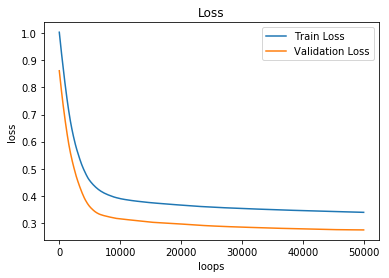

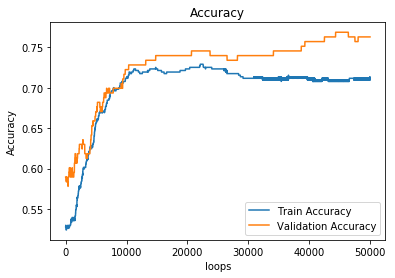

Draw Completed
Maching Learning Lab-1: Linear Classfication Completed Successfully. Time Used:1761.80s


In [10]:
    Draw(loops,train_loss,val_loss,trian_accuracy,val_accuracy)
    print('Maching Learning Lab-1: Linear Classfication Completed Successfully. Time Used:{:.2f}s'.format(time.time()-tic))